In [241]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../python/")
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import math
import matplotlib as mpl

In [242]:
with open(r'../../results/outcomes/Cost/Analyze result/ npv_cost.csv') as cost:
    df_cost=pd.read_csv(cost)
df_cost

,Strategy,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,total_cost_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br,total_cost_br
0,S1,1547044.37,0.000000e+00,1516317.328,3.063362e+06,8.383210e+05,0.000000e+00,1516317.328,2.354184e+06
1,S2,1547044.37,0.000000e+00,1516317.328,3.063362e+06,1.299831e+07,8.567154e+05,2294161.761,1.537089e+07
2,S3,1547044.37,0.000000e+00,1516317.328,3.063362e+06,3.022004e+07,2.539788e+06,3847471.406,3.427569e+07
3,S4,13417867.17,8.567154e+05,2294161.761,1.656874e+07,8.383210e+05,0.000000e+00,1516317.328,2.354184e+06
4,S5,30695716.06,2.539788e+06,3847471.406,3.708298e+07,8.383210e+05,0.000000e+00,1516317.328,2.354184e+06
5,S6,13692982.44,8.567154e+05,2294161.761,1.684386e+07,3.994539e+06,8.567154e+05,2294161.761,6.367118e+06
6,S7,13417867.17,8.567154e+05,2294161.761,1.656874e+07,1.299831e+07,8.567154e+05,2294161.761,1.537089e+07
7,S8,13692982.44,8.567154e+05,2294161.761,1.684386e+07,1.976700e+06,8.567154e+05,1515863.357,4.349279e+06
8,S9,13417867.17,8.567154e+05,2294161.761,1.656874e+07,5.791744e+06,8.567154e+05,1515863.357,8.164323e+06
9,S10,31348271.48,2.539788e+06,3847471.406,3.773553e+07,8.863683e+06,2.539788e+06,3847471.406,1.291933e+07


In [243]:
df_cost = df_cost.set_index('Strategy')

In [244]:
df_cost=df_cost.drop(['total_cost_el', 'total_cost_br'], axis=1)

In [245]:
df_cost

,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br
Strategy,,,,,,
S1,1547044.37,0.000000e+00,1516317.328,8.383210e+05,0.000000e+00,1516317.328
S2,1547044.37,0.000000e+00,1516317.328,1.299831e+07,8.567154e+05,2294161.761
S3,1547044.37,0.000000e+00,1516317.328,3.022004e+07,2.539788e+06,3847471.406
S4,13417867.17,8.567154e+05,2294161.761,8.383210e+05,0.000000e+00,1516317.328
S5,30695716.06,2.539788e+06,3847471.406,8.383210e+05,0.000000e+00,1516317.328
S6,13692982.44,8.567154e+05,2294161.761,3.994539e+06,8.567154e+05,2294161.761
S7,13417867.17,8.567154e+05,2294161.761,1.299831e+07,8.567154e+05,2294161.761
S8,13692982.44,8.567154e+05,2294161.761,1.976700e+06,8.567154e+05,1515863.357
S9,13417867.17,8.567154e+05,2294161.761,5.791744e+06,8.567154e+05,1515863.357


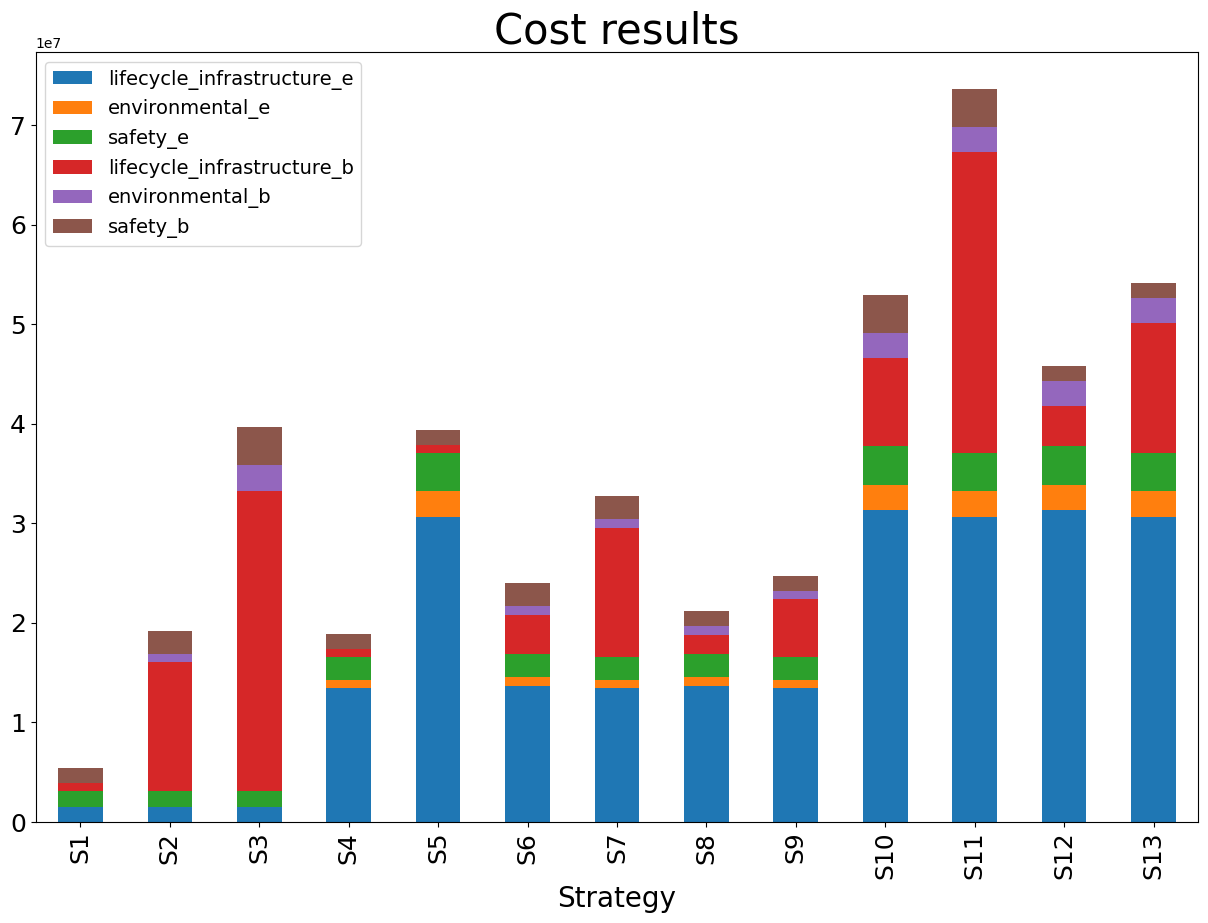

In [246]:
# plotting cost results
df_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost.png')

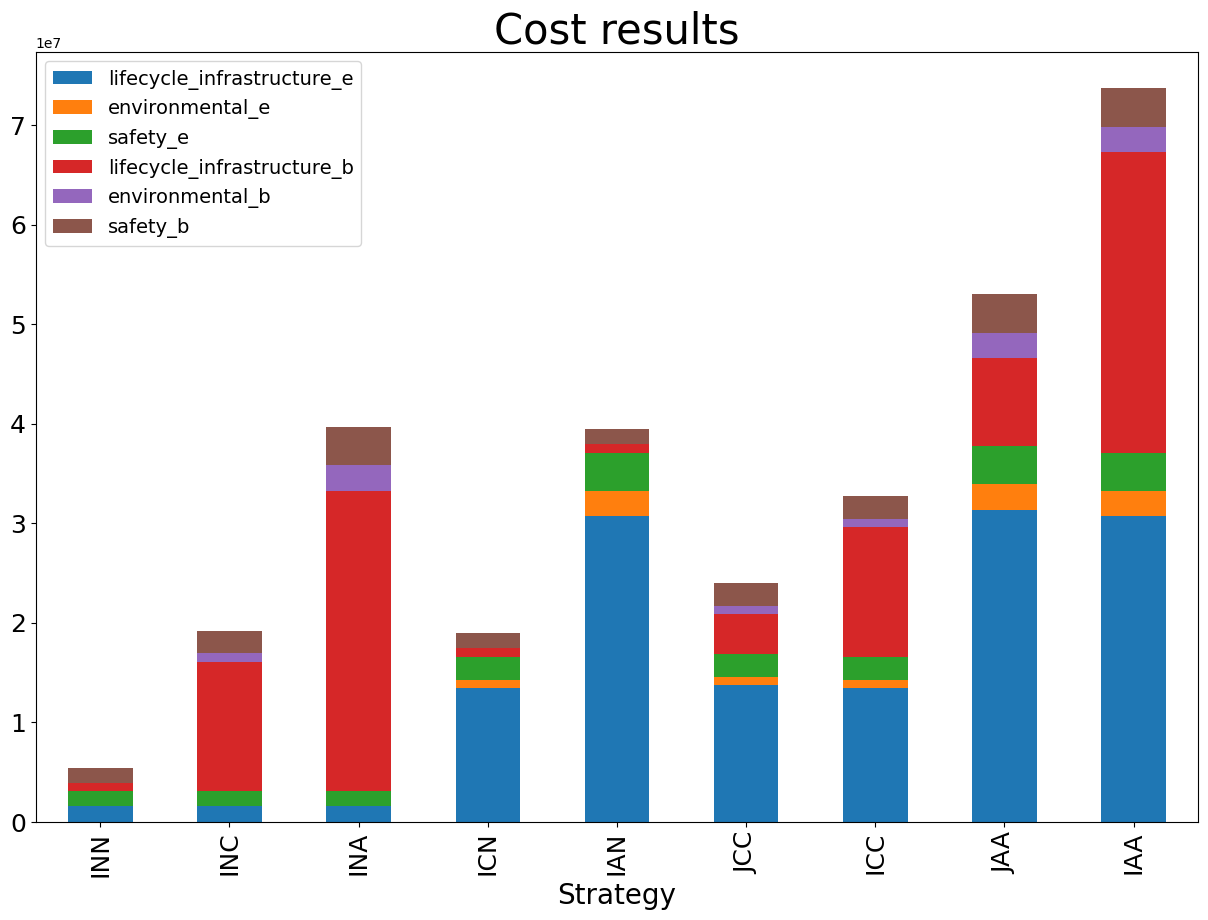

In [247]:
# Filter out the unwanted rows and rename the strategies according to the given mapping
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

df_cost_filtered =df_cost.drop(['S8', 'S9', 'S12', 'S13'])
df_cost_filtered = df_cost_filtered.rename(index=rename_map)

# plotting cost results
df_cost_filtered.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-modified.png')

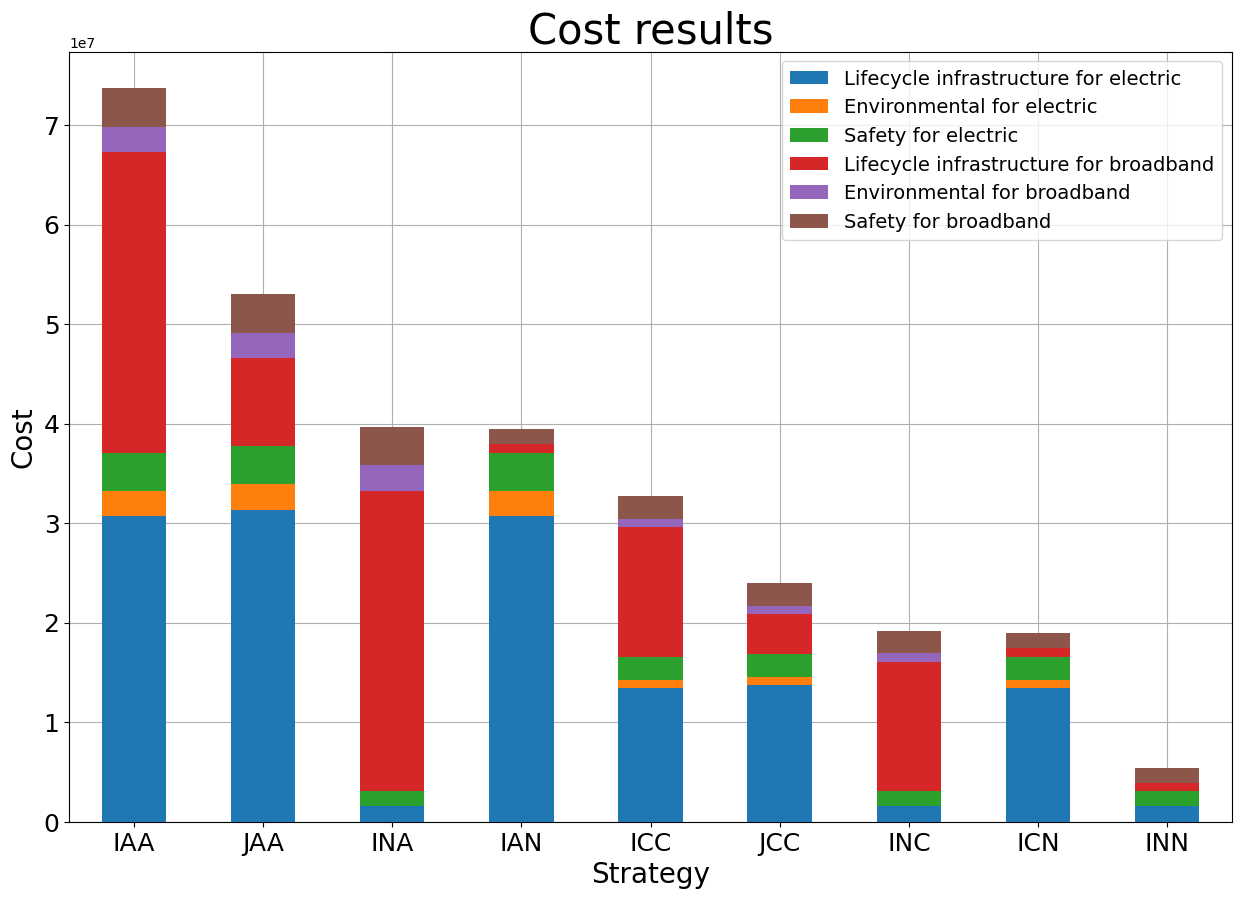

In [248]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cost is already defined and loaded with data
# Rename the strategies
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

# Filter and rename the strategies
df_cost_filtered = df_cost.drop(['S8', 'S9', 'S12', 'S13'], errors='ignore')
df_cost_filtered = df_cost_filtered.rename(index=rename_map)

# Sort dataframe by the sum of the rows from highest to lowest
df_cost_sorted = df_cost_filtered.sum(axis=1).sort_values(ascending=False).index
df_cost_filtered = df_cost_filtered.loc[df_cost_sorted]

# Plotting cost results
ax = df_cost_filtered.plot.bar(stacked=True, figsize=(15, 10), zorder=3)  # Set zorder to 3
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy', fontsize=20)
plt.ylabel('Cost', fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)

plt.grid(zorder=0)  # Ensure grid is behind the bars

# Update the legend
legend_labels = {
    'lifecycle_infrastructure_el': 'Lifecycle infrastructure for electric',
    'environmental_restoration_el': 'Environmental for electric',
    'safety_el': 'Safety for electric',
    'lifecycle_infrastructure_br': 'Lifecycle infrastructure for broadband',
    'environmental_restoration_br': 'Environmental for broadband',
    'safety_br': 'Safety for broadband'
}
plt.legend([legend_labels.get(label, label) for label in df_cost_filtered.columns], fontsize=14)

plt.savefig(r'../../figures/npv-cost-modified.png')
plt.show()


In [249]:
df_cost
#df_cost_filtered

,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br
Strategy,,,,,,
S1,1547044.37,0.000000e+00,1516317.328,8.383210e+05,0.000000e+00,1516317.328
S2,1547044.37,0.000000e+00,1516317.328,1.299831e+07,8.567154e+05,2294161.761
S3,1547044.37,0.000000e+00,1516317.328,3.022004e+07,2.539788e+06,3847471.406
S4,13417867.17,8.567154e+05,2294161.761,8.383210e+05,0.000000e+00,1516317.328
S5,30695716.06,2.539788e+06,3847471.406,8.383210e+05,0.000000e+00,1516317.328
S6,13692982.44,8.567154e+05,2294161.761,3.994539e+06,8.567154e+05,2294161.761
S7,13417867.17,8.567154e+05,2294161.761,1.299831e+07,8.567154e+05,2294161.761
S8,13692982.44,8.567154e+05,2294161.761,1.976700e+06,8.567154e+05,1515863.357
S9,13417867.17,8.567154e+05,2294161.761,5.791744e+06,8.567154e+05,1515863.357


In [427]:
with open(r'../../results/outcomes/Benefit/Analyze result/ npv_benefit.csv') as loss_benefit:
    df_loss_benefit=pd.read_csv(loss_benefit)
df_loss_benefit

,Strategy,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
0,S1,0.0000,57209669.25,0.0000,1.855779e+07
1,S2,0.0000,57209669.25,254367.1932,1.262901e+07
2,S3,0.0000,57209669.25,718271.8723,6.837224e+06
3,S4,254367.1932,38932527.24,0.0000,1.855779e+07
4,S5,718271.8723,21077689.24,0.0000,1.855779e+07
5,S6,254367.1932,38932527.24,254367.1932,1.262901e+07
6,S10,718271.8723,21077689.24,718271.8723,6.837224e+06


In [428]:
df_loss_benefit = df_loss_benefit.set_index('Strategy')

In [429]:
df_loss_benefit

,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
Strategy,,,,
S1,0.0000,57209669.25,0.0000,1.855779e+07
S2,0.0000,57209669.25,254367.1932,1.262901e+07
S3,0.0000,57209669.25,718271.8723,6.837224e+06
S4,254367.1932,38932527.24,0.0000,1.855779e+07
S5,718271.8723,21077689.24,0.0000,1.855779e+07
S6,254367.1932,38932527.24,254367.1932,1.262901e+07
S10,718271.8723,21077689.24,718271.8723,6.837224e+06


In [430]:
df_loss=df_loss_benefit.drop(['aesthetic_benefit_el', 'aesthetic_benefit_br'], axis=1)

In [431]:
df_loss

,economic_losses_el,economic_loss_br
Strategy,,
S1,57209669.25,1.855779e+07
S2,57209669.25,1.262901e+07
S3,57209669.25,6.837224e+06
S4,38932527.24,1.855779e+07
S5,21077689.24,1.855779e+07
S6,38932527.24,1.262901e+07
S10,21077689.24,6.837224e+06


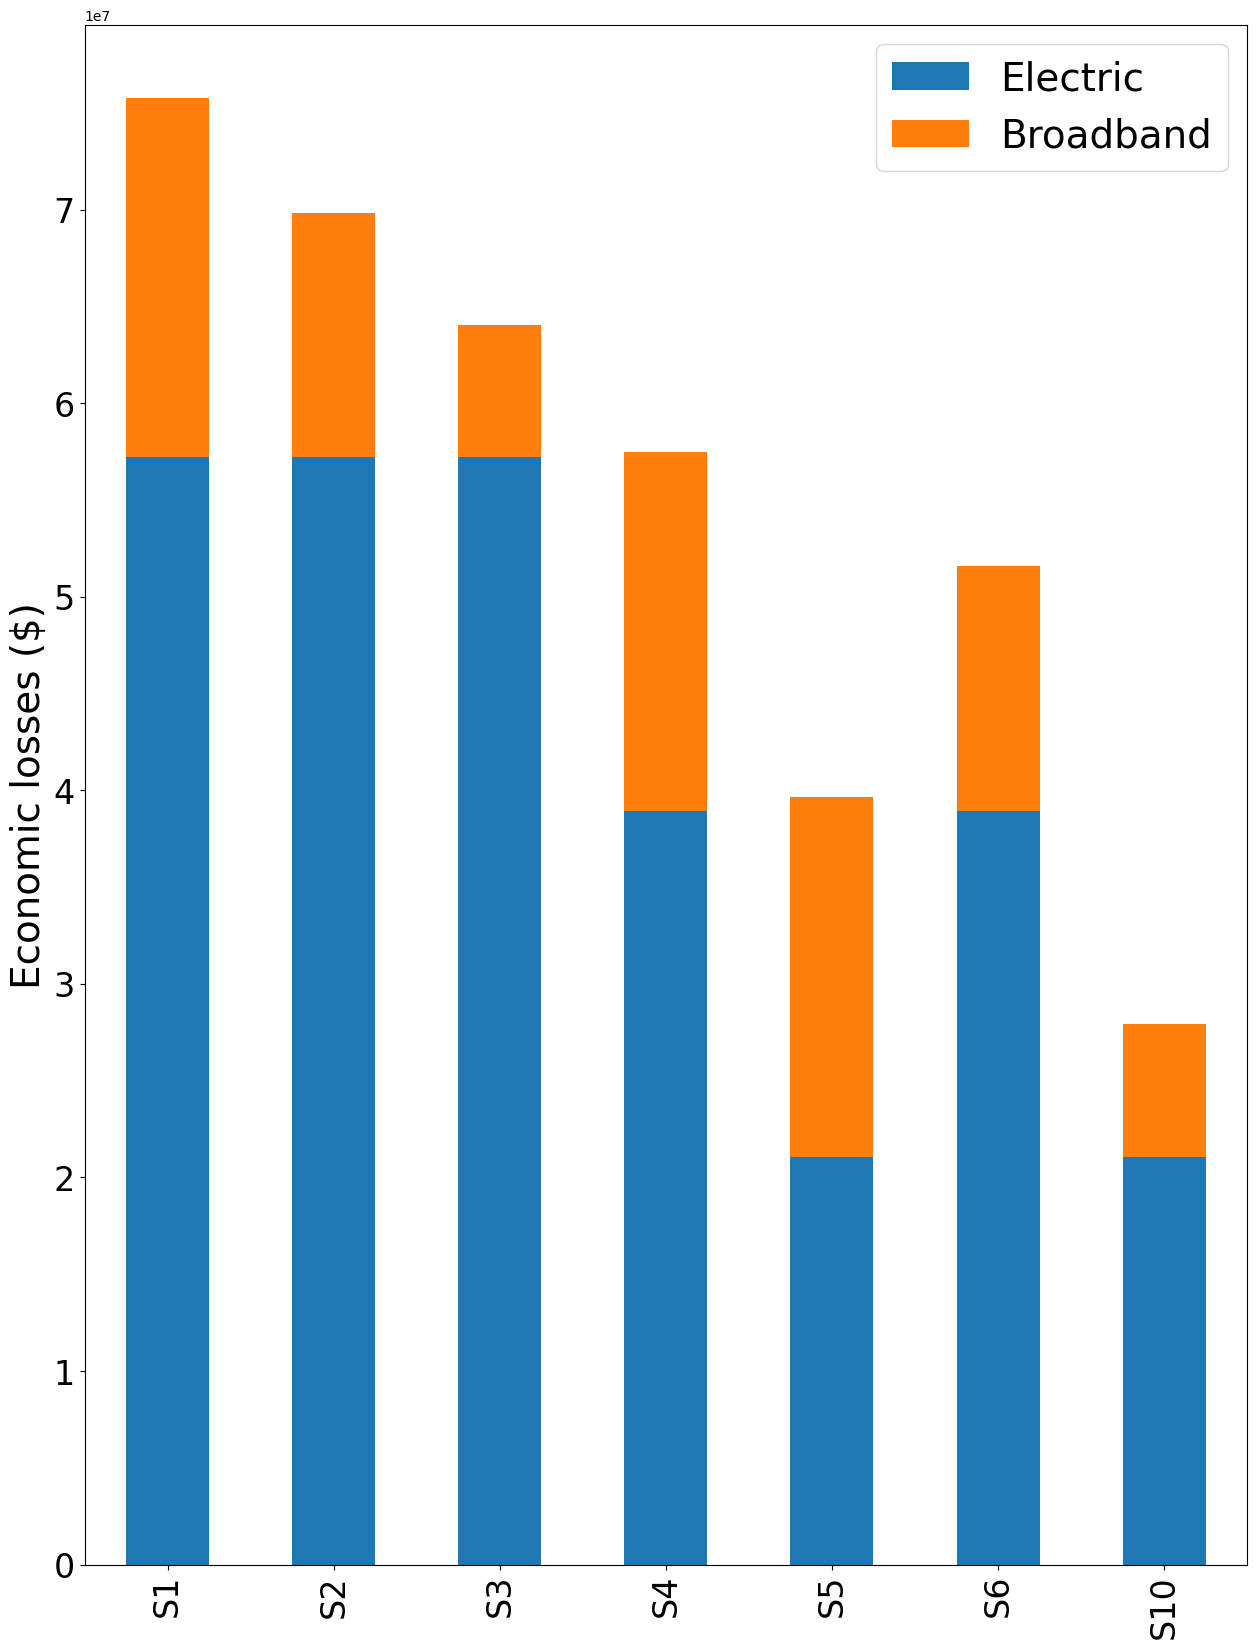

In [432]:
# plotting loss results
df_loss.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 20)
#plt.ylim([400000000, 1300000000])
plt.grid()
#plt.title("loss results", fontsize=30)
plt.xlabel('',fontsize=28)
plt.ylabel('Economic losses ($)',fontsize=28)
plt.legend(['Electric','Broadband'], fontsize=28)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig(r'../../figures/npv-loss-E-vs-B.png', dpi=300)

In [433]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_loss is already defined and loaded with data

# Rename the strategies
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

# Filter and rename the strategies
df_loss_filtered = df_loss.drop(['S8', 'S9', 'S12', 'S13'], errors='ignore')
df_loss_filtered = df_loss_filtered.rename(index=rename_map)

# Add a new row 'IAA' with the same data as 'JAA'
df_loss_filtered.loc['IAA'] = df_loss_filtered.loc['JAA']
df_loss_filtered.loc['ICC'] = df_loss_filtered.loc['JCC']

# Calculate avoided economic losses based on 'INN' strategy
inn_el = df_loss_filtered.loc['INN', 'economic_losses_el']
inn_br = df_loss_filtered.loc['INN', 'economic_loss_br']

df_loss_filtered['avoided_economic_losses_el'] = inn_el-df_loss_filtered['economic_losses_el'] 
df_loss_filtered['avoided_economic_loss_br'] = inn_br - df_loss_filtered['economic_loss_br']

df_loss_filtered

,economic_losses_el,economic_loss_br,avoided_economic_losses_el,avoided_economic_loss_br
Strategy,,,,
INN,57209669.25,1.855779e+07,0.00,0.000000e+00
INC,57209669.25,1.262901e+07,0.00,5.928777e+06
INA,57209669.25,6.837224e+06,0.00,1.172057e+07
ICN,38932527.24,1.855779e+07,18277142.01,0.000000e+00
IAN,21077689.24,1.855779e+07,36131980.01,0.000000e+00
JCC,38932527.24,1.262901e+07,18277142.01,5.928777e+06
JAA,21077689.24,6.837224e+06,36131980.01,1.172057e+07
IAA,21077689.24,6.837224e+06,36131980.01,1.172057e+07
ICC,38932527.24,1.262901e+07,18277142.01,5.928777e+06


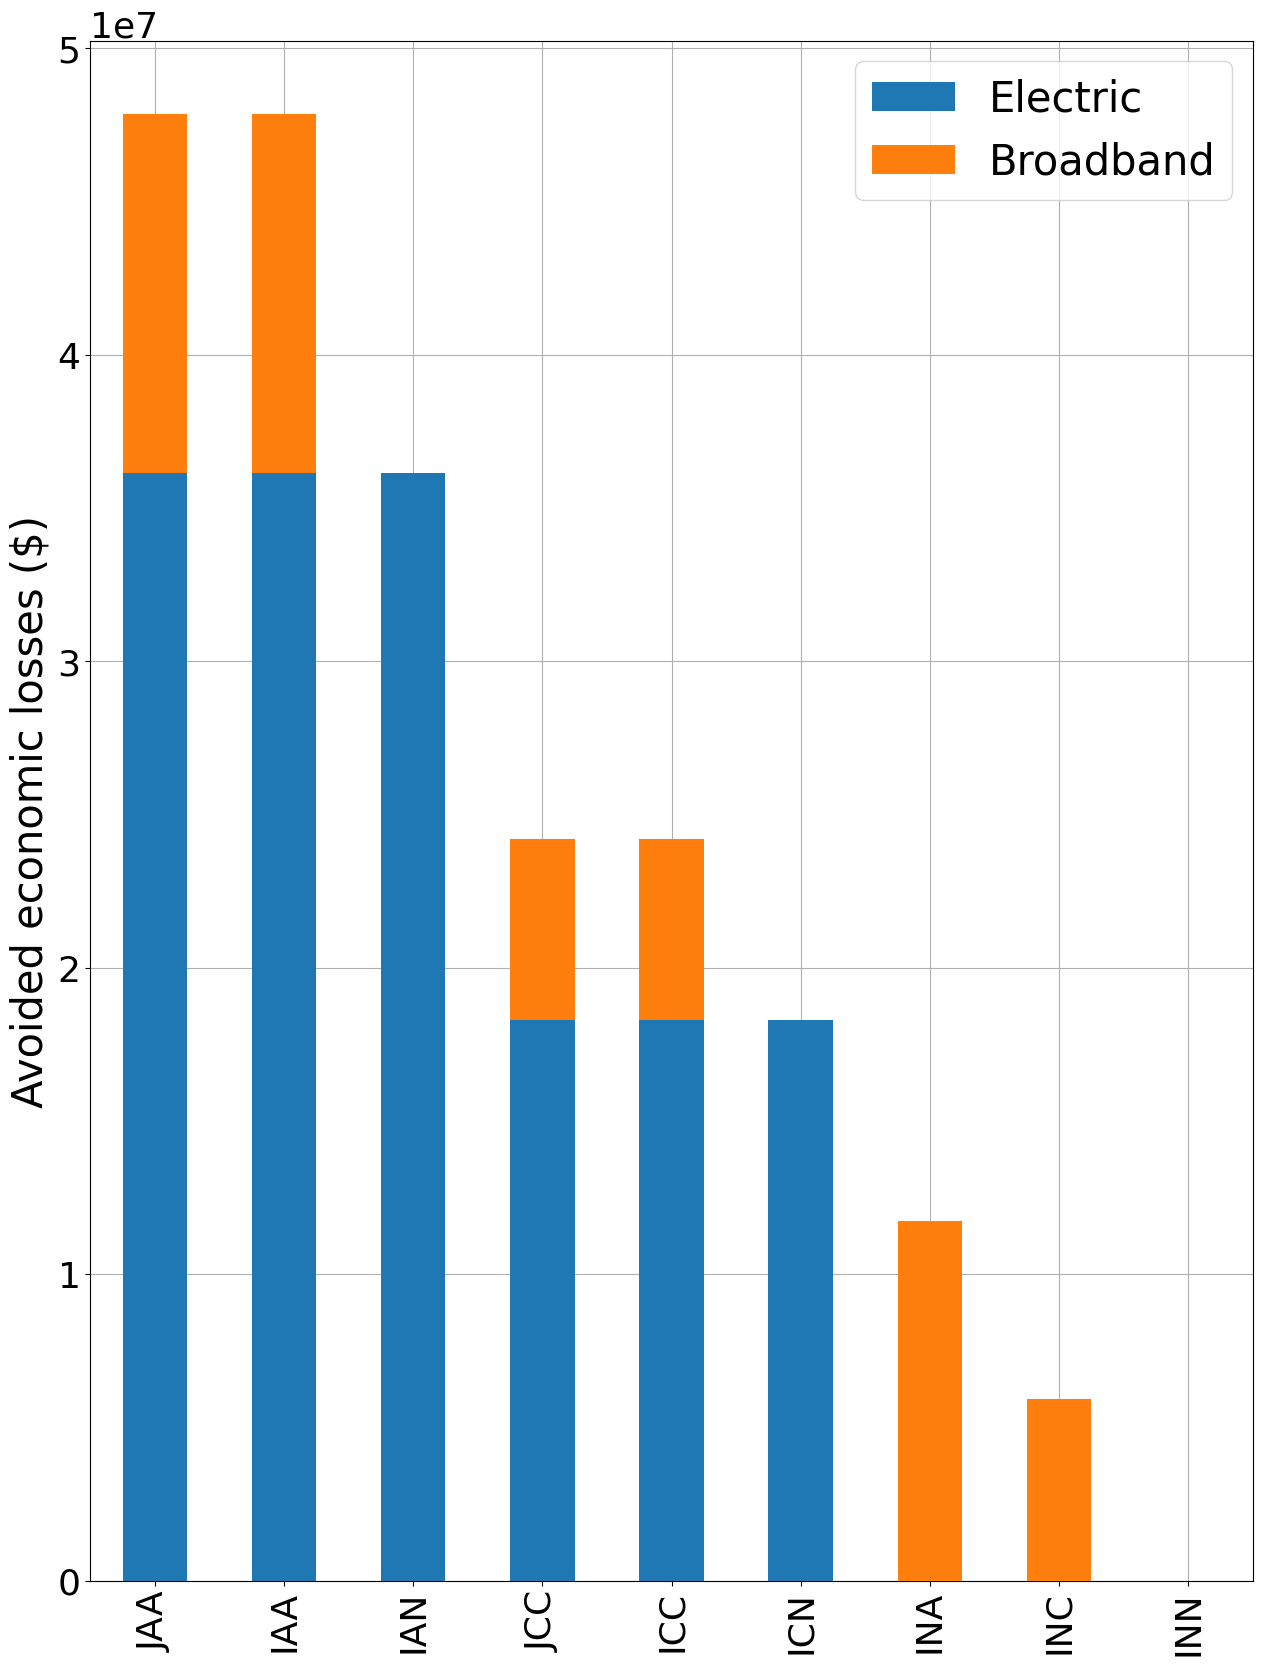

In [434]:
import matplotlib.pyplot as plt

# Plotting first loss results
fig1, ax1 = plt.subplots()
df_loss.plot.bar(stacked=True, ax=ax1)
fig1.set_size_inches(15, 20)
ax1.set_xlabel('', fontsize=28)
ax1.set_ylabel('Economic losses ($)', fontsize=28)
ax1.legend(['Electric', 'Broadband'], fontsize=28)
ax1.grid(True)
ax1.tick_params(axis='x', labelsize=24)
ax1.tick_params(axis='y', labelsize=24)
plt.savefig(r'../../figures/npv-loss-E-vs-B.png', dpi=300)
plt.close(fig1)  # Close the figure to free memory

# Preparing data for the second plot
df_loss_filtered = df_loss_filtered.drop(['economic_losses_el', 'economic_loss_br'], axis=1)
df_loss_sorted = df_loss_filtered.sum(axis=1).sort_values(ascending=False).index
df_loss_filtered = df_loss_filtered.loc[df_loss_sorted]

# Plotting second loss results
fig2, ax2 = plt.subplots()
df_loss_filtered.plot.bar(stacked=True, ax=ax2, zorder=3)
fig2.set_size_inches(15, 20)
ax2.set_xlabel('', fontsize=30)
ax2.set_ylabel('Avoided economic losses ($)', fontsize=30)
ax2.tick_params(axis='x', labelsize=26)
ax2.tick_params(axis='y', labelsize=26)
ax2.grid(True, zorder=0)

legend_labels = {
    'avoided_economic_losses_el': 'Electric',
    'avoided_economic_loss_br': 'Broadband'
}
ax2.legend([legend_labels.get(label, label) for label in df_loss_filtered.columns], fontsize=30)
ax2.yaxis.offsetText.set_fontsize(26)

plt.savefig(r'../../figures/npv-loss-E-vs-B-modified.png', dpi=300)
plt.show()


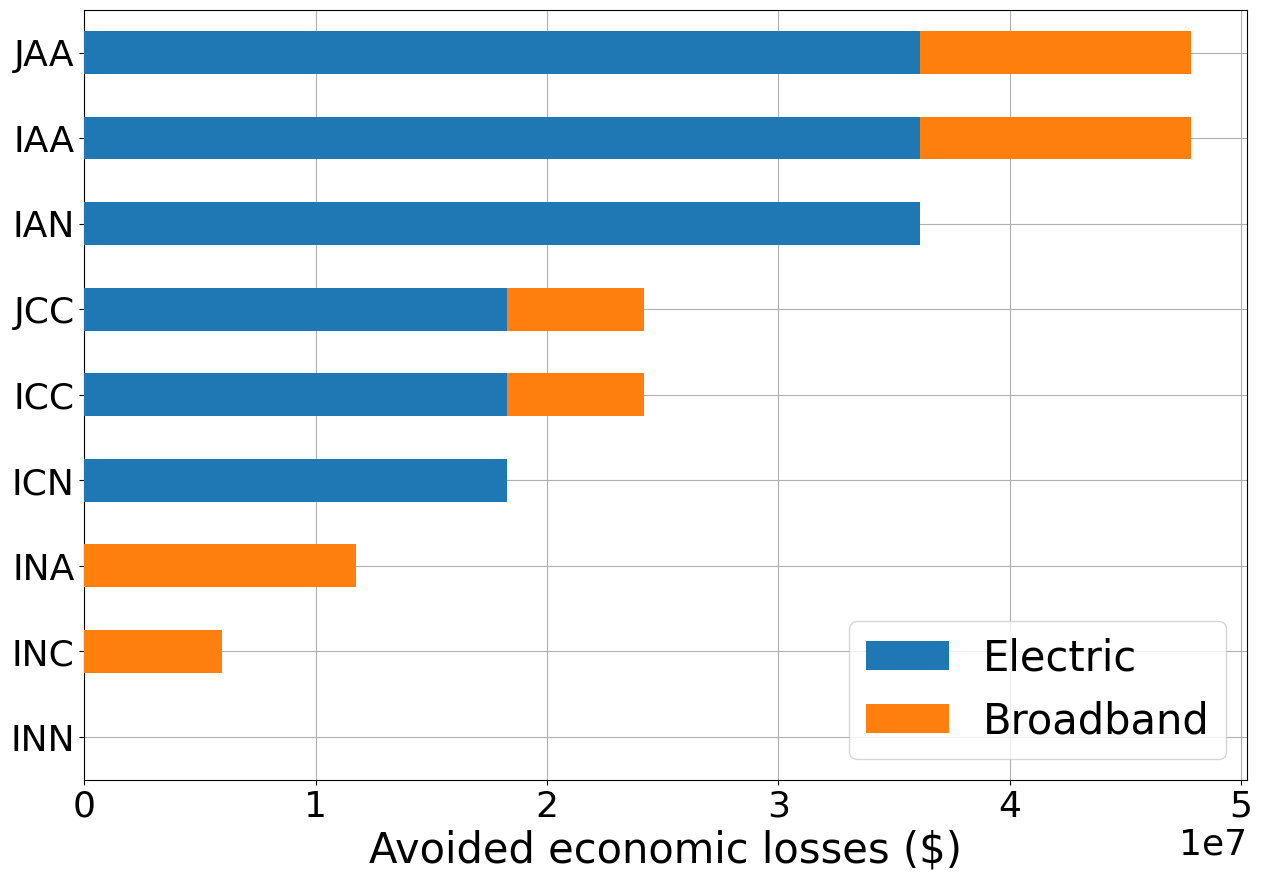

In [435]:
# Reverse the order of the DataFrame after sorting and before plotting
df_loss_filtered = df_loss_filtered.iloc[::-1]

# Plotting second loss results with horizontal bars and reversed order
fig2, ax2 = plt.subplots()
df_loss_filtered.plot.barh(stacked=True, ax=ax2, zorder=3)  # Use barh for horizontal bars
fig2.set_size_inches(15, 10)  # Adjust dimensions for horizontal layout
ax2.set_ylabel('', fontsize=30)  # Y-axis now has categories, no label needed
ax2.set_xlabel('Avoided economic losses ($)', fontsize=30)  # X-axis for values
ax2.tick_params(axis='y', labelsize=26)  # Adjust y-tick labels for categories
ax2.tick_params(axis='x', labelsize=26)  # Adjust x-tick labels for values
ax2.grid(True, zorder=0)

legend_labels = {
    'avoided_economic_losses_el': 'Electric',
    'avoided_economic_loss_br': 'Broadband'
}
ax2.legend([legend_labels.get(label, label) for label in df_loss_filtered.columns], fontsize=30)
ax2.xaxis.offsetText.set_fontsize(26)  # Adjust font size for x-axis offset text

plt.savefig(r'../../figures/npv-loss-E-vs-B-modified.png', dpi=300, bbox_inches='tight')
plt.show()


In [436]:
df_benefit=df_loss_benefit.drop(['economic_losses_el', 'economic_loss_br'], axis=1)
df_benefit

,aesthetic_benefit_el,aesthetic_benefit_br
Strategy,,
S1,0.0000,0.0000
S2,0.0000,254367.1932
S3,0.0000,718271.8723
S4,254367.1932,0.0000
S5,718271.8723,0.0000
S6,254367.1932,254367.1932
S10,718271.8723,718271.8723


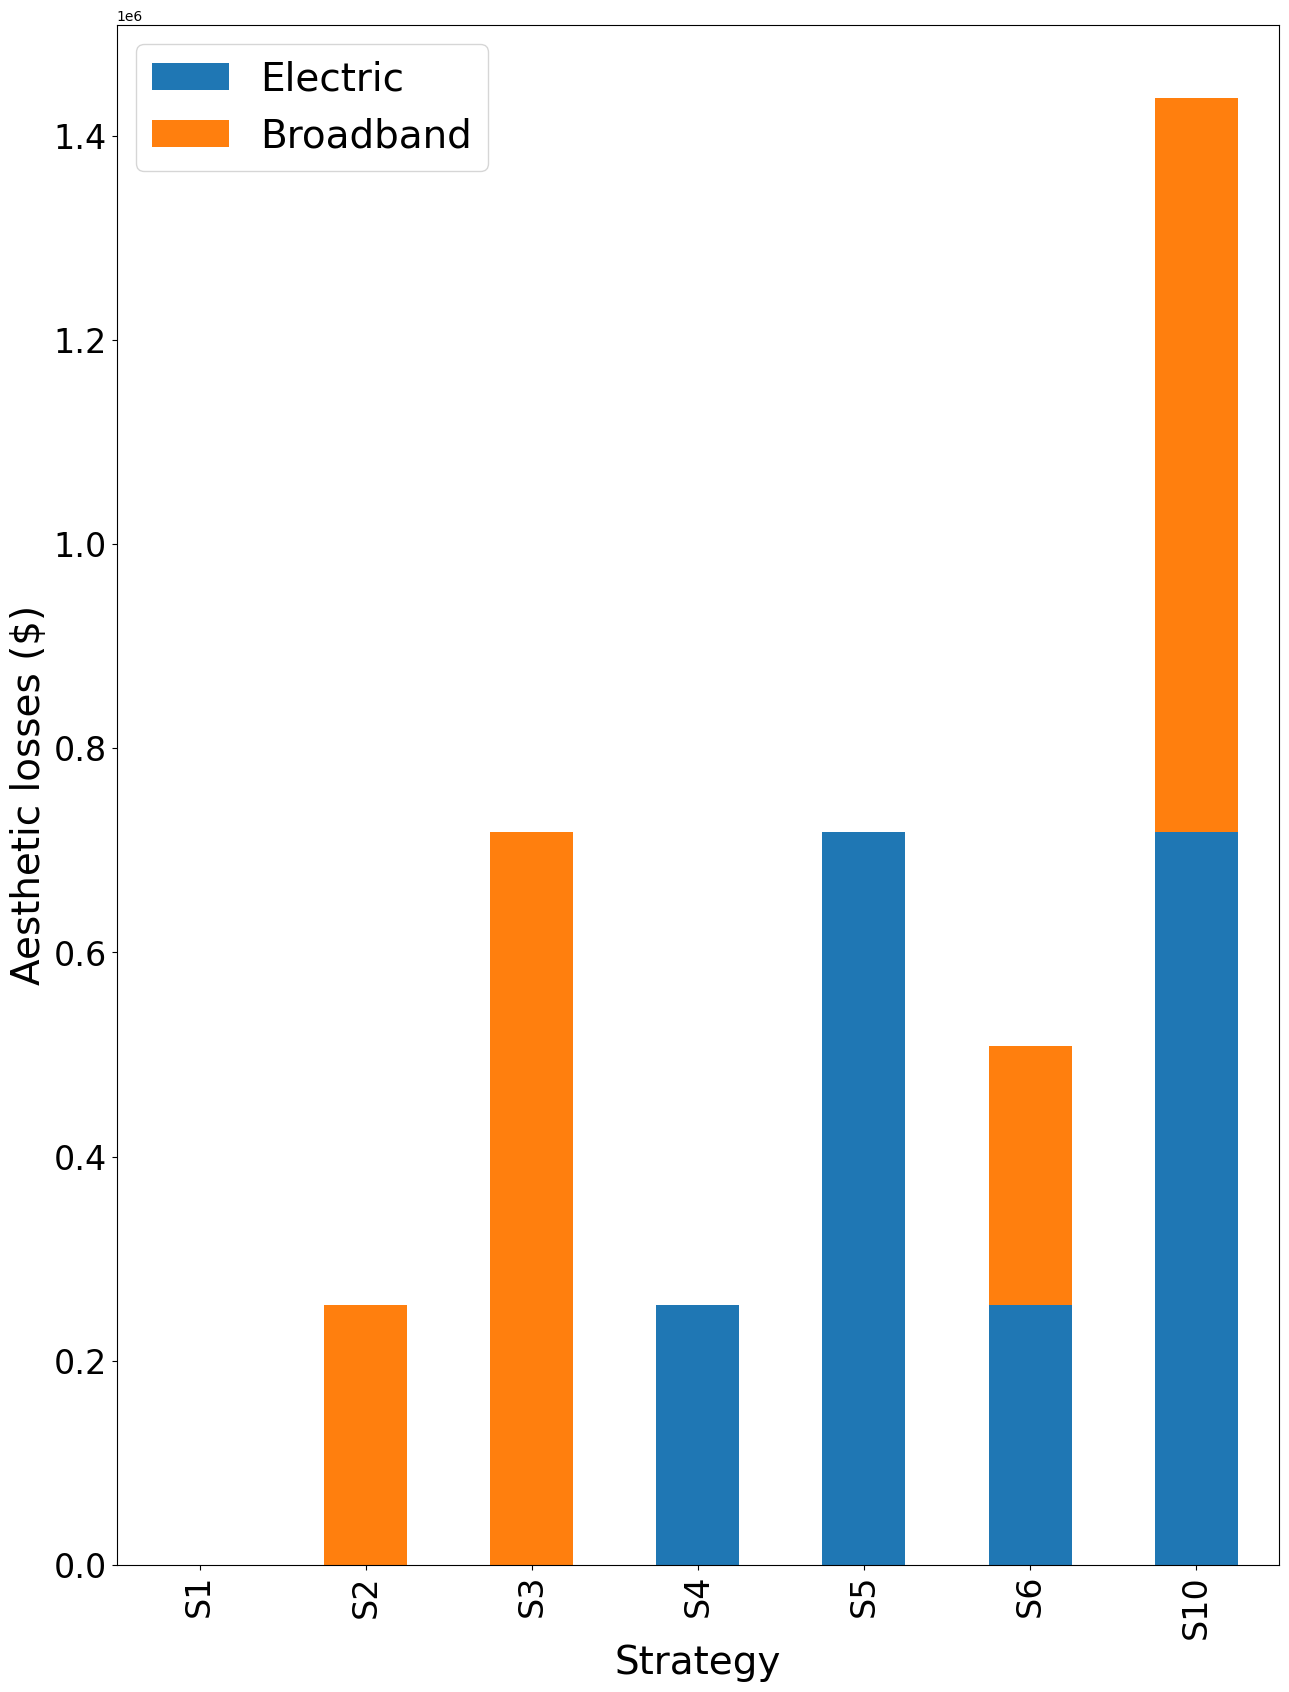

In [437]:
# plotting benefit results
#color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
df_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 20)
#plt.ylim([0, 50000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=28)
plt.ylabel('Aesthetic losses ($)',fontsize=28)
plt.legend(['Electric','Broadband'], fontsize=28)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig(r'../../figures/npv-benefit-E-vs-B.png', dpi=300)
color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']


In [438]:
# Rename the strategies
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

# Filter and rename the strategies
df_benefit_filtered = df_benefit.drop(['S8', 'S9', 'S12', 'S13'], errors='ignore')
df_benefit_filtered = df_benefit_filtered.rename(index=rename_map)

# Add a new row 'IAA' with the same data as 'JAA'
df_benefit_filtered.loc['IAA'] = df_benefit_filtered.loc['JAA']
df_benefit_filtered.loc['ICC'] = df_benefit_filtered.loc['JCC']

# Calculate avoided benefits based on 'INN' strategy
inn_el = df_benefit_filtered.loc['INN', 'aesthetic_benefit_el']
inn_br = df_benefit_filtered.loc['INN', 'aesthetic_benefit_br']

df_benefit_filtered

,aesthetic_benefit_el,aesthetic_benefit_br
Strategy,,
INN,0.0000,0.0000
INC,0.0000,254367.1932
INA,0.0000,718271.8723
ICN,254367.1932,0.0000
IAN,718271.8723,0.0000
JCC,254367.1932,254367.1932
JAA,718271.8723,718271.8723
IAA,718271.8723,718271.8723
ICC,254367.1932,254367.1932


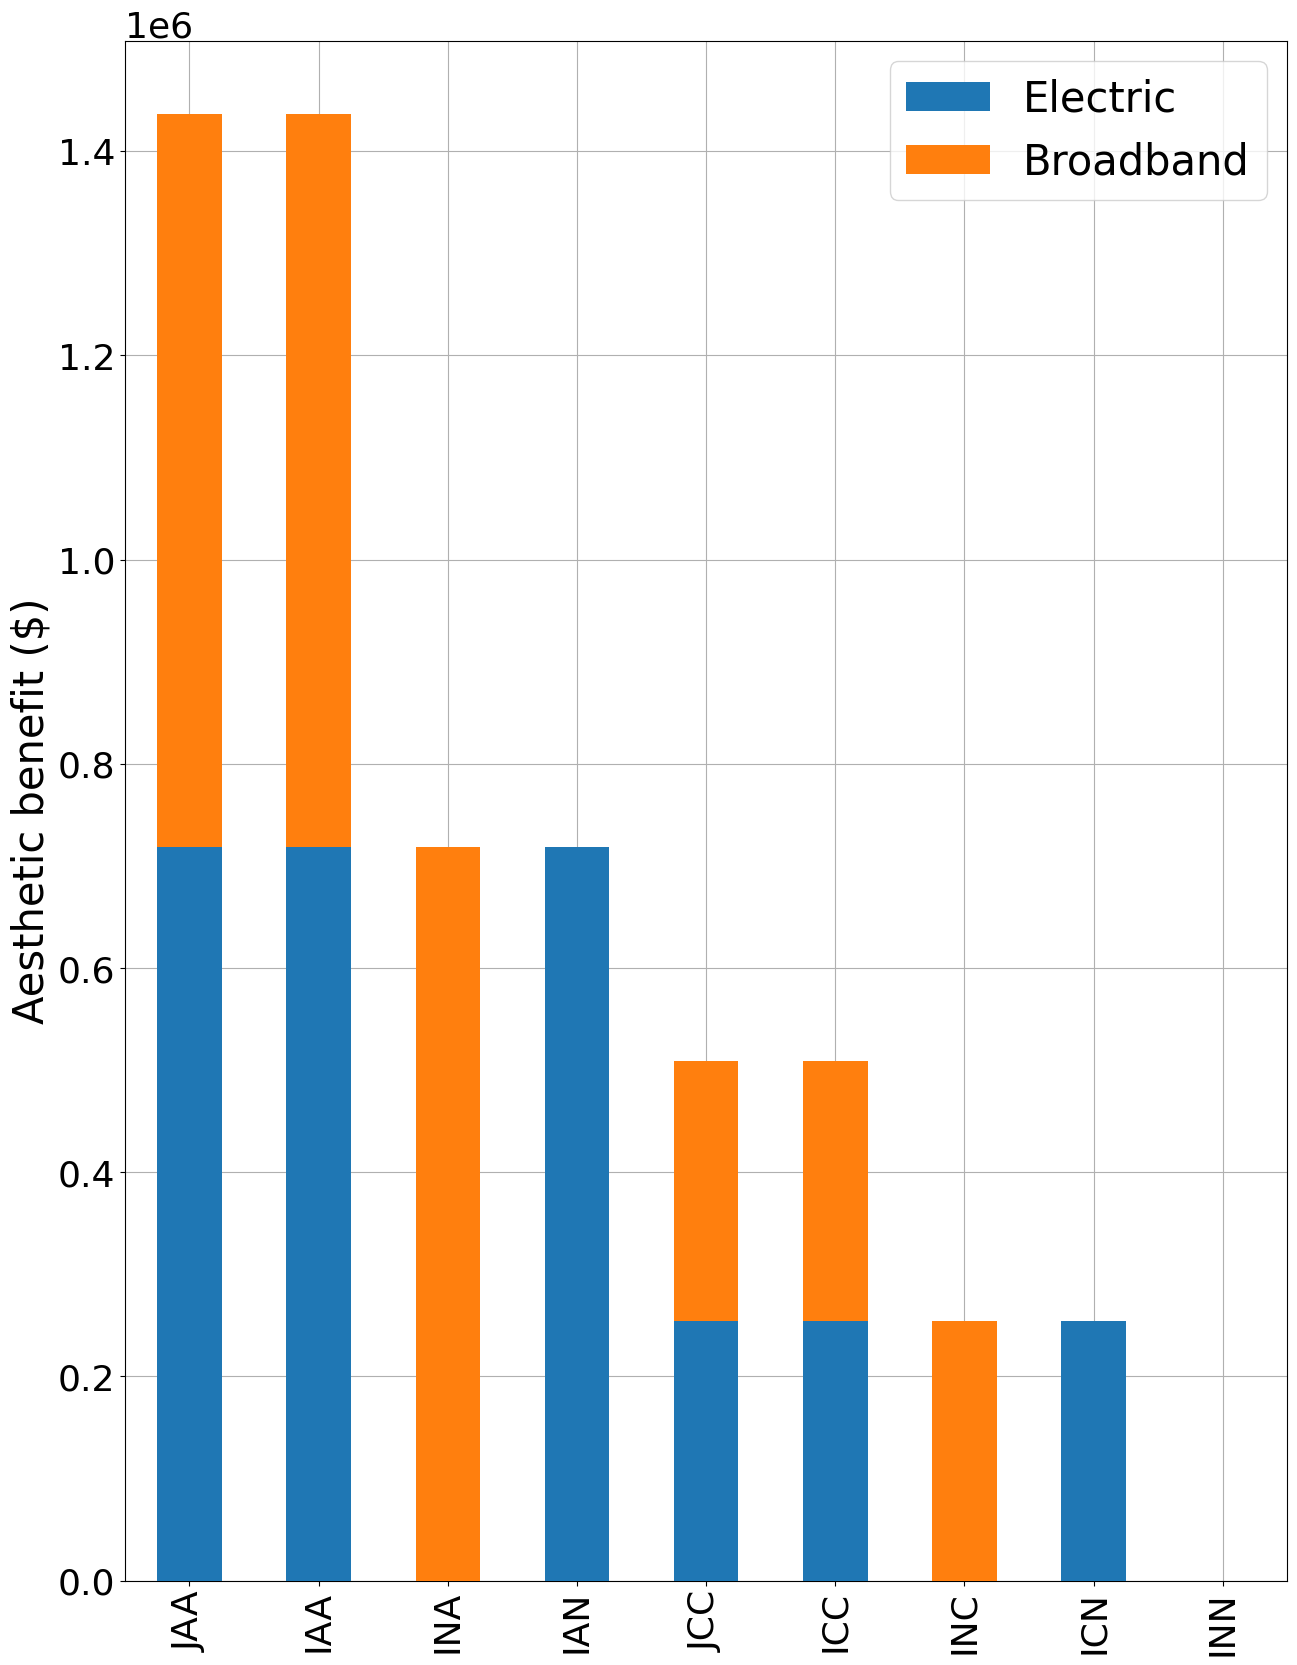

In [439]:
import matplotlib.pyplot as plt

# Sum columns to get the total benefits and add as a new column 'Total'
df_benefit_filtered['Total'] = df_benefit_filtered.sum(axis=1)

# Sort DataFrame by 'Total' in descending order
df_benefit_sorted = df_benefit_filtered.sort_values(by='Total', ascending=False)

# Drop the 'Total' column after sorting, if it's not needed for plotting
df_benefit_sorted.drop('Total', axis=1, inplace=True)

# Plotting the sorted data
ax = df_benefit_sorted.plot.bar(stacked=True, zorder=3)
fig = plt.gcf()
fig.set_size_inches(15, 20)

plt.grid()
plt.xlabel('', fontsize=30)
plt.ylabel('Aesthetic benefit ($)', fontsize=30)
plt.legend(['Electric', 'Broadband'], fontsize=30, loc='upper right')
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
ax.yaxis.offsetText.set_fontsize(26)

plt.savefig(r'../../figures/npv-benefit-E-vs-B.png', dpi=300)

plt.show()


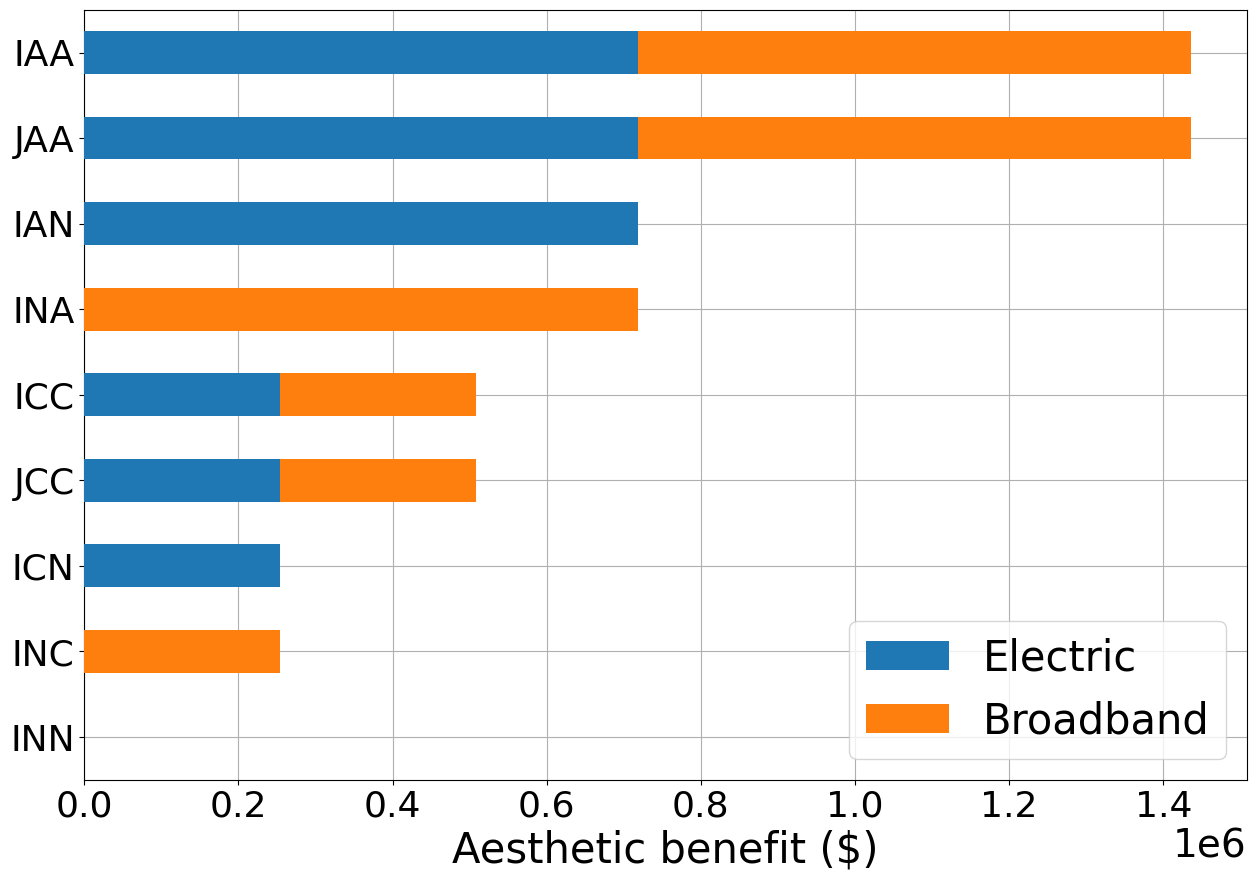

In [440]:
import matplotlib.pyplot as plt

# Sum columns to get the total benefits and add as a new column 'Total'
df_benefit_filtered['Total'] = df_benefit_filtered.sum(axis=1)

# Sort DataFrame by 'Total' in ascending order to reverse the bar order
df_benefit_sorted = df_benefit_filtered.sort_values(by='Total', ascending=True)

# Drop the 'Total' column after sorting, if it's not needed for plotting
df_benefit_sorted.drop('Total', axis=1, inplace=True)

# Plotting the sorted data with horizontal bars
ax = df_benefit_sorted.plot.barh(stacked=True, zorder=3)  # Use barh here for horizontal bars
fig = plt.gcf()
fig.set_size_inches(15, 10)  # You might want to adjust this size if the layout looks cramped

plt.grid()
plt.ylabel('', fontsize=30)  # This is now the y-axis label
plt.xlabel('Aesthetic benefit ($)', fontsize=30)  # This is now the x-axis label
plt.legend(['Electric', 'Broadband'], fontsize=30, loc='lower right')
plt.yticks(fontsize=26)  # This now controls the category labels
plt.xticks(fontsize=26)  # This now controls the value labels
ax.xaxis.offsetText.set_fontsize(28)  # Adjust the fontsize of the offset text on the x-axis

plt.savefig(r'../../figures/npv-benefit-E-vs-B.png', dpi=300, bbox_inches='tight')

plt.show()


In [262]:
with open(r'../../results/outcomes/npv_cost_loss_benefit.csv') as npv_cost_loss_benefit:
    df_npv_cost_loss_benefit=pd.read_csv(npv_cost_loss_benefit)
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,avoided_economic_losses,net_benefit
0,INN,2390000.0,0.000000e+00,3030000.0,5420000.0,0.000000e+00,0.0,-5420000.0
1,INC,14500000.0,8.567154e+05,3810000.0,18400000.0,2.543672e+05,5930000.0,-12200000.0
2,INA,31800000.0,2.539788e+06,5360000.0,37300000.0,7.182719e+05,11700000.0,-24900000.0
3,ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,2.543672e+05,18300000.0,-368000.0
4,IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,7.182719e+05,36100000.0,-2550000.0
5,JCC,17700000.0,1.713431e+06,4590000.0,23200000.0,5.087344e+05,24200000.0,1510000.0
6,ICC,26400000.0,1.713431e+06,4590000.0,31900000.0,5.087344e+05,24200000.0,-7190000.0
7,JAA,40200000.0,5.079576e+06,7690000.0,50700000.0,1.436544e+06,47900000.0,-1410000.0
8,IAA,60900000.0,5.079576e+06,7690000.0,71400000.0,1.436544e+06,47900000.0,-22100000.0


In [263]:
#df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [264]:
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,avoided_economic_losses,net_benefit
0,INN,2390000.0,0.000000e+00,3030000.0,5420000.0,0.000000e+00,0.0,-5420000.0
1,INC,14500000.0,8.567154e+05,3810000.0,18400000.0,2.543672e+05,5930000.0,-12200000.0
2,INA,31800000.0,2.539788e+06,5360000.0,37300000.0,7.182719e+05,11700000.0,-24900000.0
3,ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,2.543672e+05,18300000.0,-368000.0
4,IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,7.182719e+05,36100000.0,-2550000.0
5,JCC,17700000.0,1.713431e+06,4590000.0,23200000.0,5.087344e+05,24200000.0,1510000.0
6,ICC,26400000.0,1.713431e+06,4590000.0,31900000.0,5.087344e+05,24200000.0,-7190000.0
7,JAA,40200000.0,5.079576e+06,7690000.0,50700000.0,1.436544e+06,47900000.0,-1410000.0
8,IAA,60900000.0,5.079576e+06,7690000.0,71400000.0,1.436544e+06,47900000.0,-22100000.0


In [265]:
df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [266]:
df_npv_net_benefit=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','avoided_economic_losses'], axis=1)

In [267]:
df_npv_net_benefit_new=df_npv_net_benefit.transpose()

In [268]:
df_npv_net_benefit_new

Strategy,INN,INC,INA,ICN,IAN,JCC,ICC,JAA,IAA
net_benefit,-5420000.0,-12200000.0,-24900000.0,-368000.0,-2550000.0,1510000.0,-7190000.0,-1410000.0,-22100000.0


In [269]:
#ax = df.plot.bar(rot=0, color={'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6', 'IAN': '#6A3D9A', 'ICC': '#A6CEE3', 'IAA': '#1F78B4', 'JCC': '#B2DF8A', 'JAA': '#33A02C'})

In [270]:
df_npv_net_benefit_new

Strategy,INN,INC,INA,ICN,IAN,JCC,ICC,JAA,IAA
net_benefit,-5420000.0,-12200000.0,-24900000.0,-368000.0,-2550000.0,1510000.0,-7190000.0,-1410000.0,-22100000.0


In [271]:
df_npv_net_benefit=df_npv_net_benefit.reset_index()

In [272]:
df_npv_net_benefit

,Strategy,net_benefit
0,INN,-5420000.0
1,INC,-12200000.0
2,INA,-24900000.0
3,ICN,-368000.0
4,IAN,-2550000.0
5,JCC,1510000.0
6,ICC,-7190000.0
7,JAA,-1410000.0
8,IAA,-22100000.0


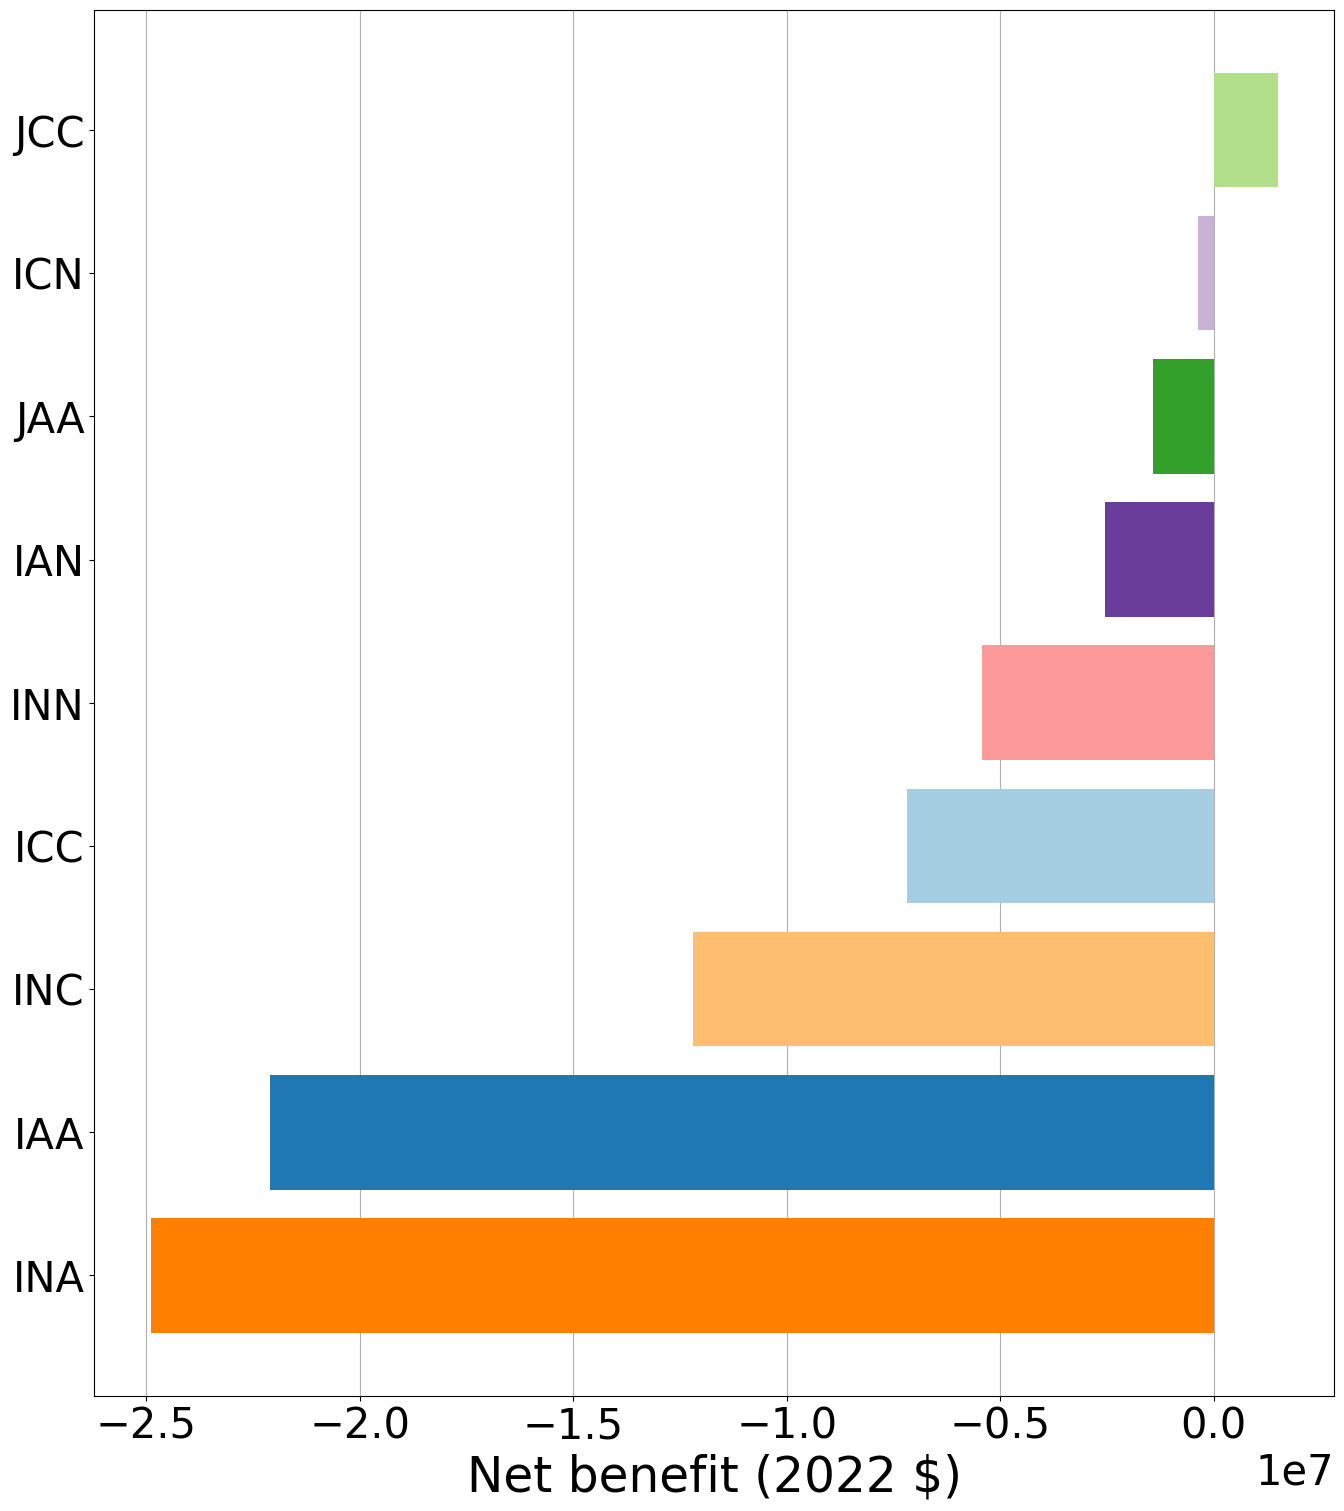

In [273]:
# Create a dictionary to map labels to colors
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_net_benefit['Strategy'] = ['INN', 'INC', 'INA', 'ICN', 'IAN', 'JCC', 'ICC', 'JAA', 'IAA']
df_npv_net_benefit.set_index('Strategy', inplace=True)

# Sort the DataFrame in descending order by 'net_benefit'
df_npv_net_benefit_sorted = df_npv_net_benefit.sort_values('net_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_net_benefit_sorted.iterrows()):
    plt.barh(i, row['net_benefit'], color=strategy_colors[index], zorder=3)

plt.xlabel('Net benefit (2022 $)', fontsize=35)
#plt.ylabel('Strategies', fontsize=45)  # Add a label for clarity
plt.yticks(range(len(df_npv_net_benefit_sorted)), labels=df_npv_net_benefit_sorted.index, fontsize=30)
plt.xticks(fontsize=30)

ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=400, bbox_inches='tight')
plt.show()

In [442]:
df_npv_net_benefit

,net_benefit
Strategy,
INN,-5420000.0
INC,-12200000.0
INA,-24900000.0
ICN,-368000.0
IAN,-2550000.0
JCC,1510000.0
ICC,-7190000.0
JAA,-1410000.0
IAA,-22100000.0


In [275]:
# plotting graph (new version)
#ax = df_npv_net_benefit.T.plot(ylabel='Net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=300)
#plt.show()

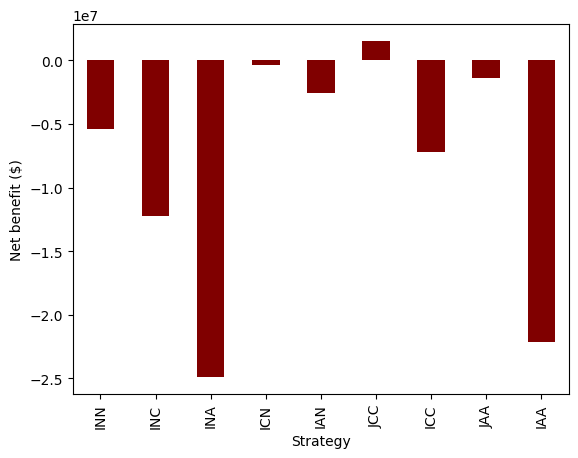

In [276]:
# plotting graph
df_npv_net_benefit.plot(ylabel='Net benefit ($)', kind="bar", color='maroon', legend=False)
plt.savefig(r'../../figures/npv.png', dpi=300, bbox_inches='tight')

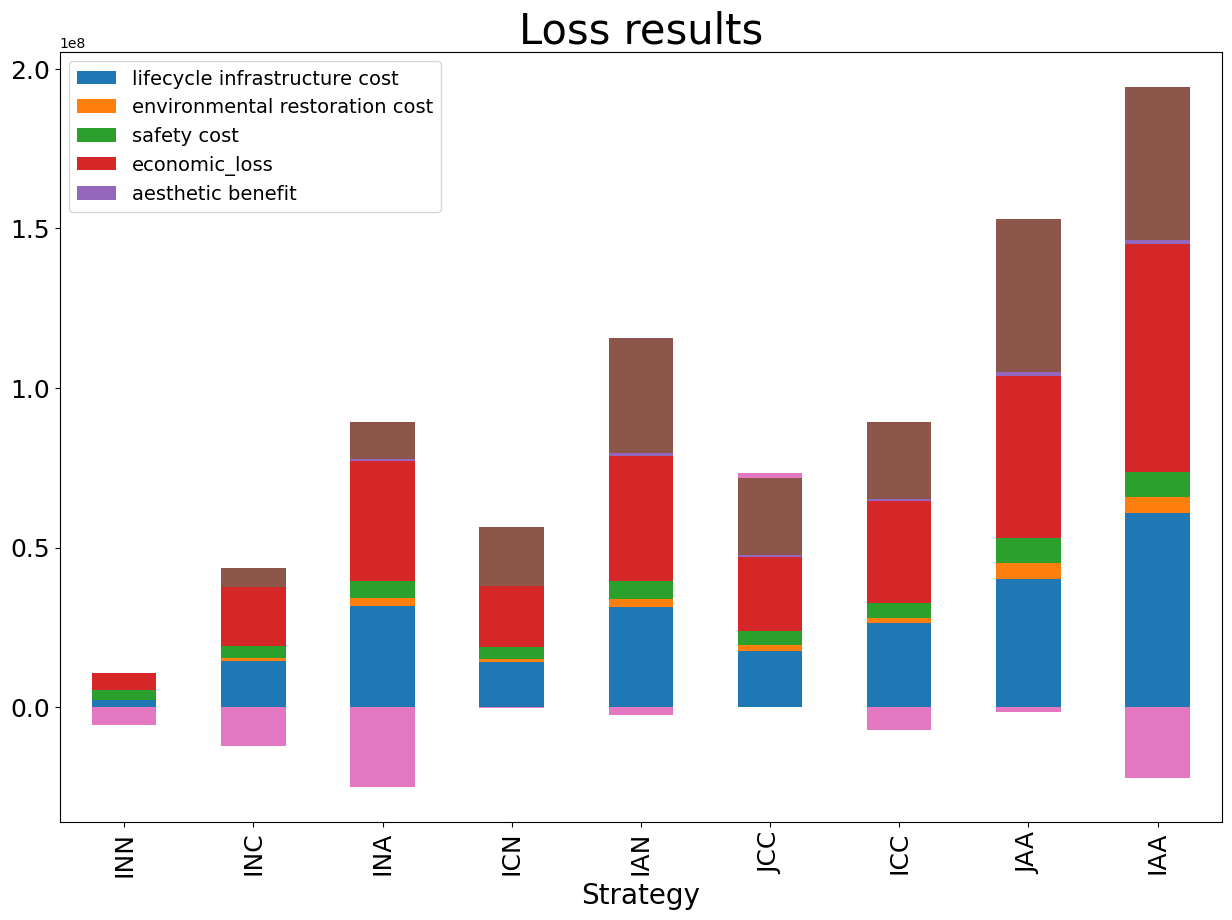

In [277]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated.png', dpi=300)

In [278]:
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,avoided_economic_losses,net_benefit
Strategy,,,,,,,
INN,2390000.0,0.000000e+00,3030000.0,5420000.0,0.000000e+00,0.0,-5420000.0
INC,14500000.0,8.567154e+05,3810000.0,18400000.0,2.543672e+05,5930000.0,-12200000.0
INA,31800000.0,2.539788e+06,5360000.0,37300000.0,7.182719e+05,11700000.0,-24900000.0
ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,2.543672e+05,18300000.0,-368000.0
IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,7.182719e+05,36100000.0,-2550000.0
JCC,17700000.0,1.713431e+06,4590000.0,23200000.0,5.087344e+05,24200000.0,1510000.0
ICC,26400000.0,1.713431e+06,4590000.0,31900000.0,5.087344e+05,24200000.0,-7190000.0
JAA,40200000.0,5.079576e+06,7690000.0,50700000.0,1.436544e+06,47900000.0,-1410000.0
IAA,60900000.0,5.079576e+06,7690000.0,71400000.0,1.436544e+06,47900000.0,-22100000.0


In [279]:
df_npv_cost=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','avoided_economic_losses', 'aesthetic_benefit'], axis=1)

In [280]:
df_npv_cost

,lifecycle_infrastructure,environmental_restoration,safety
Strategy,,,
INN,2390000.0,0.000000e+00,3030000.0
INC,14500000.0,8.567154e+05,3810000.0
INA,31800000.0,2.539788e+06,5360000.0
ICN,14300000.0,8.567154e+05,3810000.0
IAN,31500000.0,2.539788e+06,5360000.0
JCC,17700000.0,1.713431e+06,4590000.0
ICC,26400000.0,1.713431e+06,4590000.0
JAA,40200000.0,5.079576e+06,7690000.0
IAA,60900000.0,5.079576e+06,7690000.0


In [281]:
df_npv_cost=df_npv_cost.reset_index()

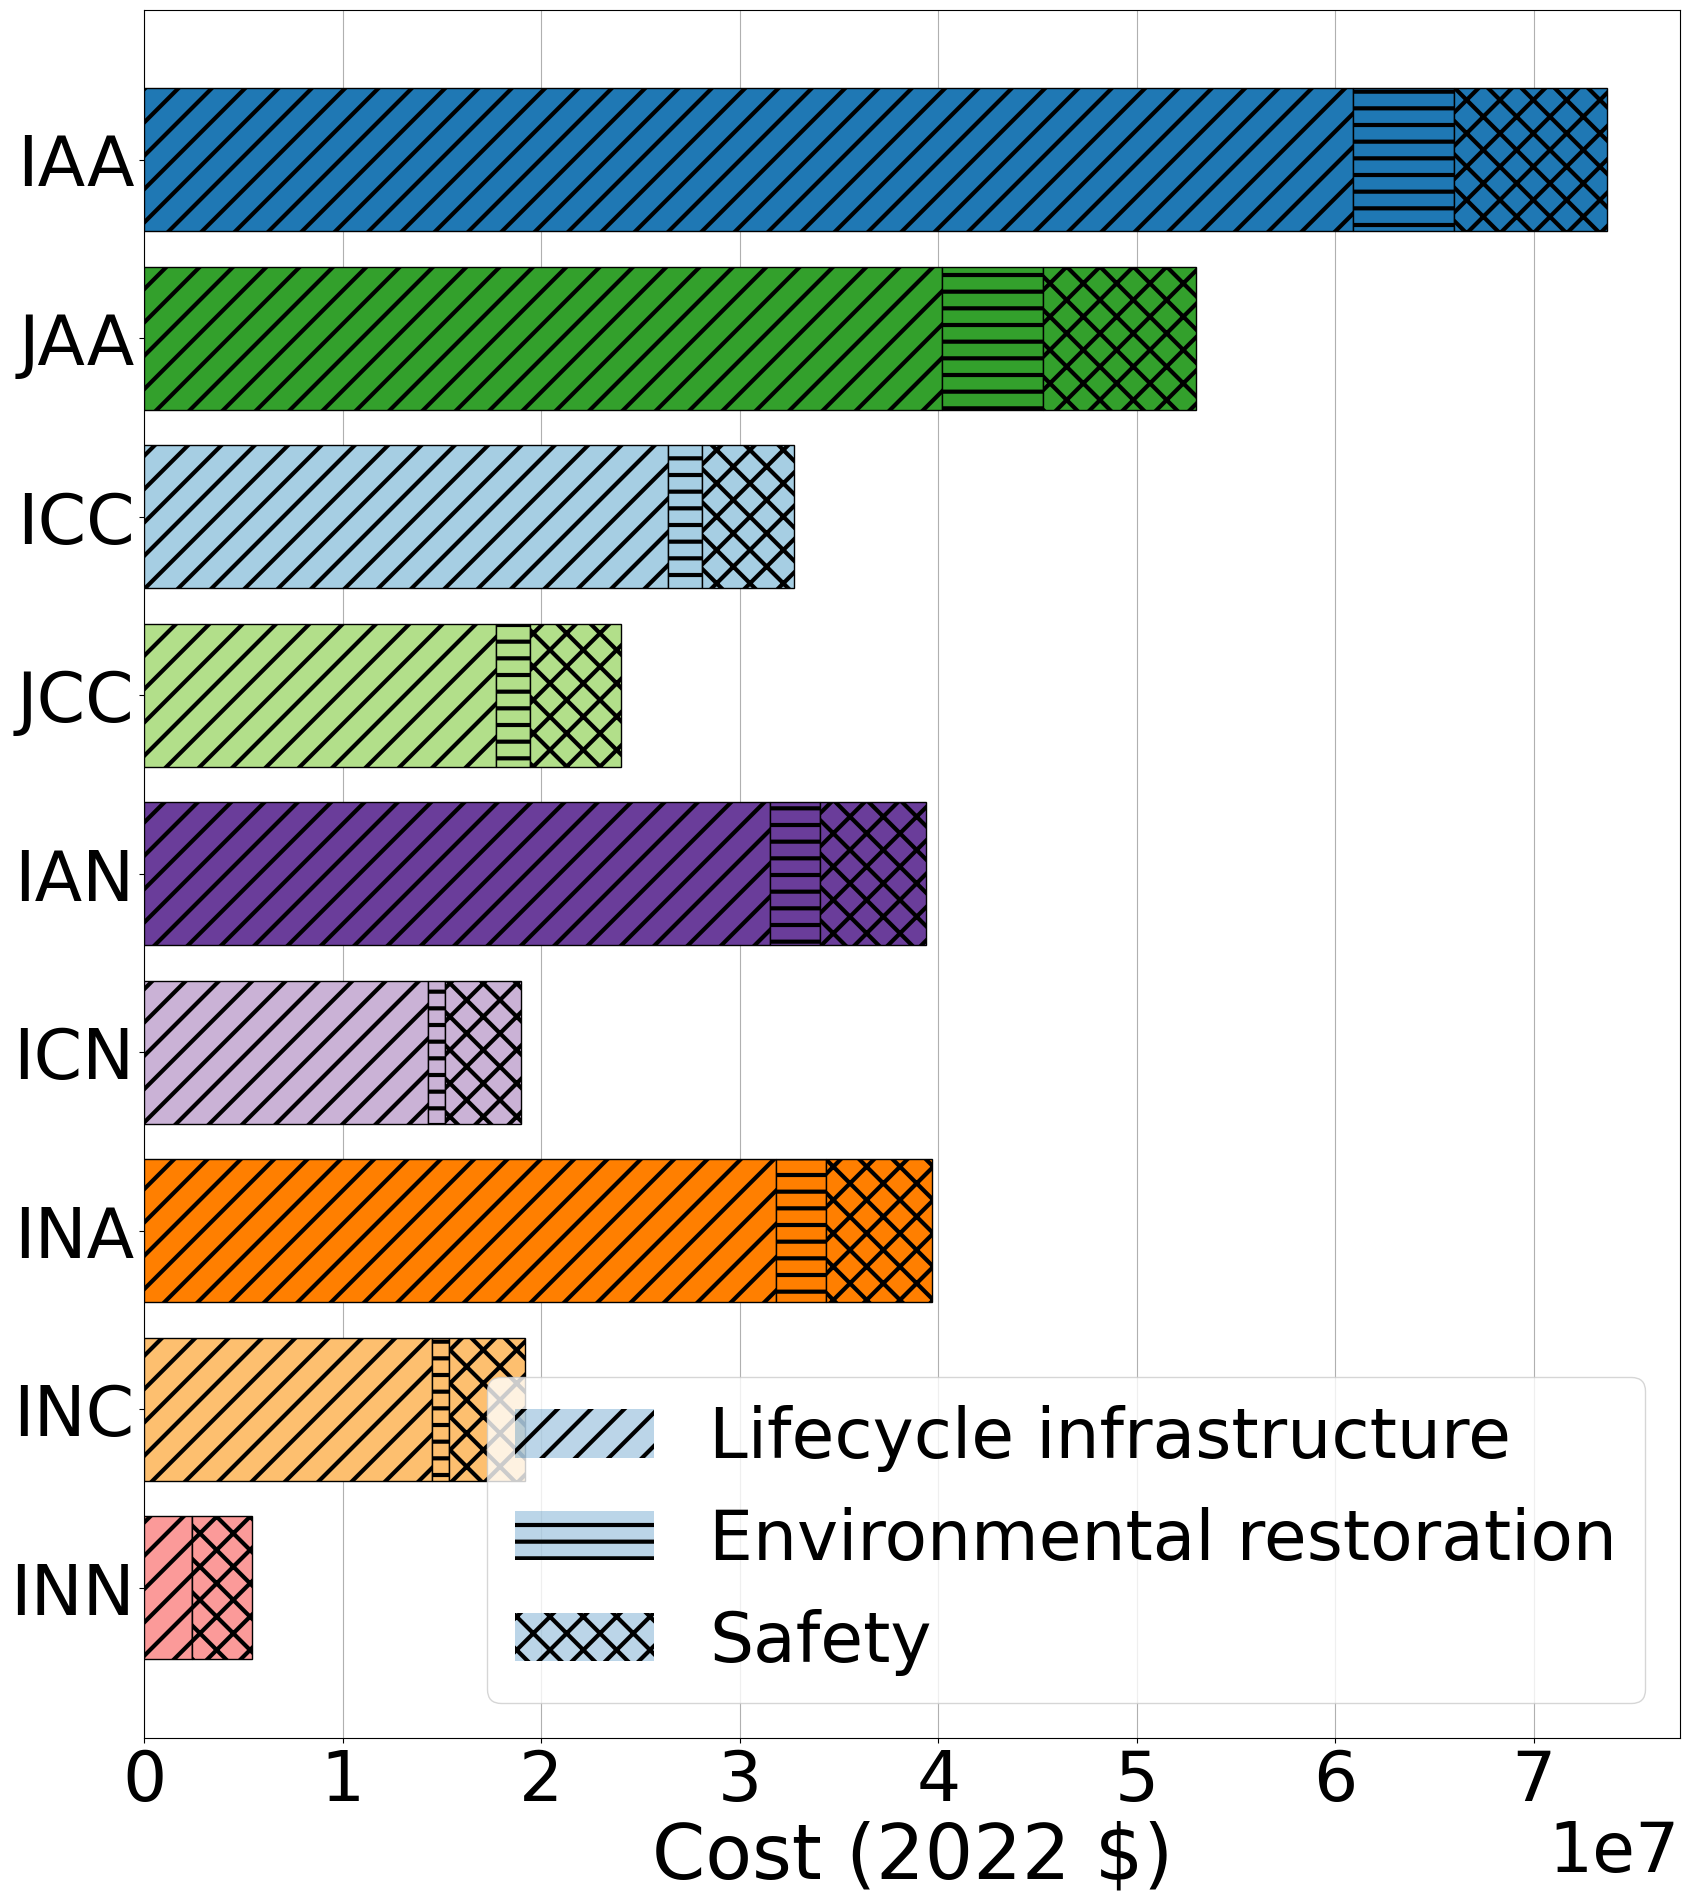

In [282]:
fig,(ax) = plt.subplots()
fig.set_size_inches(16, 18)
x= df_npv_cost.index
issues_addressed = [10, 14, 0, 10, 15, 15]
issues_pending = [5, 10, 50, 2, 0, 10]
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']

#mpl.rc('hatch', color='k', linewidth=1.5)
mpl.rcParams['hatch.linewidth'] = 3.0 

b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='/', zorder=3)

b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='-', zorder=3)

b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='x', zorder=3)

plt.yticks(df_npv_cost.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])

a_val = 0.3



circ1 = mpatches.Patch( alpha=a_val,hatch=r'/',label='Lifecycle infrastructure')
circ2= mpatches.Patch( alpha=a_val,hatch='-',label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val,hatch='x',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=50)
plt.tight_layout()

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel("Cost (2022 $)", fontsize=55)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

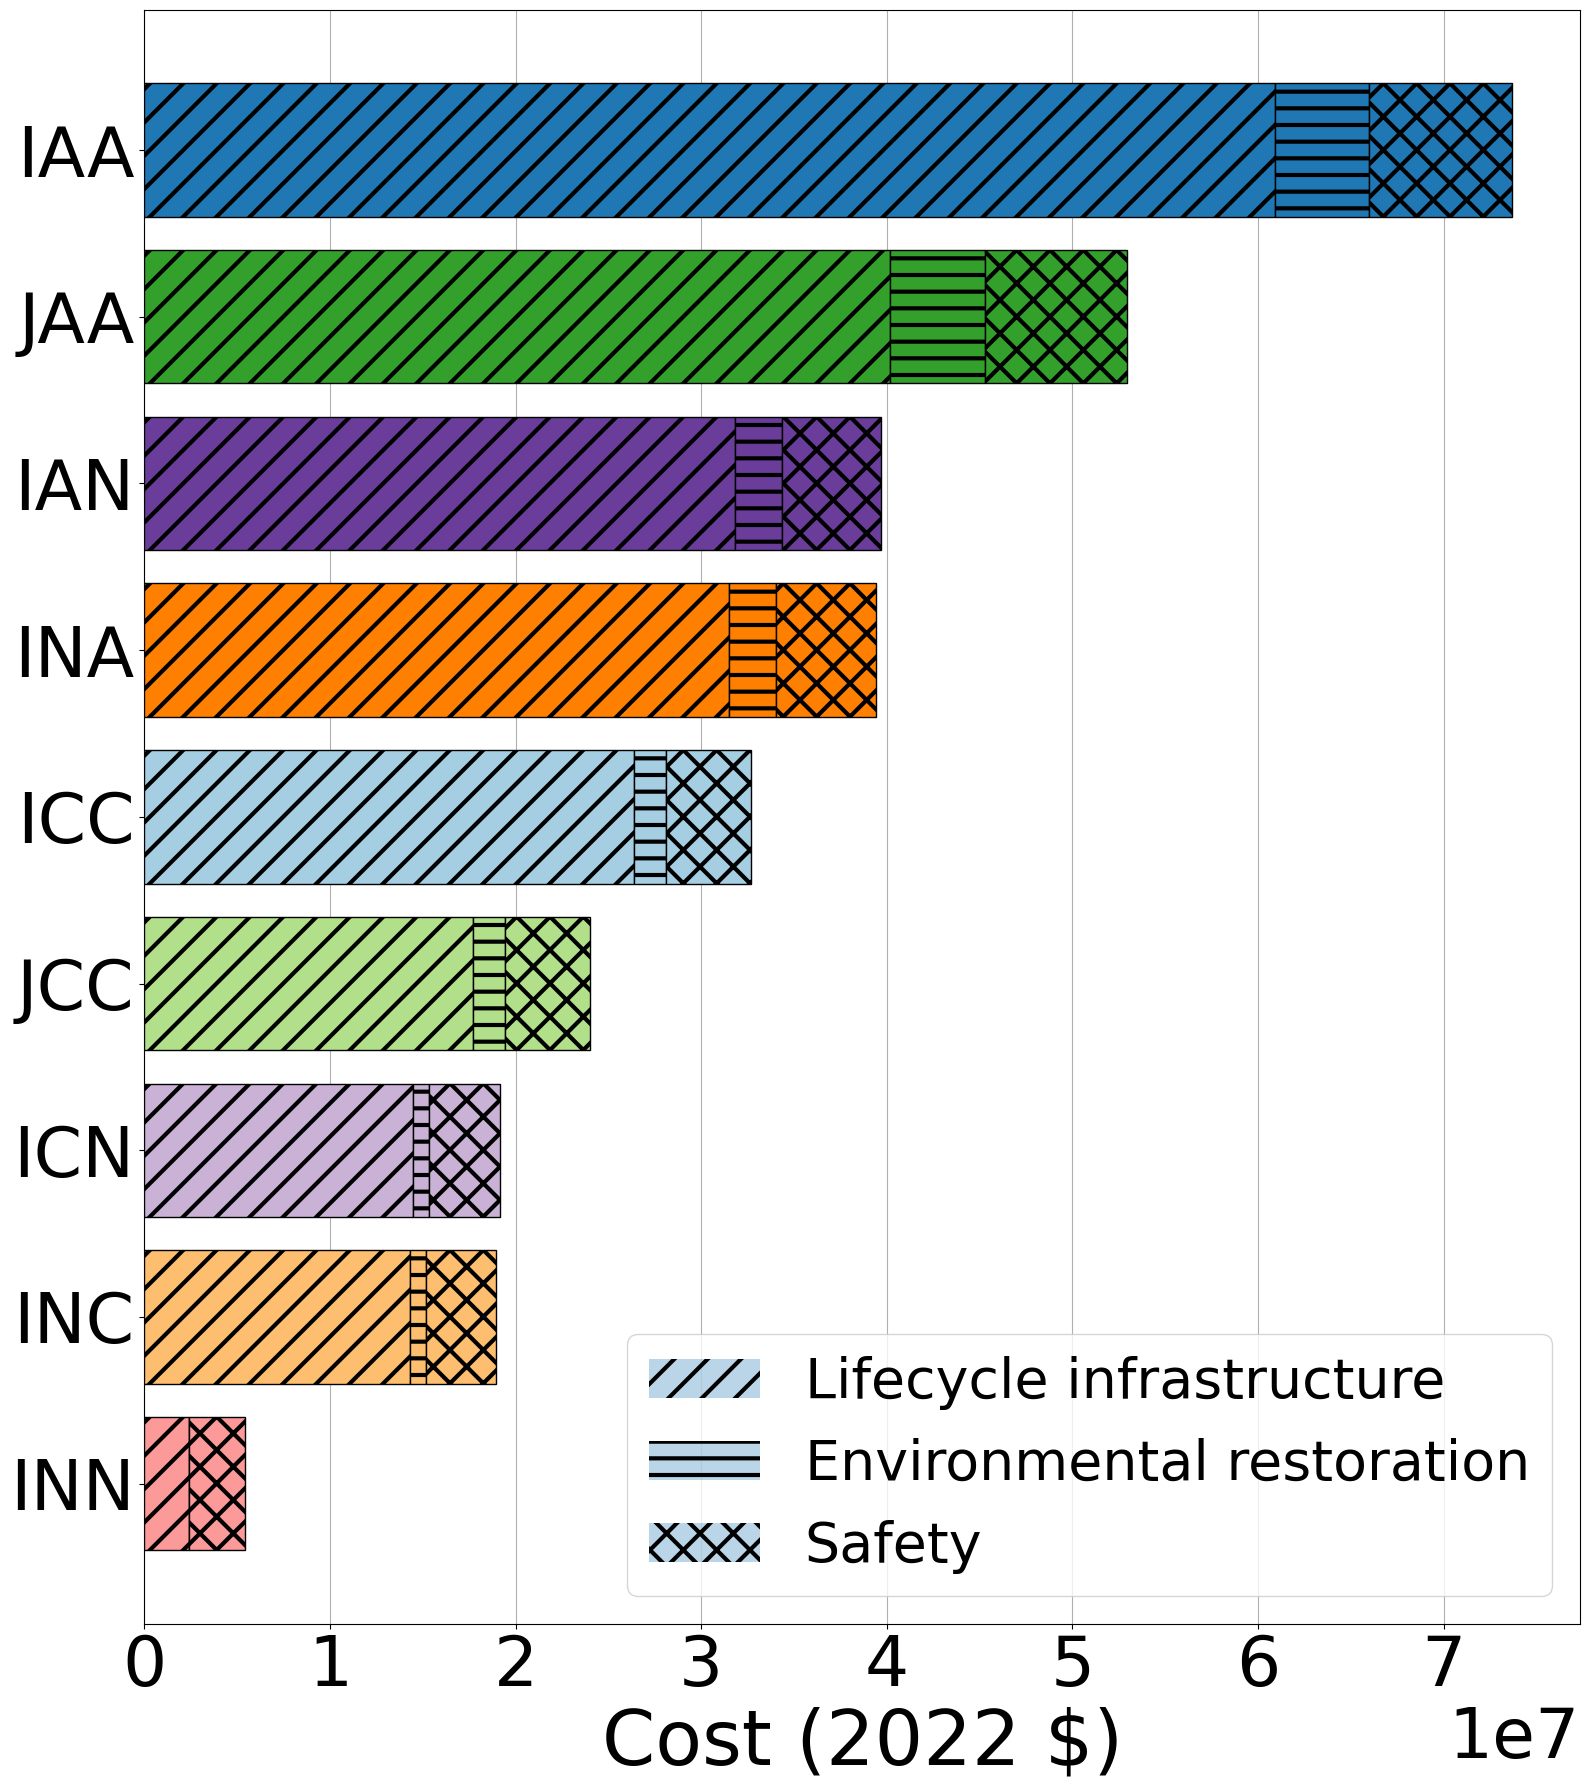

In [283]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming df_npv_cost is already defined and loaded with data
# Calculate the total for each strategy
total_cost = df_npv_cost['lifecycle_infrastructure'] + df_npv_cost['environmental_restoration'] + df_npv_cost['safety']

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots(figsize=(16, 18))

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

#['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
#['#FB9A99','#FDBF6F','#6A3D9A','#FF7F00','#A6CEE3','#B2DF8A','#CAB2D6','#33A02C','#1F78B4']

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1,             color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1,    color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the original names, matched with the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), [df_npv_cost.index[i] for i in sorted_indices_reversed], fontsize=50)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)
plt.yticks(df_npv_cost.index, labels=['INN','INC','ICN','JCC','ICC','INA','IAN','JAA','IAA'])


# Set labels and grid
plt.xlabel("Cost (2022 $)", fontsize=55)
plt.xticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


In [284]:
df_npv_cost

,Strategy,lifecycle_infrastructure,environmental_restoration,safety
0,INN,2390000.0,0.000000e+00,3030000.0
1,INC,14500000.0,8.567154e+05,3810000.0
2,INA,31800000.0,2.539788e+06,5360000.0
3,ICN,14300000.0,8.567154e+05,3810000.0
4,IAN,31500000.0,2.539788e+06,5360000.0
5,JCC,17700000.0,1.713431e+06,4590000.0
6,ICC,26400000.0,1.713431e+06,4590000.0
7,JAA,40200000.0,5.079576e+06,7690000.0
8,IAA,60900000.0,5.079576e+06,7690000.0


In [285]:
iaa_infra = df_npv_cost['lifecycle_infrastructure'][8]  # Index of IAA
icc_infra = df_npv_cost['lifecycle_infrastructure'][6]  # Index of ICC

# Calculating the percentage increase of IAA's lifecycle infrastructure over ICC's.
percentage_increase = ((iaa_infra - icc_infra) / icc_infra) * 100
percentage_increase

130.6818181818182

In [286]:
iaa_infra = df_npv_cost['lifecycle_infrastructure'][8]  # Index of IAA
jaa_infra = df_npv_cost['lifecycle_infrastructure'][7]  # Index of JAA

# Calculating the percentage increase of IAA's lifecycle infrastructure over ICC's.
percentage_increase = ((iaa_infra - jaa_infra) / iaa_infra) * 100
percentage_increase

33.99014778325123

In [287]:
icc_infra = df_npv_cost['lifecycle_infrastructure'][6]  # Index of ICC
jcc_infra = df_npv_cost['lifecycle_infrastructure'][5]  # Index of JCC

# Calculating the percentage increase of IAA's lifecycle infrastructure over ICC's.
percentage_increase = ((icc_infra - jcc_infra) / icc_infra) * 100
percentage_increase

32.95454545454545

In [288]:
icc_infra = df_npv_cost['lifecycle_infrastructure'][6]  # Index of ICC
jcc_infra = df_npv_cost['lifecycle_infrastructure'][5]  # Index of JCC

# Calculating the percentage increase of IAA's lifecycle infrastructure over ICC's.
percentage_increase = ((icc_infra - jcc_infra) / icc_infra) * 100
percentage_increase

32.95454545454545

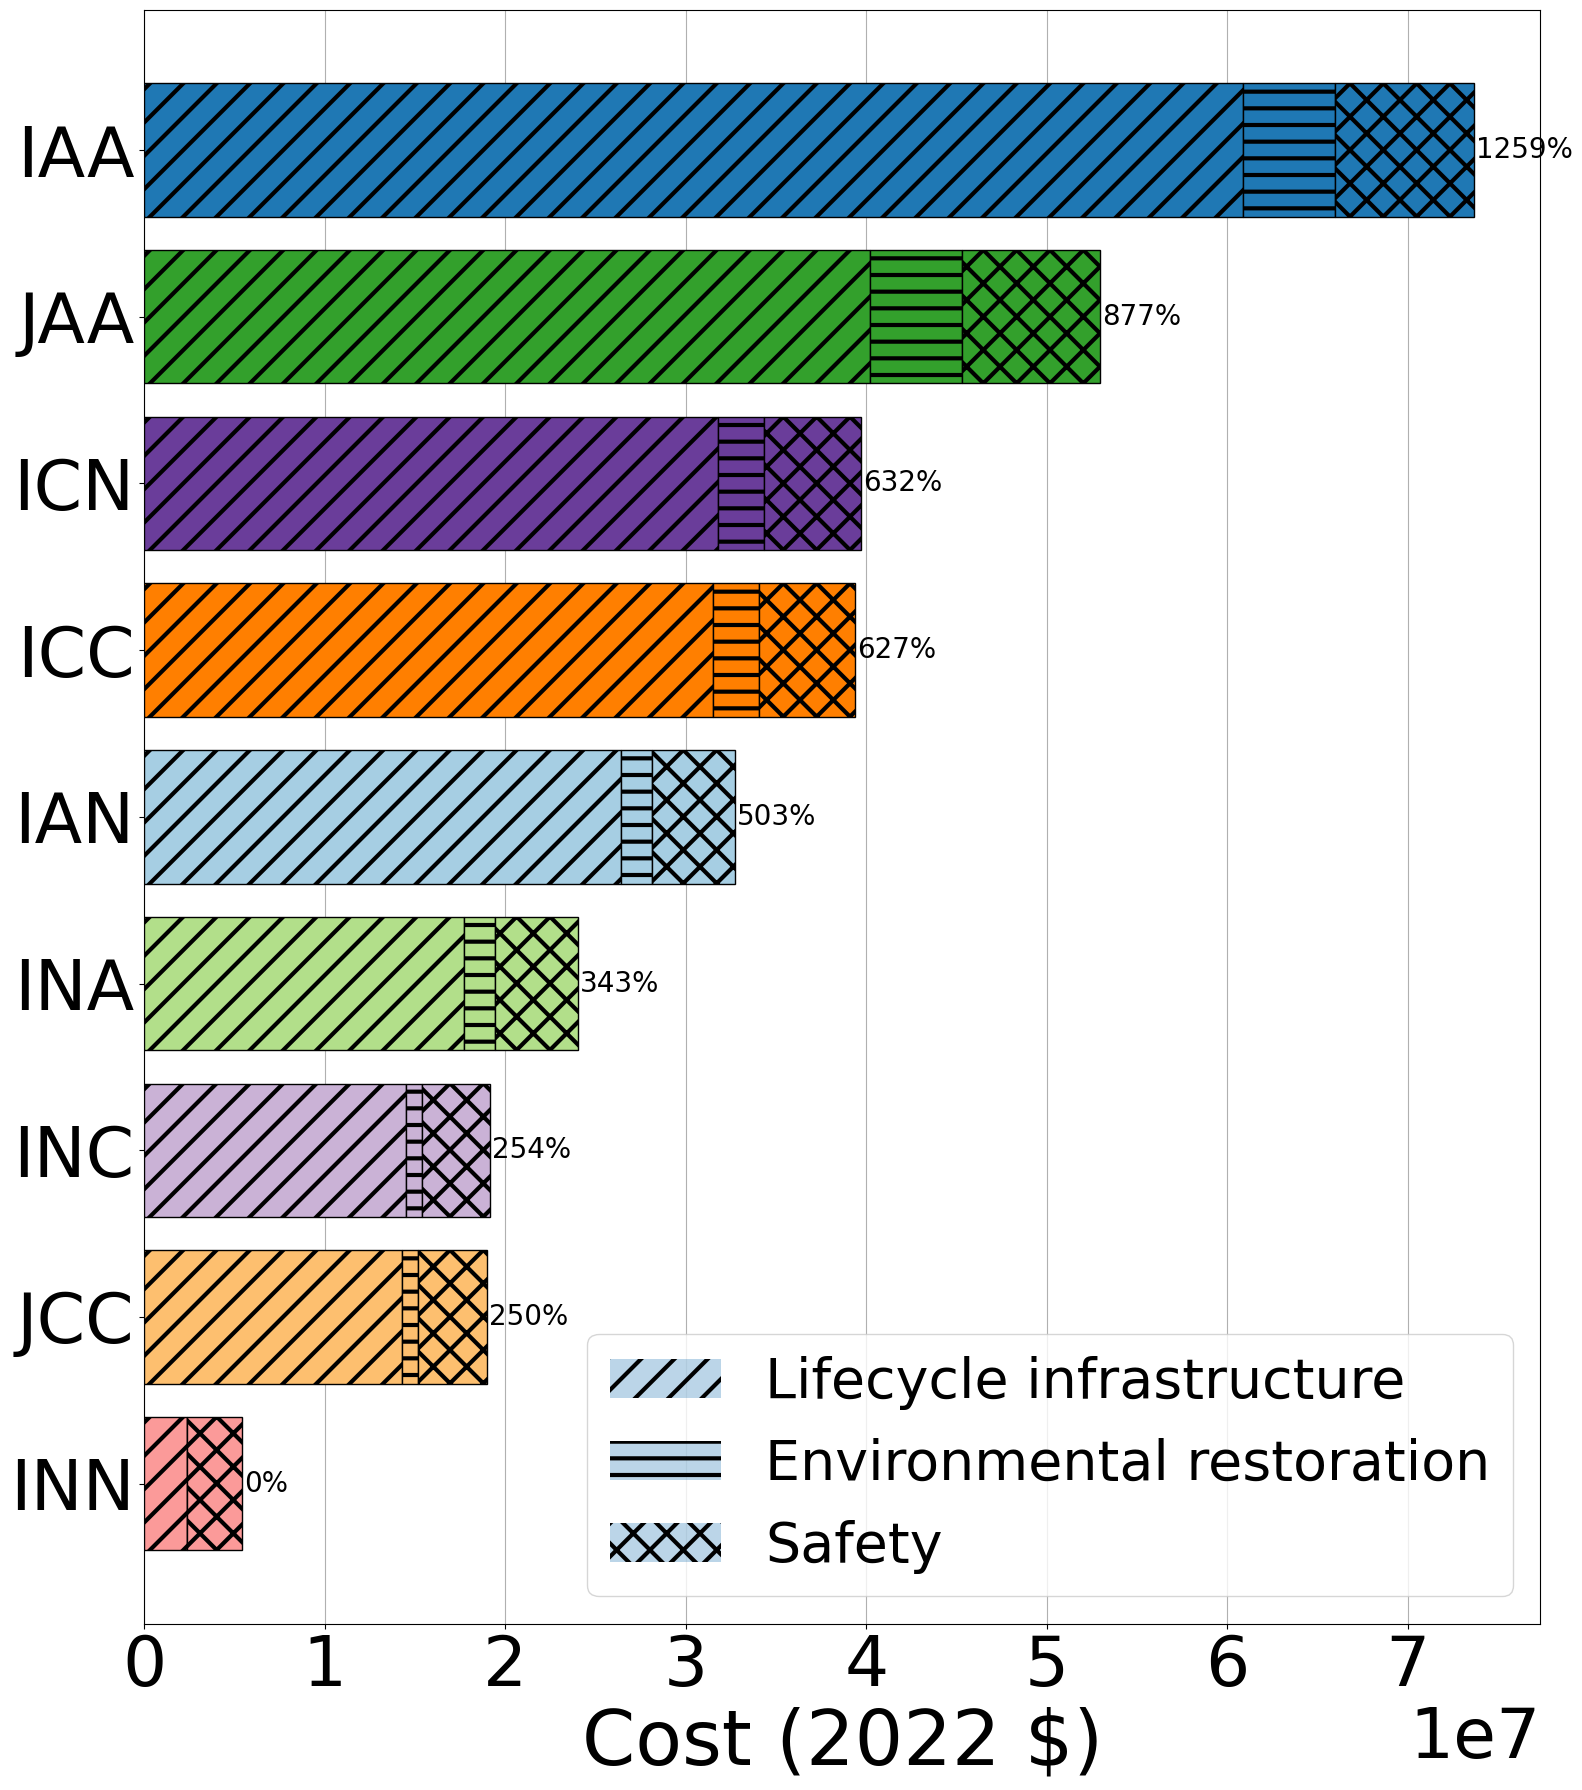

In [289]:
# Manually set the strategy names as the index if they aren't already
df_npv_cost.index = ['INN', 'INC', 'ICN', 'JCC', 'ICC', 'INA', 'IAN', 'JAA', 'IAA']

# Calculate the total cost for each strategy
total_cost = df_npv_cost['lifecycle_infrastructure'] + df_npv_cost['environmental_restoration'] + df_npv_cost['safety']

# Find the total cost of INN for reference
inn_total_cost = total_cost['INN']

# Calculate the percentage difference relative to INN for each strategy
percent_diff_to_inn = (total_cost - inn_total_cost) / inn_total_cost * 100

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots(figsize=(16, 18))

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), sorted_indices_reversed, fontsize=50)

# Annotating percentage difference relative to INN
for i, strategy in enumerate(sorted_indices_reversed):
    strategy_total_cost = total_cost[strategy]
    percent_value = percent_diff_to_inn[strategy]
    # Place the annotation at the end of each total bar, with a small offset to the right for readability
    ax.text(strategy_total_cost + inn_total_cost * 0.02, i, f'{percent_value:.0f}%', va='center', fontsize=20)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)

# Set labels and grid
plt.xlabel("Cost (2022 $)", fontsize=55)
plt.xticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


In [290]:
inn_total_cost

5420000.0

In [291]:
df_npv_cost

,Strategy,lifecycle_infrastructure,environmental_restoration,safety
INN,INN,2390000.0,0.000000e+00,3030000.0
INC,INC,14500000.0,8.567154e+05,3810000.0
ICN,INA,31800000.0,2.539788e+06,5360000.0
JCC,ICN,14300000.0,8.567154e+05,3810000.0
ICC,IAN,31500000.0,2.539788e+06,5360000.0
INA,JCC,17700000.0,1.713431e+06,4590000.0
IAN,ICC,26400000.0,1.713431e+06,4590000.0
JAA,JAA,40200000.0,5.079576e+06,7690000.0
IAA,IAA,60900000.0,5.079576e+06,7690000.0


In [292]:
df_npv_cost['total_cost']=df_npv_cost['lifecycle_infrastructure']+df_npv_cost['environmental_restoration']+df_npv_cost['safety']
df_npv_cost

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost
INN,INN,2390000.0,0.000000e+00,3030000.0,5.420000e+06
INC,INC,14500000.0,8.567154e+05,3810000.0,1.916672e+07
ICN,INA,31800000.0,2.539788e+06,5360000.0,3.969979e+07
JCC,ICN,14300000.0,8.567154e+05,3810000.0,1.896672e+07
ICC,IAN,31500000.0,2.539788e+06,5360000.0,3.939979e+07
INA,JCC,17700000.0,1.713431e+06,4590000.0,2.400343e+07
IAN,ICC,26400000.0,1.713431e+06,4590000.0,3.270343e+07
JAA,JAA,40200000.0,5.079576e+06,7690000.0,5.296958e+07
IAA,IAA,60900000.0,5.079576e+06,7690000.0,7.366958e+07


In [293]:
(3.192343e+07-2.322343e+07)/3.192343e+07

0.2725271062664632

In [294]:
(7.133958e+07-5.063958e+07)/7.133958e+07

0.29016150641761557

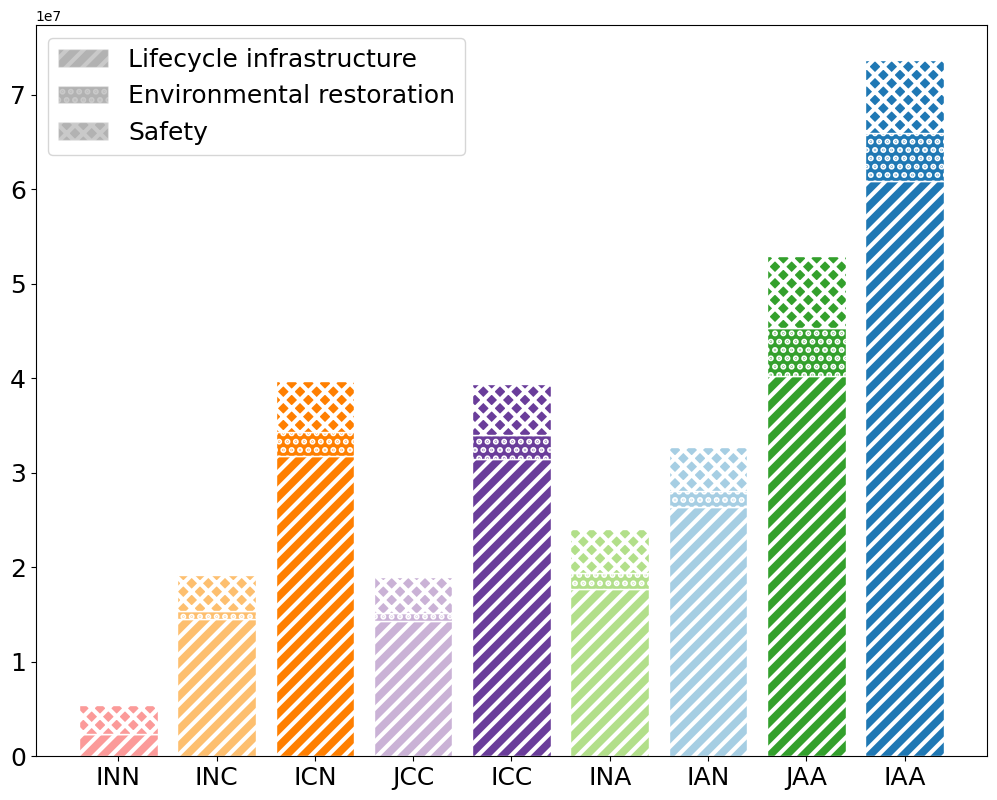

In [295]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 8)

x= df_npv_cost.index
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White', hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White',  hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White',  hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',edgecolor='White', alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',edgecolor='White', alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',edgecolor='White', alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)
plt.show()

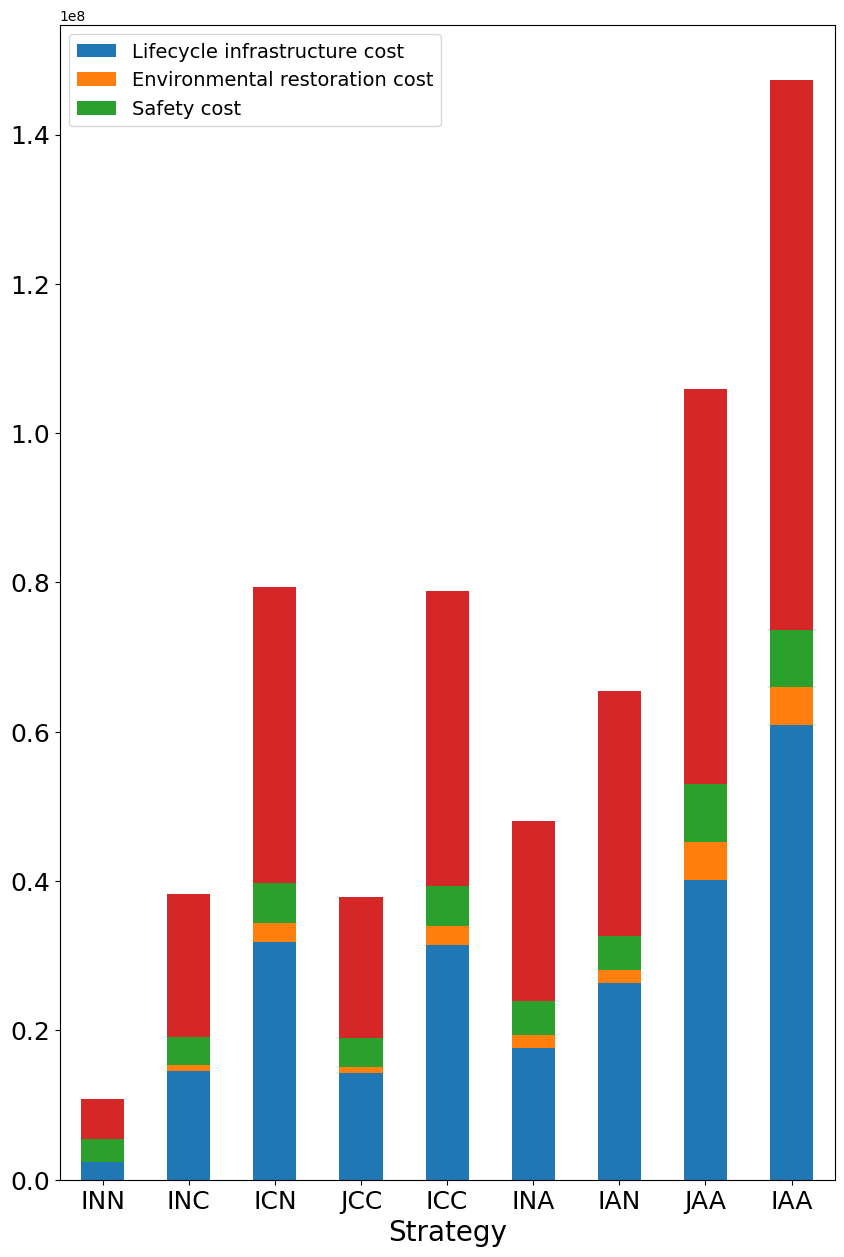

In [296]:
# plotting cost results integerated for broadband and electric
df_npv_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation = 0)
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)

In [297]:
df_npv_loss=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [298]:
df_npv_loss

,avoided_economic_losses
Strategy,
INN,0.0
INC,5930000.0
INA,11700000.0
ICN,18300000.0
IAN,36100000.0
JCC,24200000.0
ICC,24200000.0
JAA,47900000.0
IAA,47900000.0


In [299]:
df_npv_loss=df_npv_loss.reset_index()

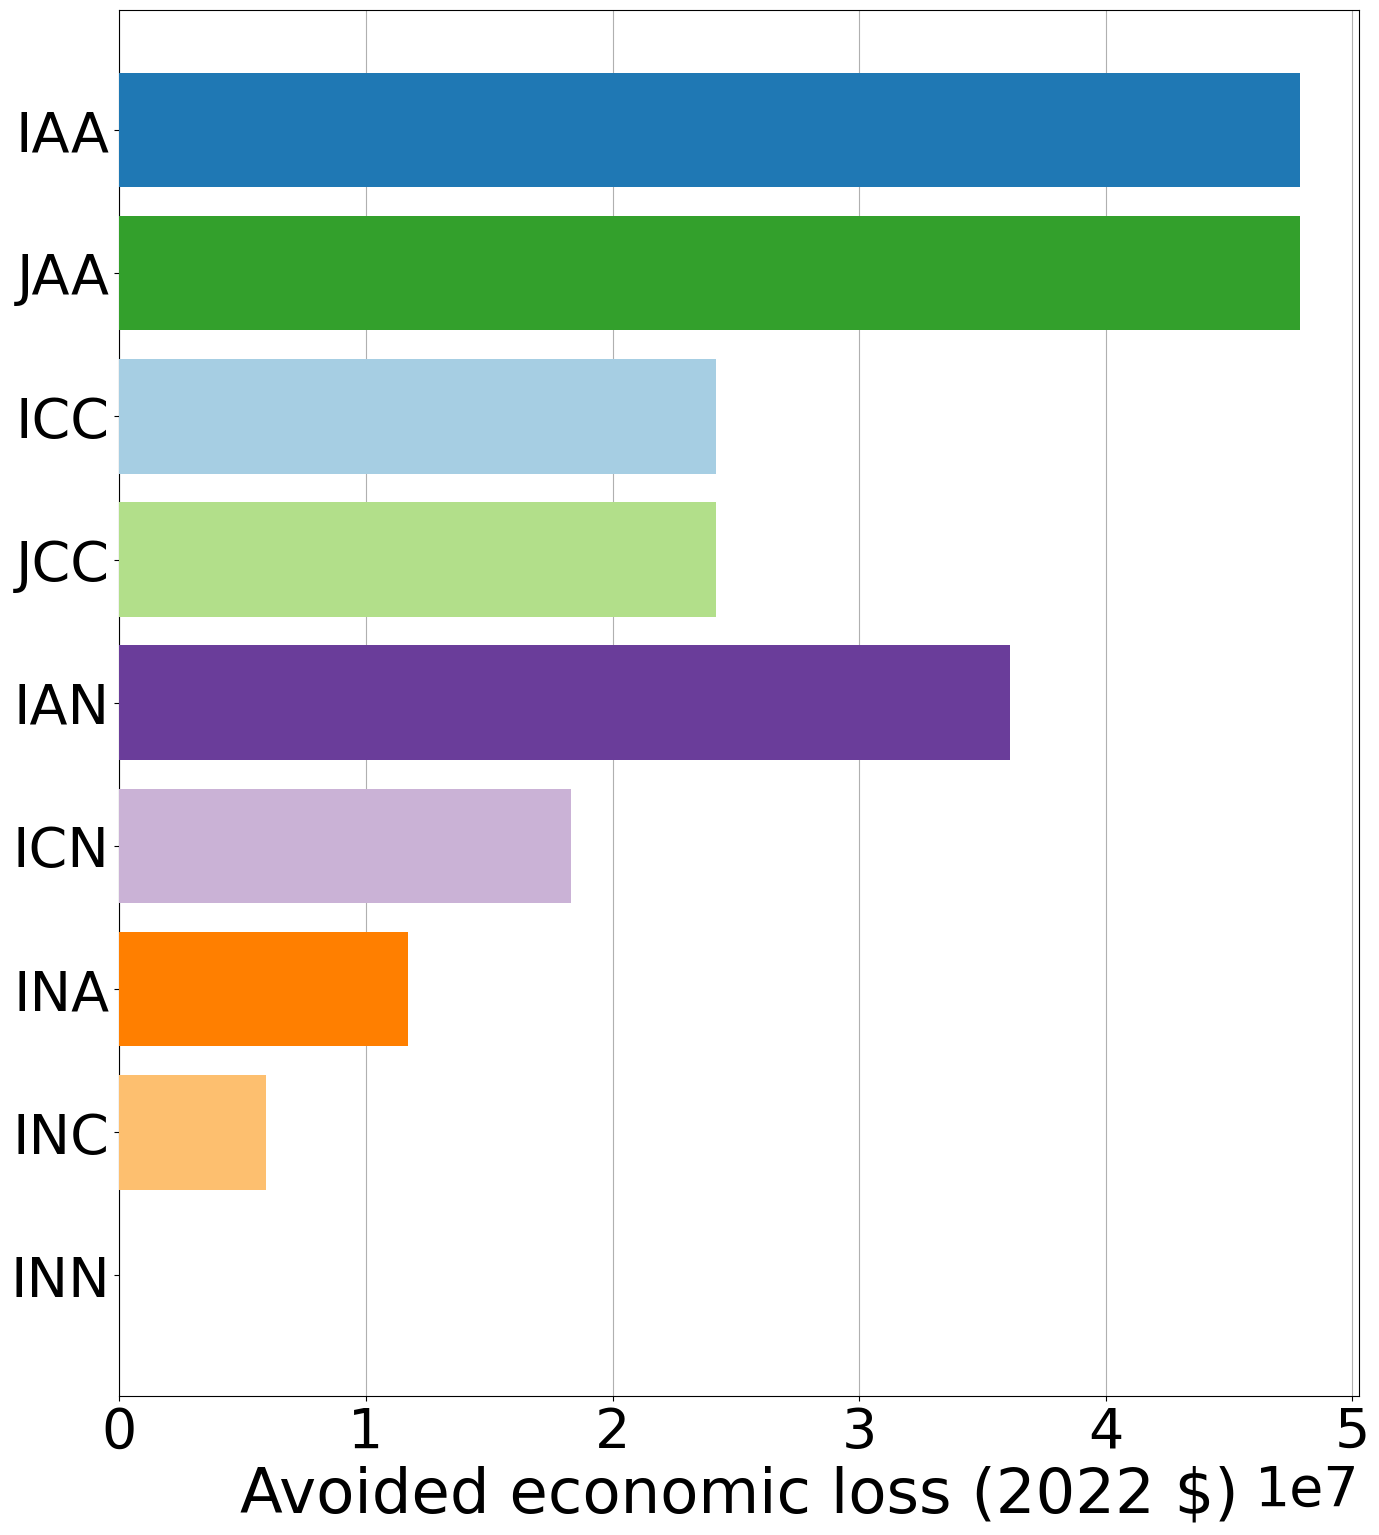

In [300]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss.loc[i,"avoided_economic_losses"],color=row, zorder=3)
plt.xlabel ('Avoided economic loss (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

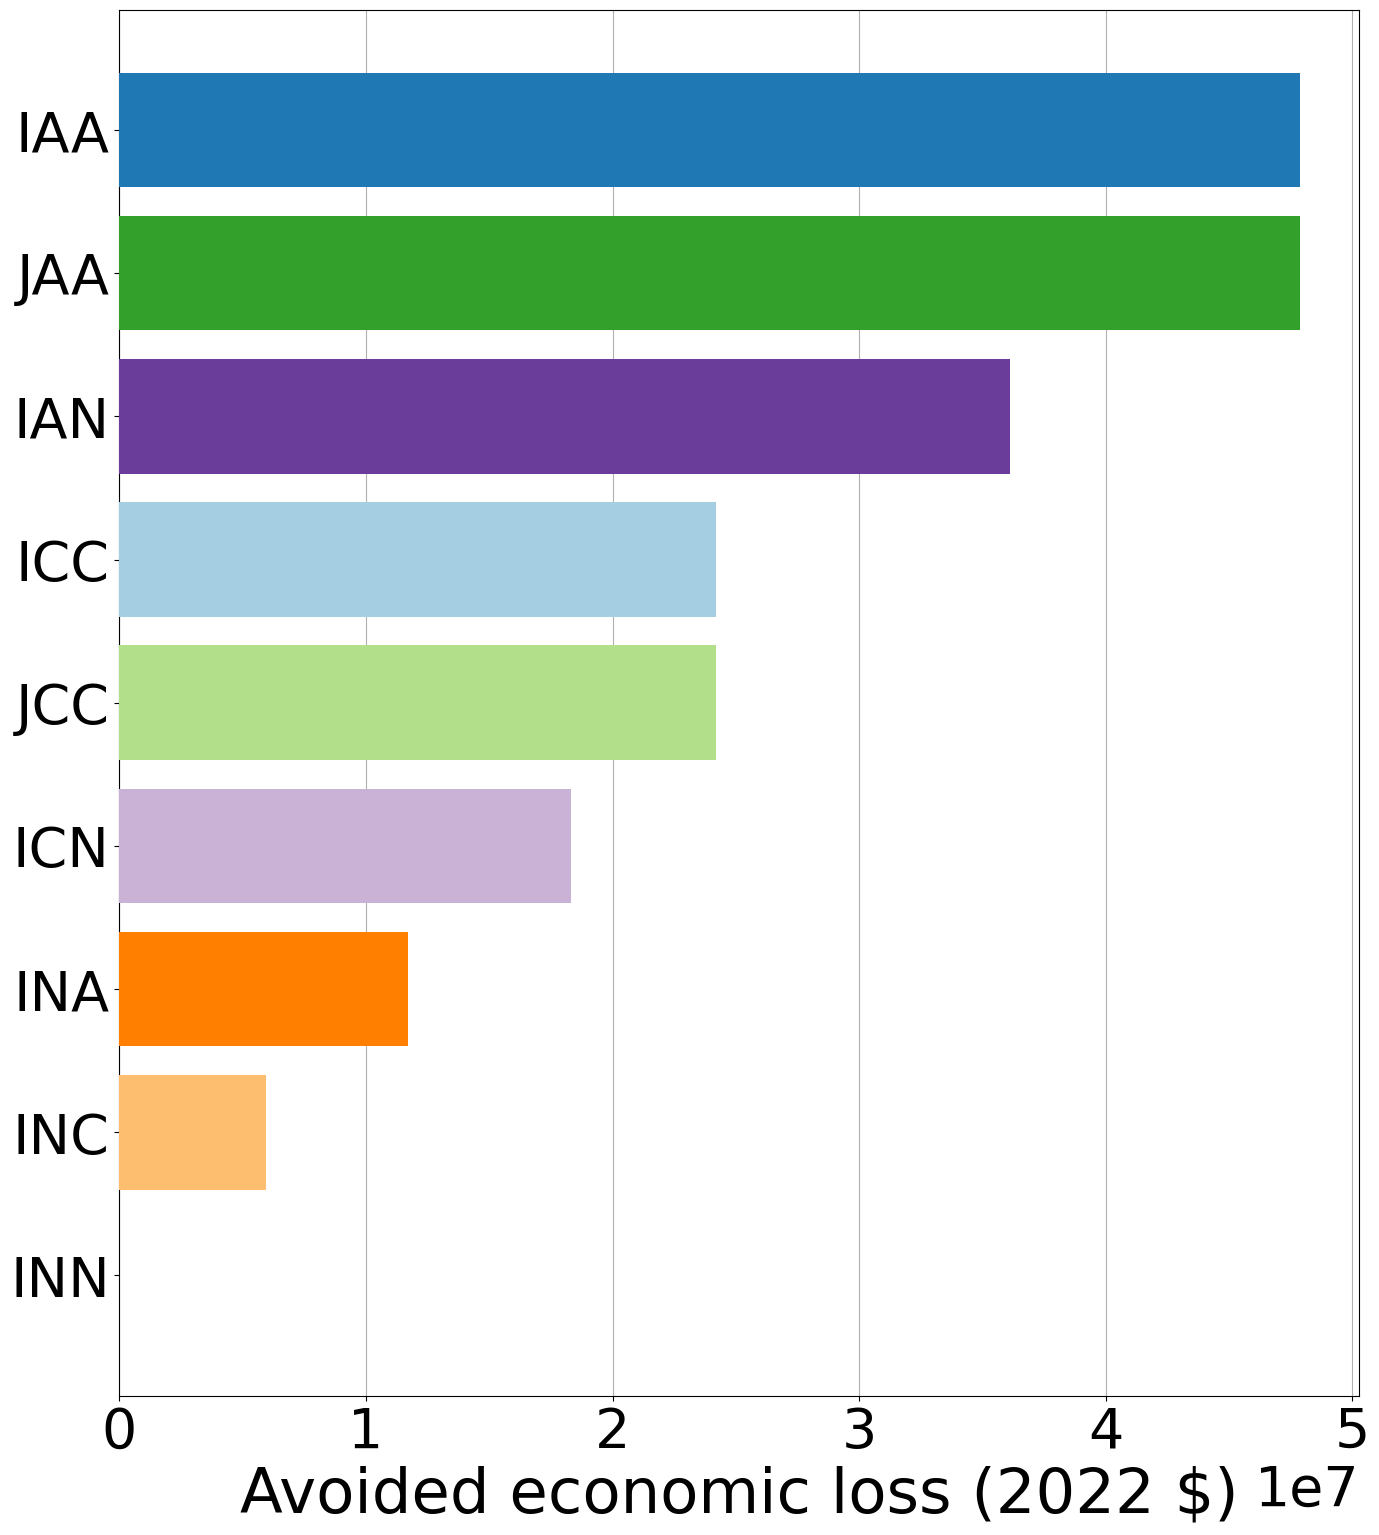

In [444]:
strategy_order = ['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA']
colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

color_mapping = dict(zip(strategy_order, colors))

# Sort the DataFrame based on 'avoided_economic_losses' and reset index
df_npv_loss_sorted = df_npv_loss.sort_values('avoided_economic_losses', ascending=True).reset_index(drop=True)

# Apply the color mapping
df_npv_loss_sorted['color'] = df_npv_loss_sorted['Strategy'].map(color_mapping)

fig, ax = plt.subplots(figsize=(16, 18))

# Loop over the sorted and re-indexed DataFrame using the mapped colors
for i, row in df_npv_loss_sorted.iterrows():
    plt.barh(i, row['avoided_economic_losses'], color=row['color'], zorder=3)

plt.xlabel('Avoided economic loss (2022 $)', fontsize=12)
plt.xticks(fontsize=40)
plt.yticks(range(len(df_npv_loss_sorted)), labels=df_npv_loss_sorted['Strategy'], fontsize=40)  # Set y-ticks and labels from the sorted DataFrame
plt.xlabel ('Avoided economic loss (2022 $)', fontsize=45)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

In [446]:
df_npv_loss_sorted

,Strategy,avoided_economic_losses,color
0,INN,0.0,#FB9A99
1,INC,5930000.0,#FDBF6F
2,INA,11700000.0,#FF7F00
3,ICN,18300000.0,#CAB2D6
4,JCC,24200000.0,#B2DF8A
5,ICC,24200000.0,#A6CEE3
6,IAN,36100000.0,#6A3D9A
7,JAA,47900000.0,#33A02C
8,IAA,47900000.0,#1F78B4


In [449]:
(47900000.0-24200000.0)/24200000.0

0.9793388429752066

In [302]:
# plotting loss results integerated for broadband and electric
#ax=df_npv_loss.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Loss results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

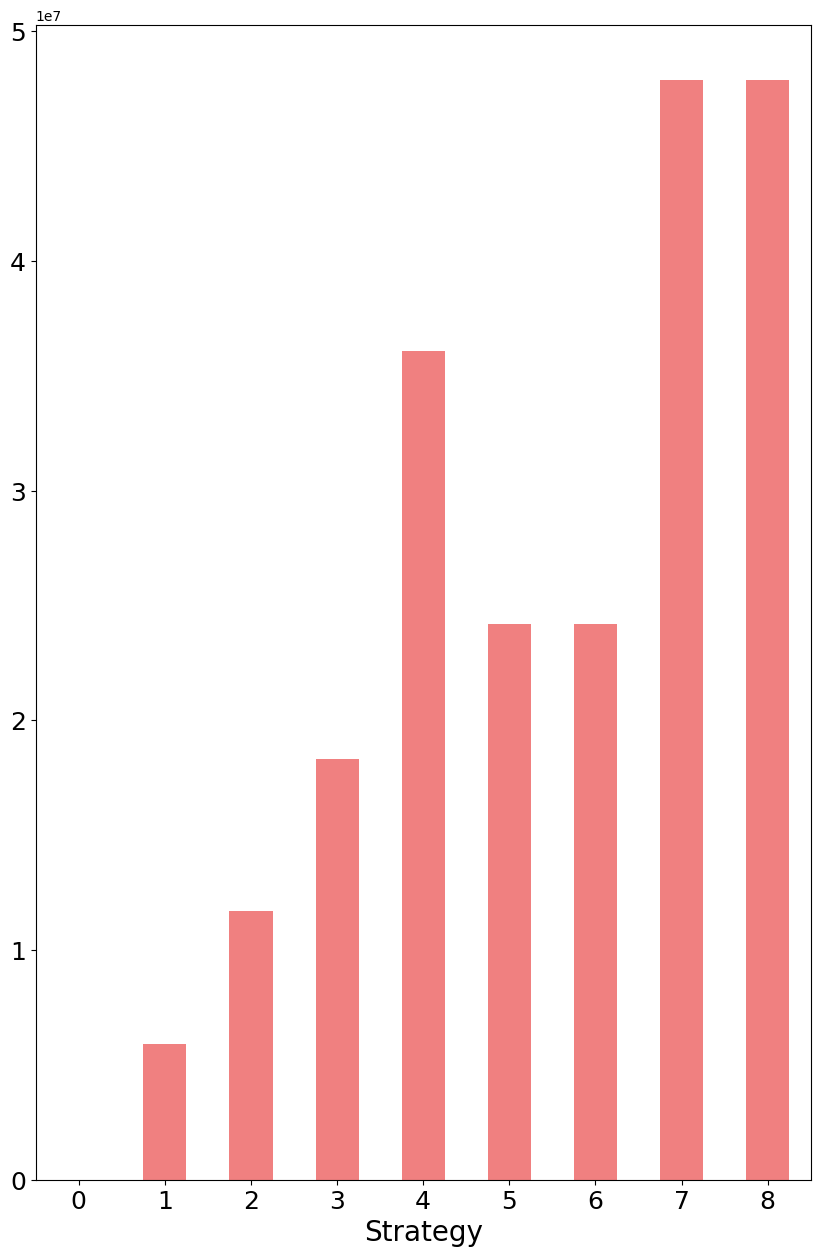

In [303]:
# plotting loss results integerated for broadband and electric
df_npv_loss.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

In [304]:
df_npv_benefit=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'avoided_economic_losses'], axis=1)

In [305]:
df_npv_benefit

,aesthetic_benefit
Strategy,
INN,0.000000e+00
INC,2.543672e+05
INA,7.182719e+05
ICN,2.543672e+05
IAN,7.182719e+05
JCC,5.087344e+05
ICC,5.087344e+05
JAA,1.436544e+06
IAA,1.436544e+06


In [306]:
df_npv_benefit=df_npv_benefit.reset_index()

In [307]:
df_npv_benefit

,Strategy,aesthetic_benefit
0,INN,0.000000e+00
1,INC,2.543672e+05
2,INA,7.182719e+05
3,ICN,2.543672e+05
4,IAN,7.182719e+05
5,JCC,5.087344e+05
6,ICC,5.087344e+05
7,JAA,1.436544e+06
8,IAA,1.436544e+06


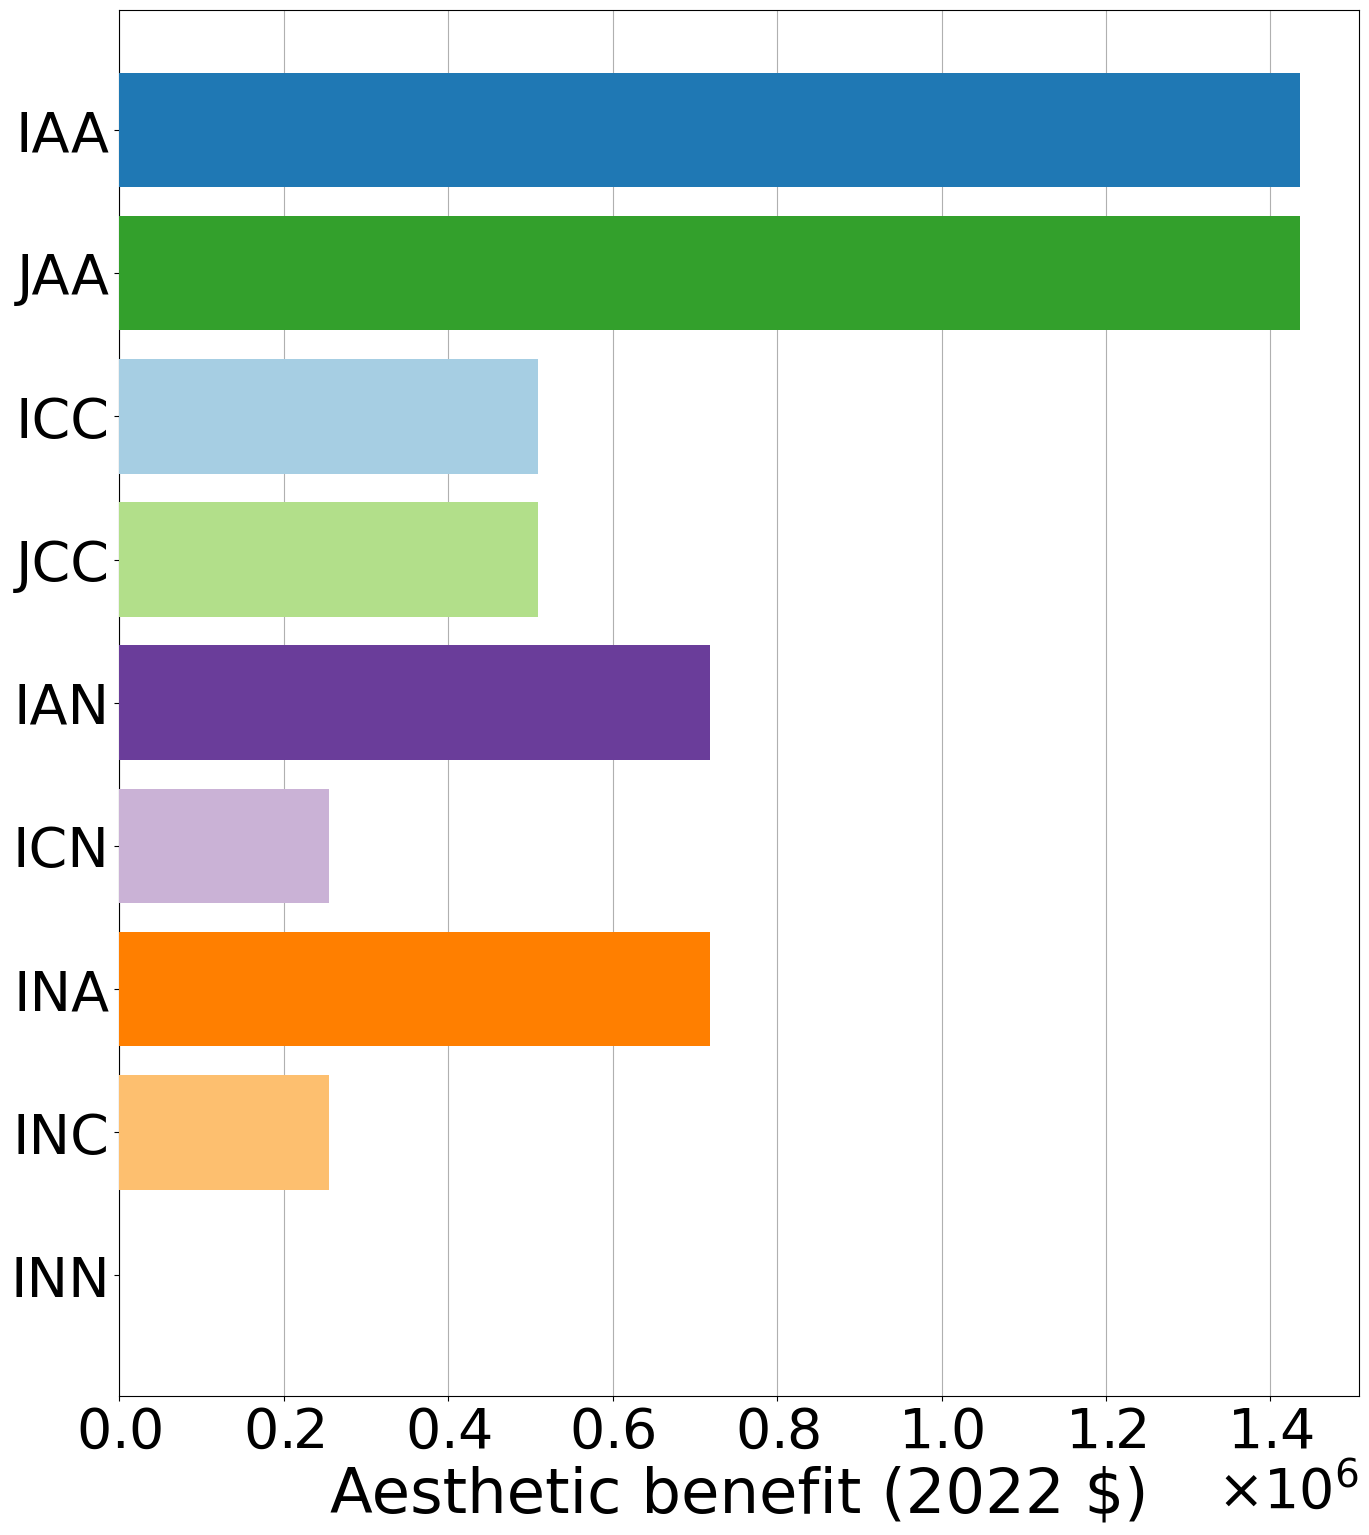

In [308]:
from matplotlib.ticker import ScalarFormatter

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit.loc[i,"aesthetic_benefit"],color=row, zorder=3)
plt.xlabel ('Aesthetic benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

# Set scientific notation for x-axis
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.offsetText.set_fontsize(40)

ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

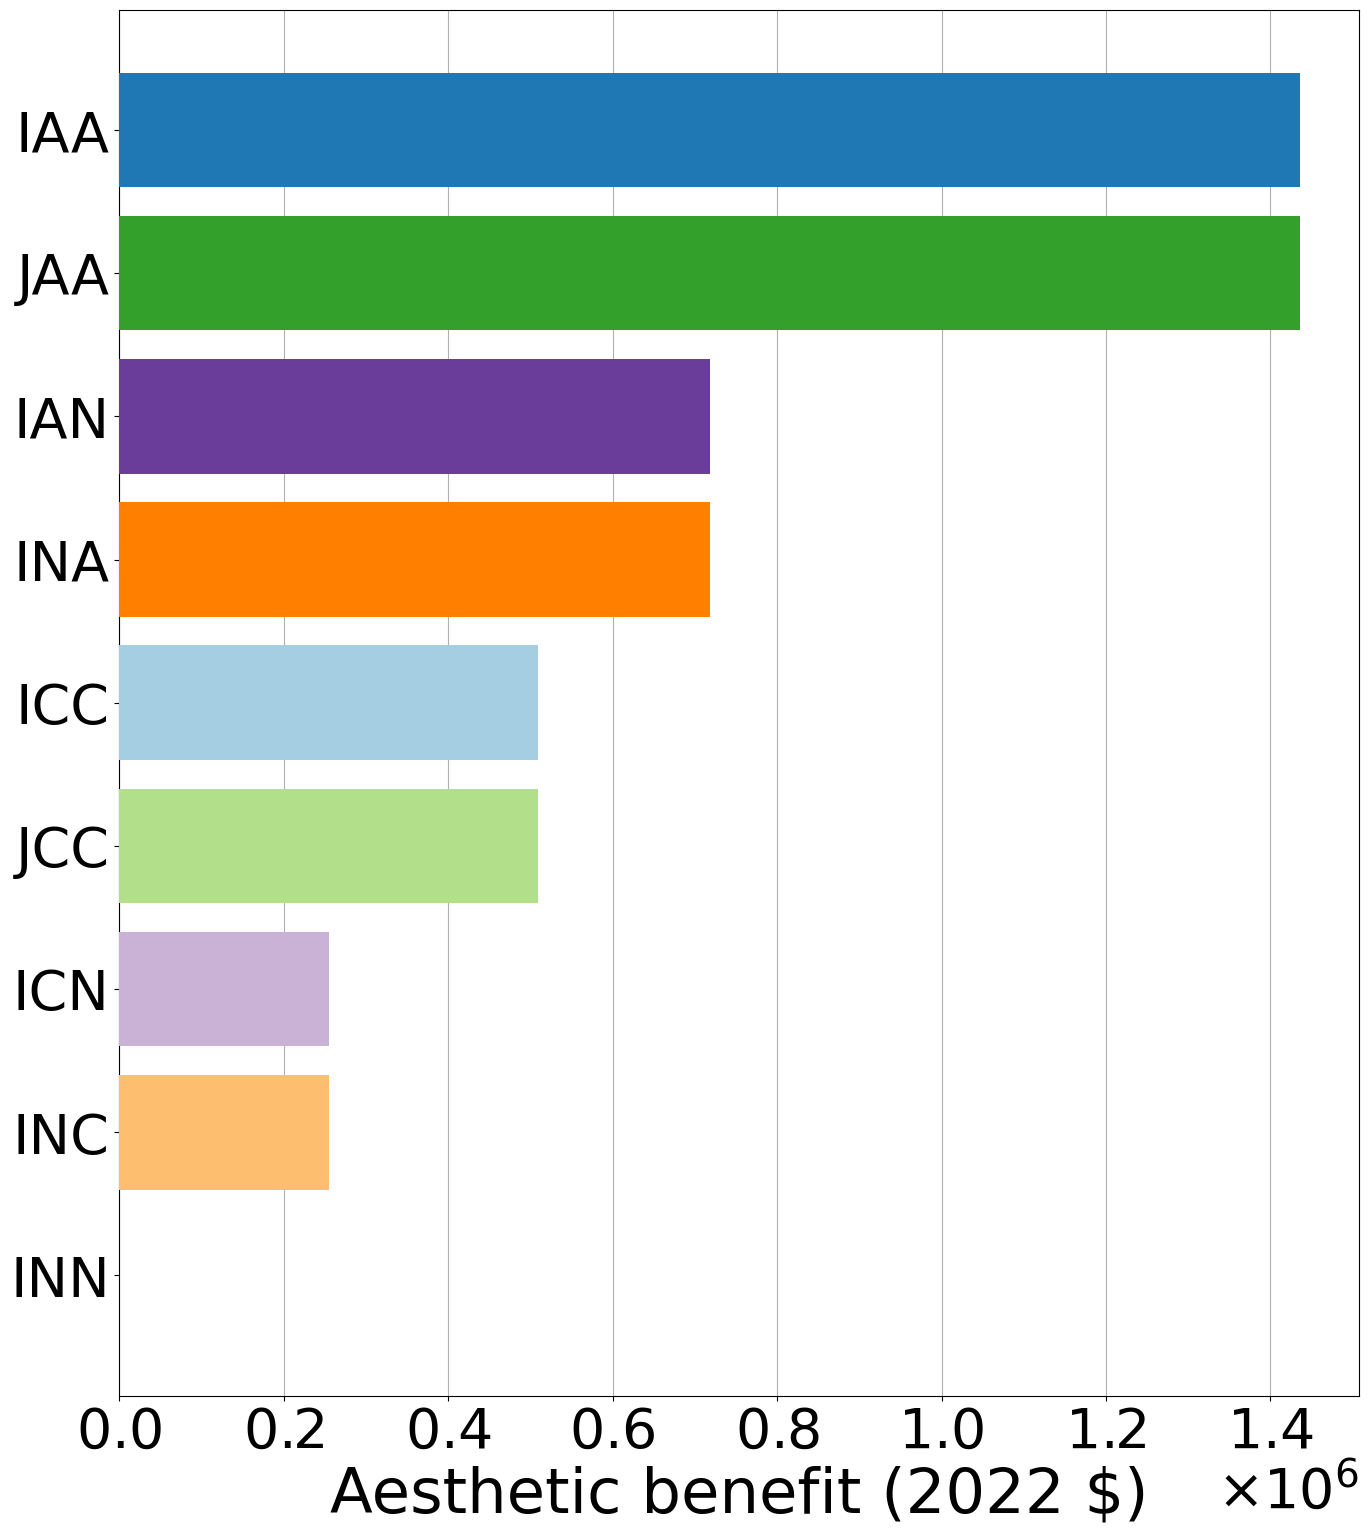

In [309]:
# Create a dictionary to map labels to colors
label_color_dict = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_benefit['Strategy'] = ['INN', 'INC', 'INA', 'ICN', 'IAN', 'JCC', 'ICC', 'JAA', 'IAA']
df_npv_benefit.set_index('Strategy', inplace=True)

# Sort the DataFrame in ascending order by 'aesthetic_benefit'
df_npv_benefit_sorted = df_npv_benefit.sort_values('aesthetic_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_benefit_sorted.iterrows()):
    plt.barh(i, row['aesthetic_benefit'], color=label_color_dict[index], zorder=3)

plt.xlabel('Aesthetic benefit (2022 $)', fontsize=45)
#plt.ylabel('Strategies', fontsize=45)  # Updated label for y-axis
plt.yticks(range(len(df_npv_benefit_sorted)), labels=df_npv_benefit_sorted.index, fontsize=40)
plt.xticks(fontsize=40)

# Set scientific notation for x-axis
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.offsetText.set_fontsize(40)

ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


In [310]:
# plotting benefit results integerated for broadband and electric
#ax=df_npv_benefit.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Benefit results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'INN'),
  Text(1, 0, 'INC'),
  Text(2, 0, 'INA'),
  Text(3, 0, 'ICN'),
  Text(4, 0, 'IAN'),
  Text(5, 0, 'JCC'),
  Text(6, 0, 'ICC'),
  Text(7, 0, 'JAA'),
  Text(8, 0, 'IAA')])

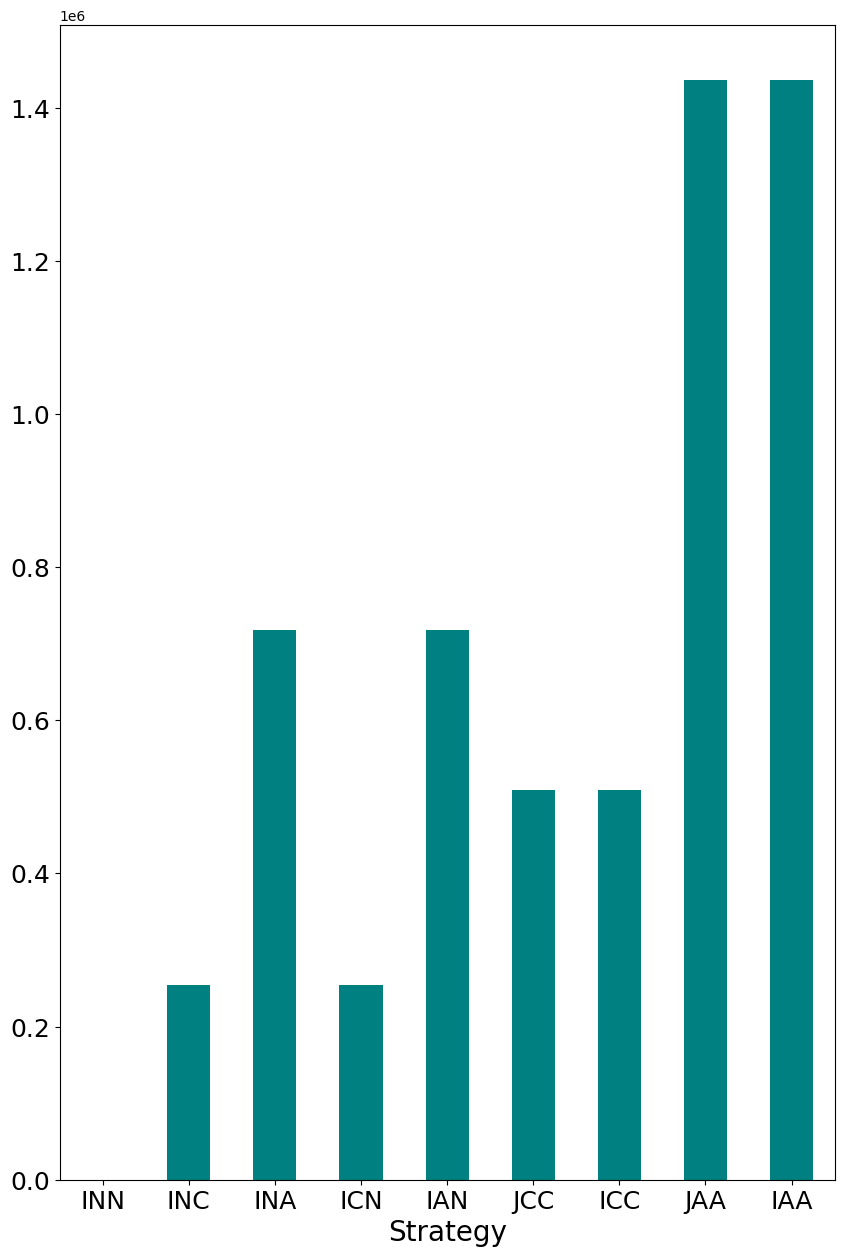

In [311]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

In [312]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_relative.csv') as npv_cost_loss_benefit_relative:
    df_npv_cost_loss_benefit_relative=pd.read_csv(npv_cost_loss_benefit_relative)
df_npv_cost_loss_benefit_relative

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,avoided_economic_losses,net_benefit,Unnamed: 8
0,INN,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN
1,INC,12100000.0,8.567154e+05,780000.0,13000000.0,254000.0,5930000.0,-6800000.0,NaN
2,INA,29400000.0,2.539788e+06,2330000.0,31900000.0,718000.0,11700000.0,-19400000.0,NaN
3,ICN,11900000.0,8.567154e+05,780000.0,13500000.0,254000.0,18300000.0,5050000.0,NaN
4,IAN,29100000.0,2.539788e+06,2330000.0,34000000.0,718000.0,36100000.0,2870000.0,NaN
5,JCC,15300000.0,1.713431e+06,1560000.0,17800000.0,509000.0,24200000.0,6930000.0,NaN
6,ICC,24000000.0,1.713431e+06,1560000.0,26500000.0,509000.0,24200000.0,-1770000.0,NaN
7,JAA,37800000.0,5.079576e+06,4660000.0,45300000.0,1440000.0,47900000.0,4010000.0,NaN
8,IAA,58500000.0,5.079576e+06,4660000.0,66000000.0,1440000.0,47900000.0,-16700000.0,NaN


In [313]:
df_npv_cost_loss_benefit_relative = df_npv_cost_loss_benefit_relative.set_index('Strategy')

In [314]:
df_npv_net_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','avoided_economic_losses'], axis=1)

In [315]:
df_npv_net_benefit_relative

,net_benefit,Unnamed: 8
Strategy,,
INN,0.0,NaN
INC,-6800000.0,NaN
INA,-19400000.0,NaN
ICN,5050000.0,NaN
IAN,2870000.0,NaN
JCC,6930000.0,NaN
ICC,-1770000.0,NaN
JAA,4010000.0,NaN
IAA,-16700000.0,NaN


In [316]:
df_npv_net_benefit_relative=df_npv_net_benefit_relative.reset_index()

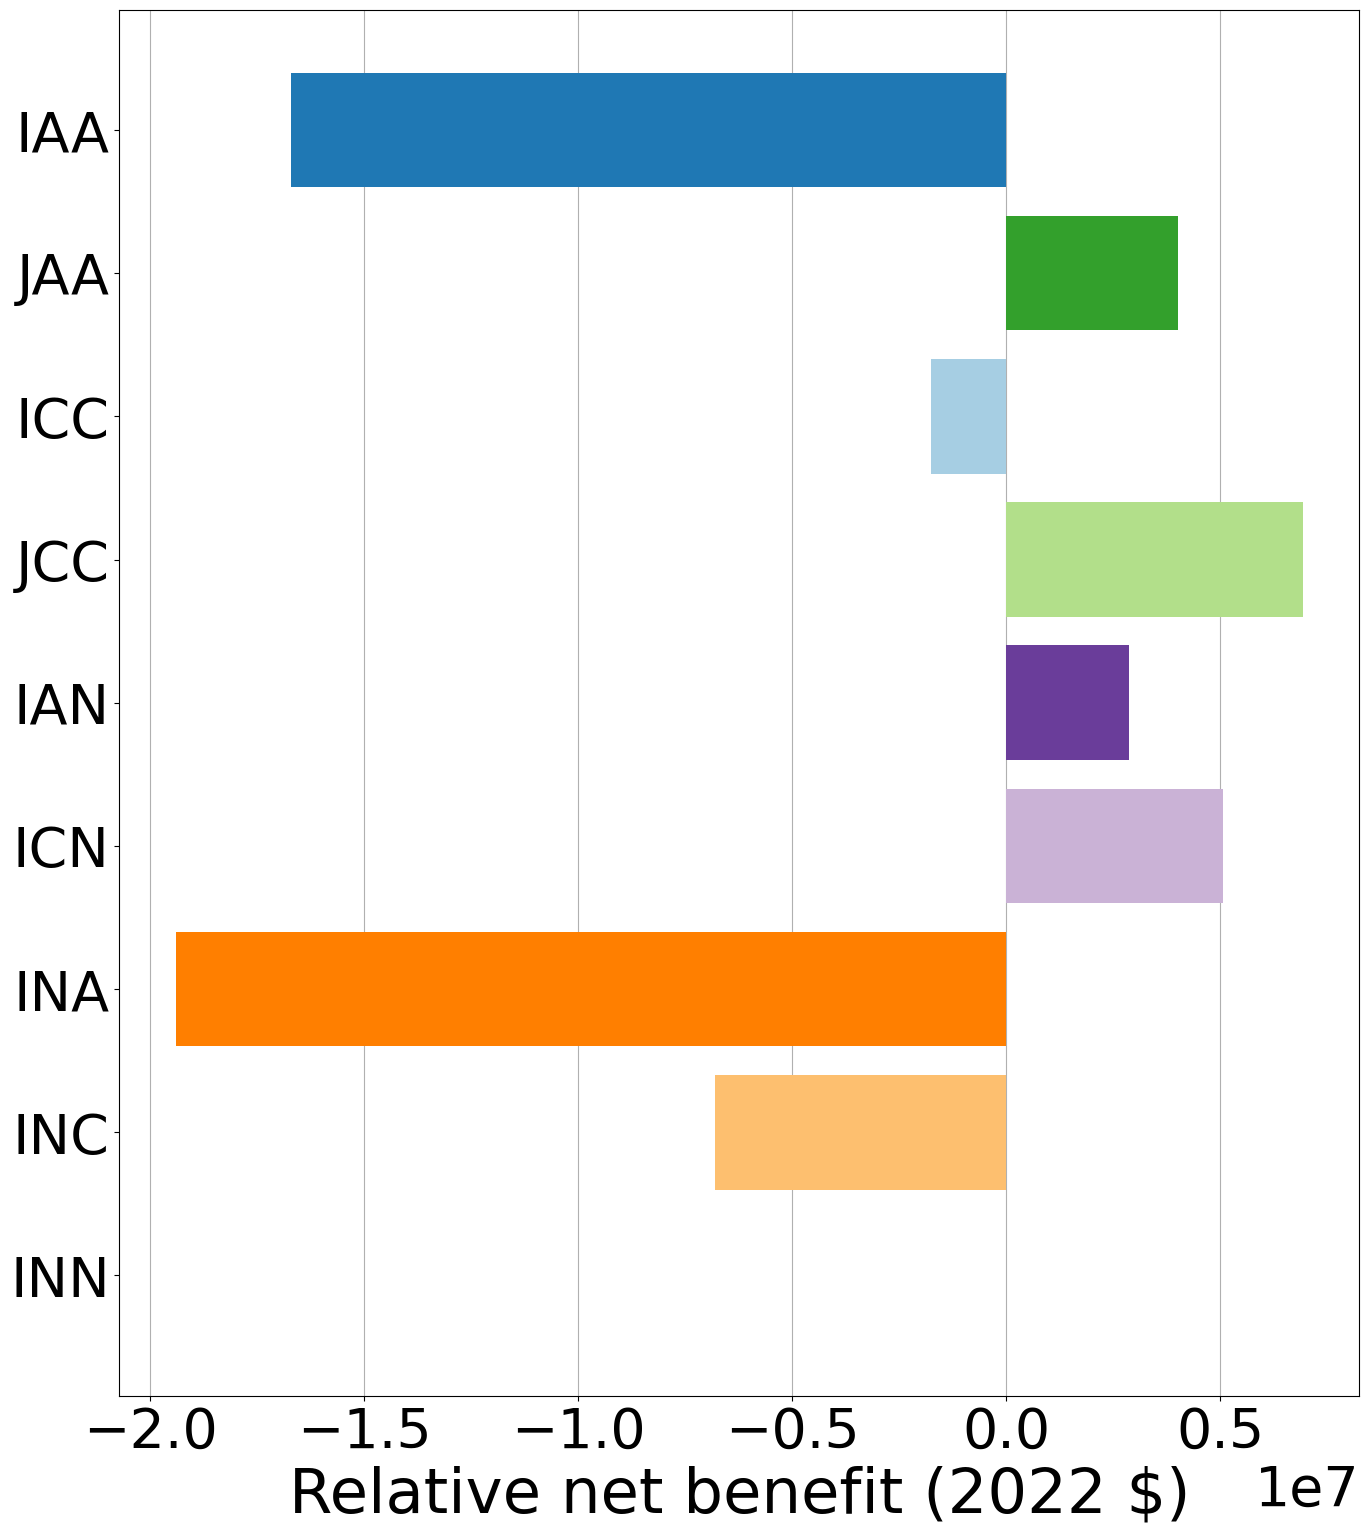

In [317]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_net_benefit_relative.loc[i,"net_benefit"],color=row, zorder=3)
plt.xlabel ('Relative net benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_net_benefit_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()

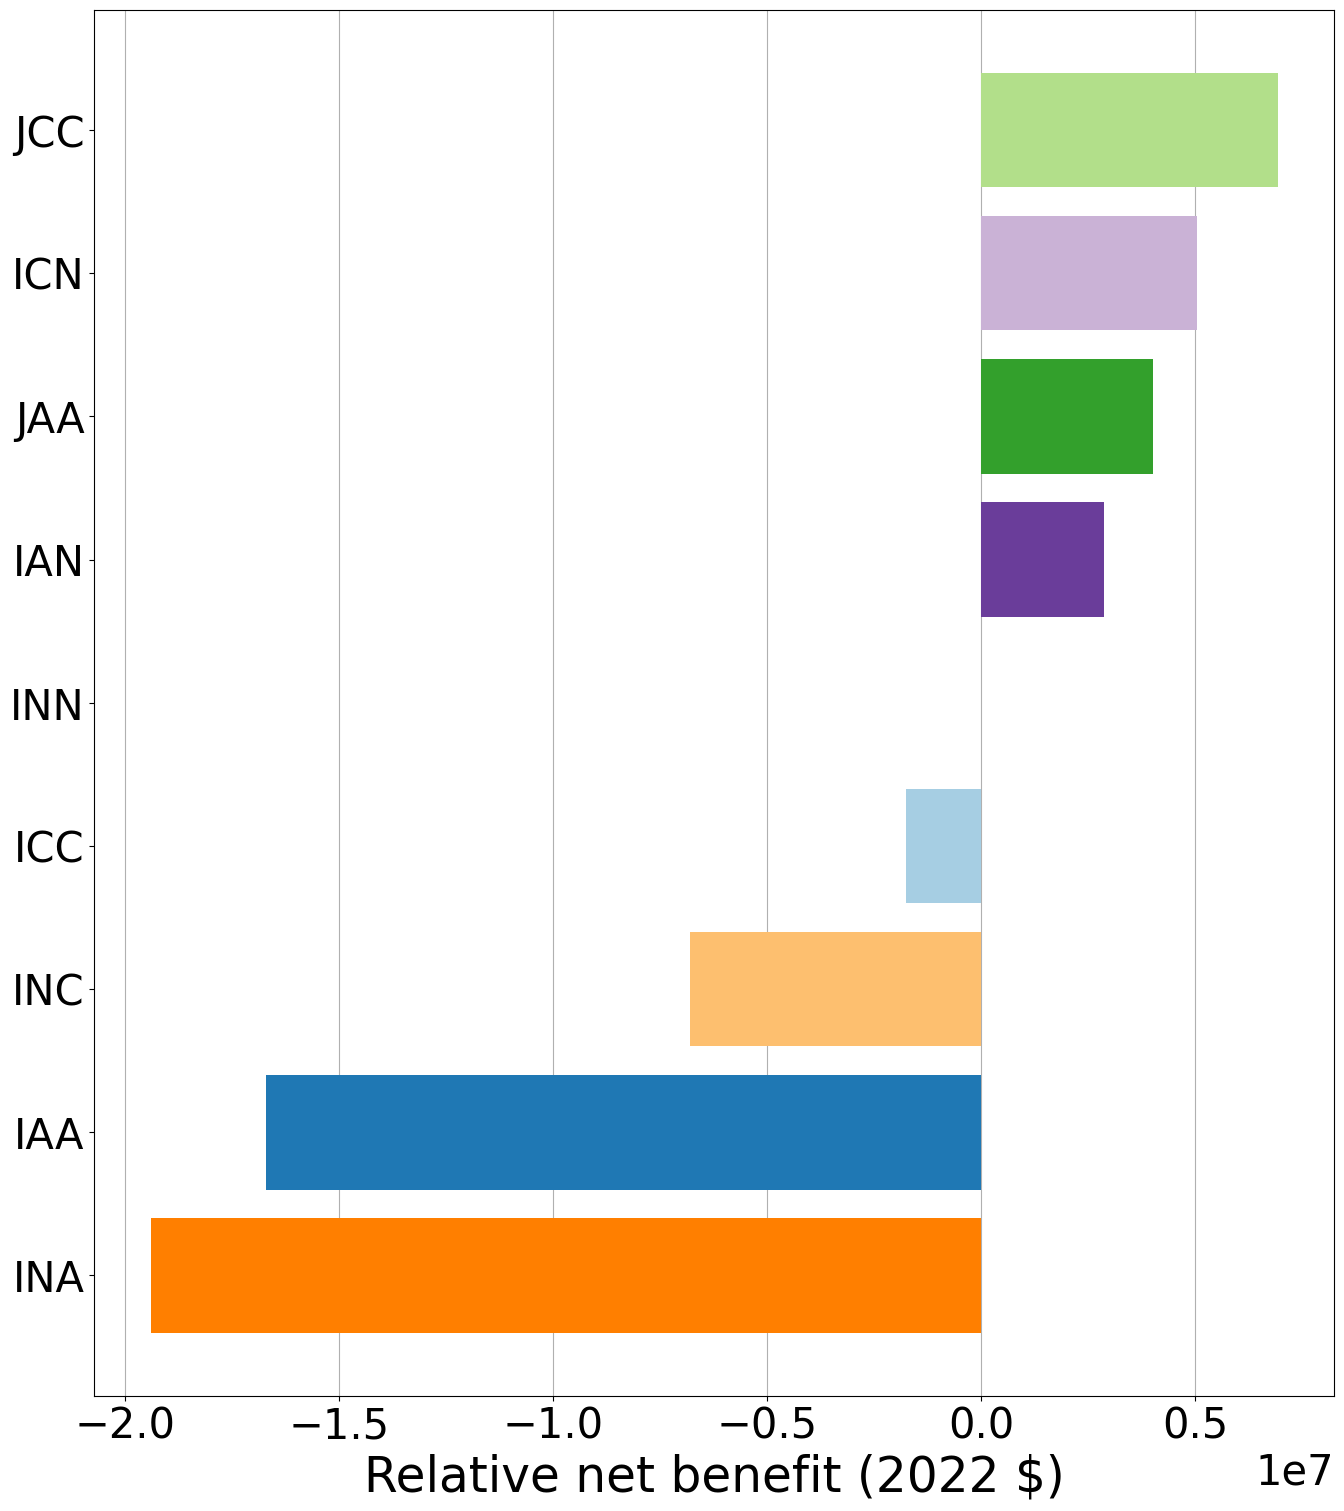

In [441]:
# Create a dictionary to map labels to colors
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_net_benefit_relative['Strategy'] = ['INN', 'INC', 'INA', 'ICN', 'IAN', 'JCC', 'ICC', 'JAA', 'IAA']
df_npv_net_benefit_relative.set_index('Strategy', inplace=True)

# Sort the DataFrame in descending order by 'net_benefit'
df_npv_net_benefit_relative_sorted = df_npv_net_benefit_relative.sort_values('net_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_net_benefit_relative_sorted.iterrows()):
    plt.barh(i, row['net_benefit'], color=strategy_colors[index], zorder=3)

plt.xlabel('Relative net benefit (2022 $)', fontsize=35)
#plt.ylabel('Strategies', fontsize=45)  # Add a label for clarity
plt.yticks(range(len(df_npv_net_benefit_relative_sorted)), labels=df_npv_net_benefit_relative_sorted.index, fontsize=30)
plt.xticks(fontsize=30)

ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()


In [319]:
# plotting graph (Ver 02)
#ax = df_npv_net_benefit_relative.T.plot(ylabel='Relative net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=300)
#plt.show()

<Axes: xlabel='Strategy', ylabel='Relative net benefit ($)'>

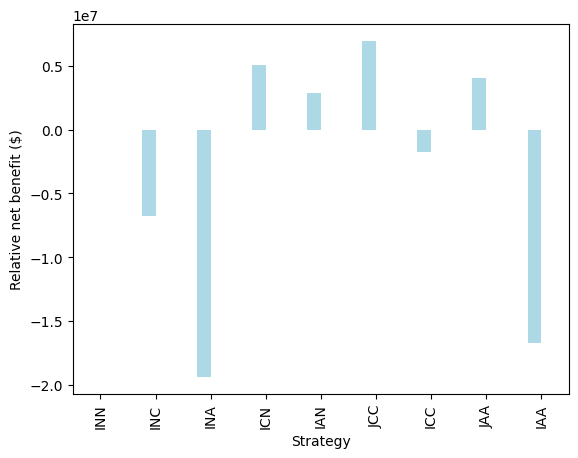

In [320]:
# plotting graph
df_npv_net_benefit_relative.plot(ylabel='Relative net benefit ($)', kind="bar", color="lightblue", legend=False)
#plt.savefig(r'../../figures/relative-npv.png', dpi=300, bbox_inches='tight')

In [321]:
df_npv_cost_loss_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['net_benefit', 'total_cost'], axis=1)

In [322]:
df_npv_cost_loss_benefit_relative

,lifecycle_infrastructure,environmental_restoration,safety,aesthetic_benefit,avoided_economic_losses,Unnamed: 8
Strategy,,,,,,
INN,0.0,0.000000e+00,0.0,0.0,0.0,NaN
INC,12100000.0,8.567154e+05,780000.0,254000.0,5930000.0,NaN
INA,29400000.0,2.539788e+06,2330000.0,718000.0,11700000.0,NaN
ICN,11900000.0,8.567154e+05,780000.0,254000.0,18300000.0,NaN
IAN,29100000.0,2.539788e+06,2330000.0,718000.0,36100000.0,NaN
JCC,15300000.0,1.713431e+06,1560000.0,509000.0,24200000.0,NaN
ICC,24000000.0,1.713431e+06,1560000.0,509000.0,24200000.0,NaN
JAA,37800000.0,5.079576e+06,4660000.0,1440000.0,47900000.0,NaN
IAA,58500000.0,5.079576e+06,4660000.0,1440000.0,47900000.0,NaN


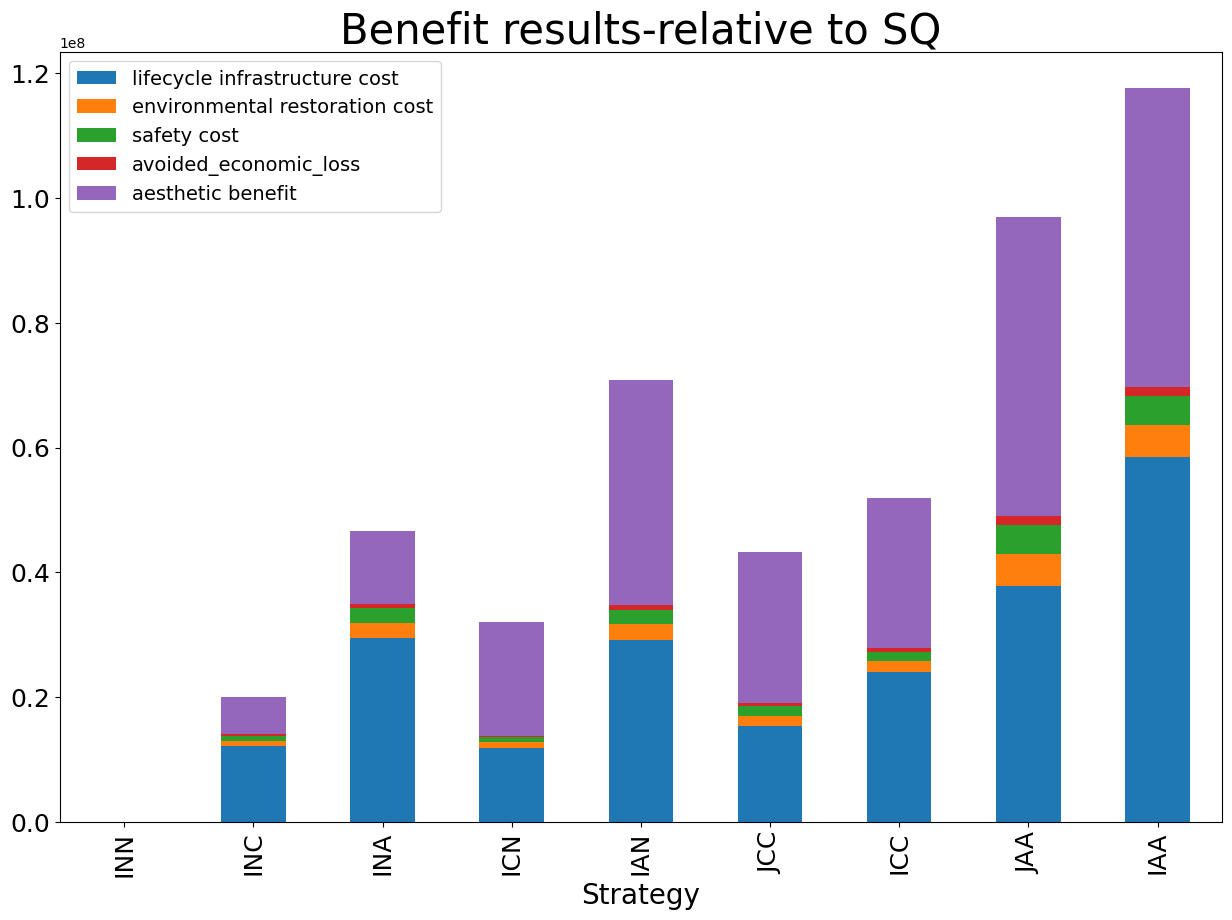

In [323]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results-relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','avoided_economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated-relative.png', dpi=300)

In [324]:
df_npv_cost_relative=df_npv_cost_loss_benefit_relative.drop(['avoided_economic_losses', 'aesthetic_benefit'], axis=1)

In [325]:
df_npv_cost_relative

,lifecycle_infrastructure,environmental_restoration,safety,Unnamed: 8
Strategy,,,,
INN,0.0,0.000000e+00,0.0,NaN
INC,12100000.0,8.567154e+05,780000.0,NaN
INA,29400000.0,2.539788e+06,2330000.0,NaN
ICN,11900000.0,8.567154e+05,780000.0,NaN
IAN,29100000.0,2.539788e+06,2330000.0,NaN
JCC,15300000.0,1.713431e+06,1560000.0,NaN
ICC,24000000.0,1.713431e+06,1560000.0,NaN
JAA,37800000.0,5.079576e+06,4660000.0,NaN
IAA,58500000.0,5.079576e+06,4660000.0,NaN


In [326]:
df_npv_cost_relative=df_npv_cost_relative.reset_index()

ConversionError: Failed to convert value(s) to axis units: Index(['INN', 'INC', 'ICN', 'JCC', 'ICC', 'INA', 'IAN', 'JAA', 'IAA'], dtype='object')

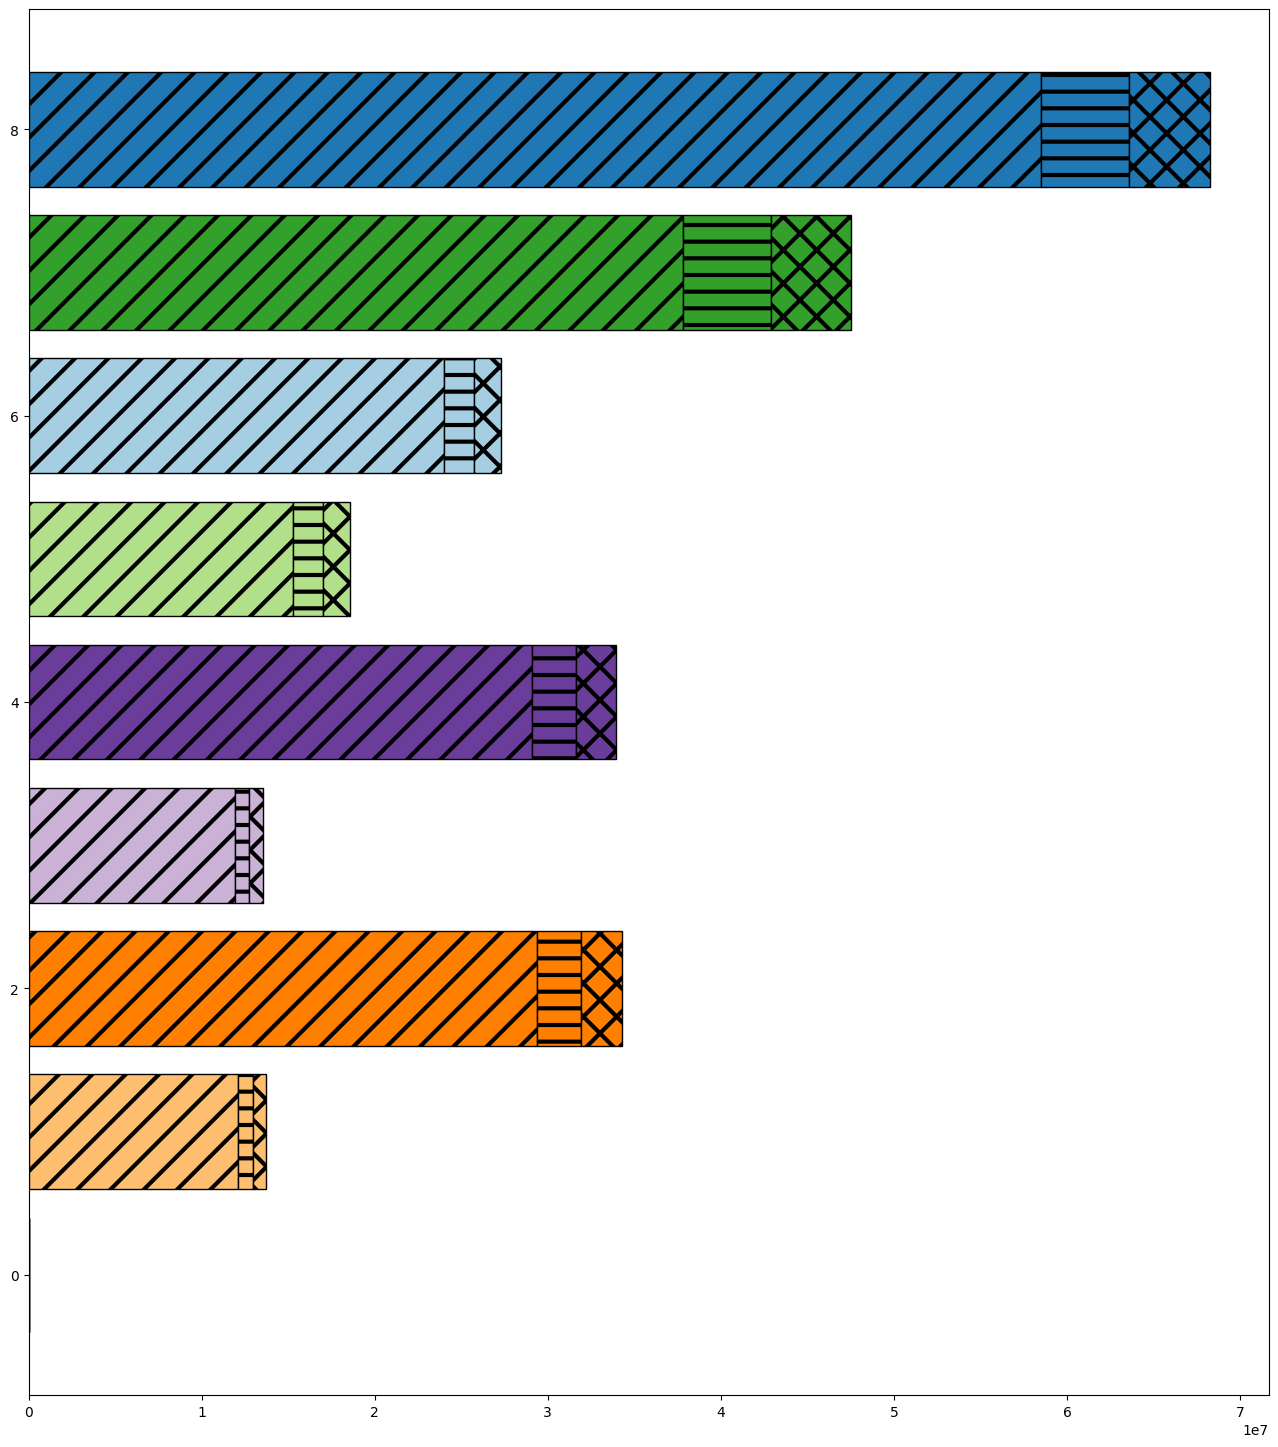

In [327]:
fig,(ax) = plt.subplots()
fig.set_size_inches(16, 18)

x= df_npv_cost_relative.index
issues_addressed = [10, 14, 0, 10, 15, 15]
issues_pending = [5, 10, 50, 2, 0, 10]
y1 = df_npv_cost_relative['lifecycle_infrastructure']
y2 = df_npv_cost_relative['environmental_restoration']
y3 = df_npv_cost_relative['safety']

mpl.rcParams['hatch.linewidth'] = 3.0 


b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black',hatch='/', zorder=3)

b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='-', zorder=3)

b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='x', zorder=3)

plt.yticks(df_npv_cost.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])

a_val = 0.3

circ1 = mpatches.Patch( alpha=a_val,hatch=r'/',label='Lifecycle infrastructure')
circ2= mpatches.Patch( alpha=a_val,hatch='-',label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val,hatch='x',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=50)
plt.tight_layout()
plt.xlabel("Relative Cost (2022 $)", fontsize=55)

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=400, bbox_inches='tight')


#plt.legend([b1, b2], ["Completed", "Pending"], title="Issues", loc="upper right")

plt.show()

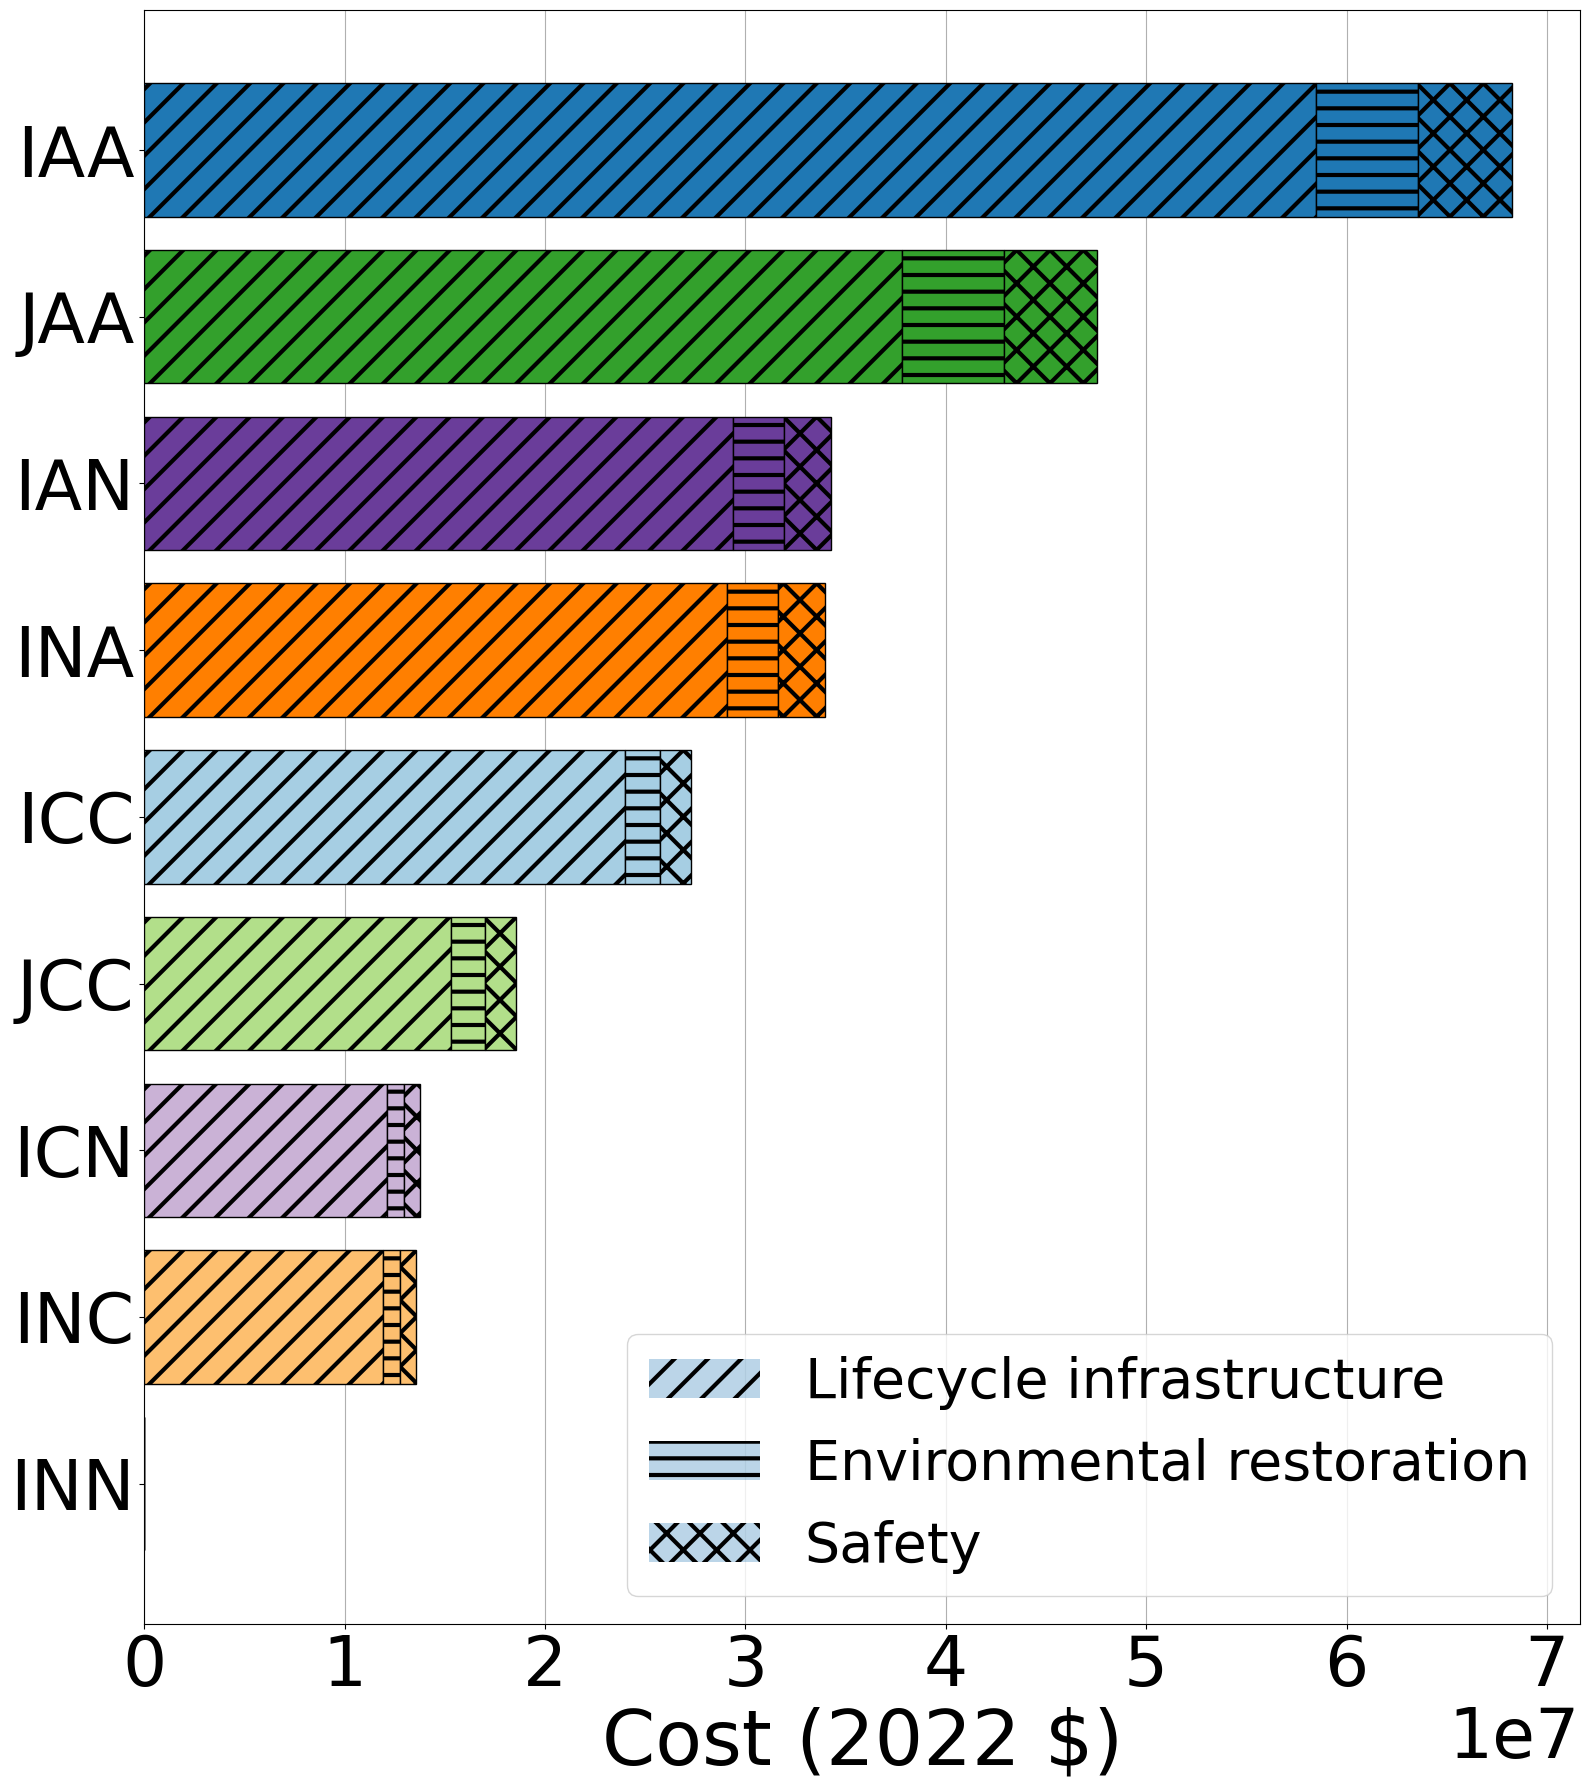

In [328]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming df_npv_cost_relative is already defined and loaded with data
# Calculate the total for each strategy
total_cost = df_npv_cost_relative['lifecycle_infrastructure'] + df_npv_cost_relative['environmental_restoration'] + df_npv_cost_relative['safety']

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost_relative.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost_relative.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost_relative.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots(figsize=(16, 18))

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

#['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
#['#FB9A99','#FDBF6F','#6A3D9A','#FF7F00','#A6CEE3','#B2DF8A','#CAB2D6','#33A02C','#1F78B4']

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1,             color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1,    color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the original names, matched with the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), [df_npv_cost_relative.index[i] for i in sorted_indices_reversed], fontsize=50)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)
plt.yticks(df_npv_cost_relative.index, labels=['INN','INC','ICN','JCC','ICC','INA','IAN','JAA','IAA'])


# Set labels and grid
plt.xlabel("Cost (2022 $)", fontsize=55)
plt.xticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


In [329]:
### Pareto plot



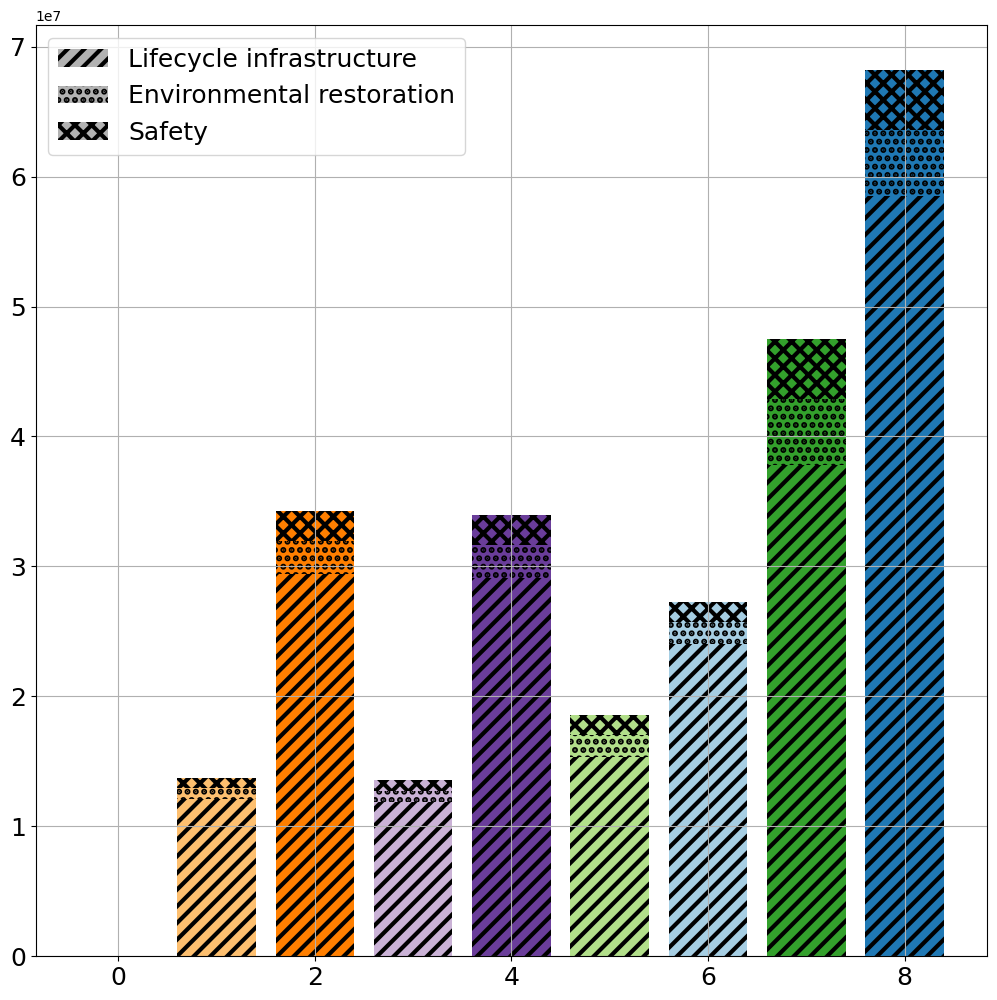

In [330]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 10)

x= df_npv_cost_relative.index
y1 = df_npv_cost_relative['lifecycle_infrastructure']
y2 = df_npv_cost_relative['environmental_restoration']
y3 = df_npv_cost_relative['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'], hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'], hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

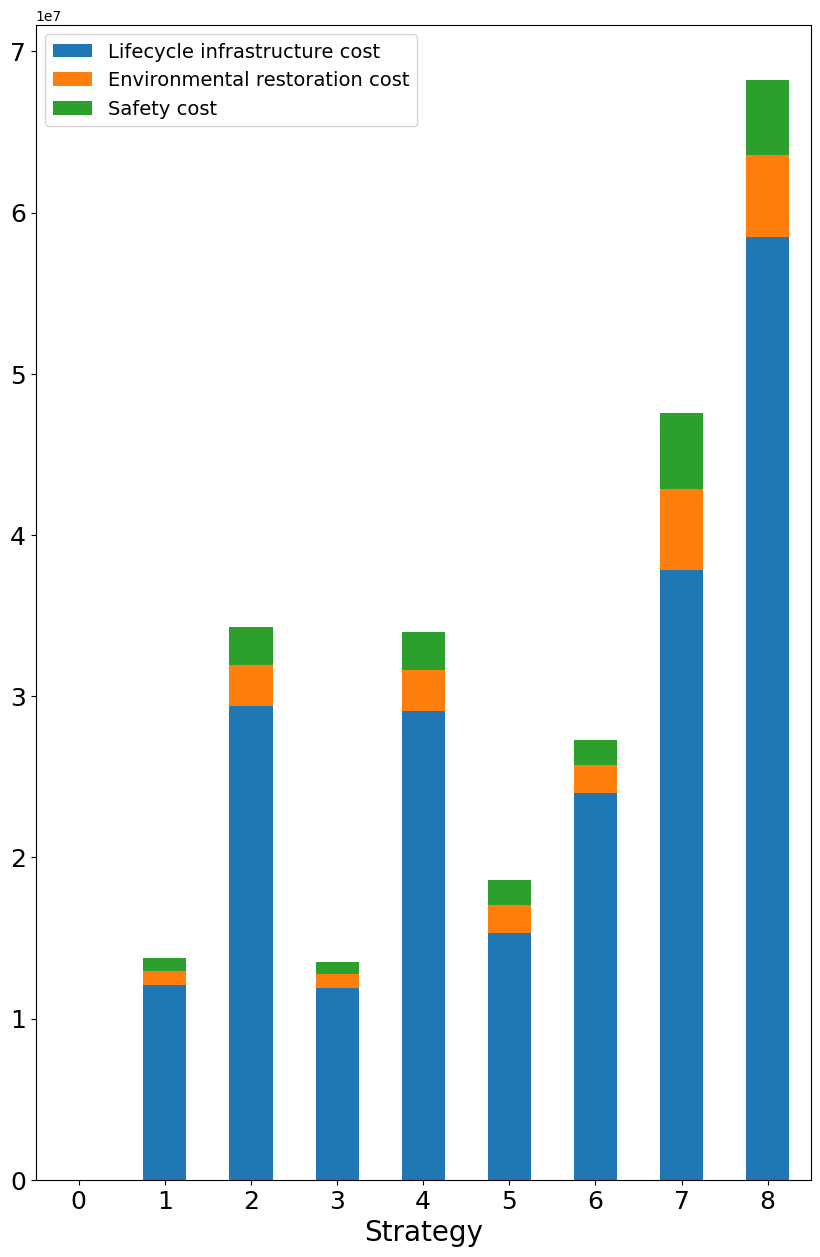

In [331]:
# plotting cost results integerated for broadband and electric
df_npv_cost_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)

In [332]:
df_npv_loss_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [333]:
df_npv_loss_relative

,avoided_economic_losses,Unnamed: 8
Strategy,,
INN,0.0,NaN
INC,5930000.0,NaN
INA,11700000.0,NaN
ICN,18300000.0,NaN
IAN,36100000.0,NaN
JCC,24200000.0,NaN
ICC,24200000.0,NaN
JAA,47900000.0,NaN
IAA,47900000.0,NaN


In [334]:
df_npv_loss_relative=df_npv_loss_relative.reset_index()

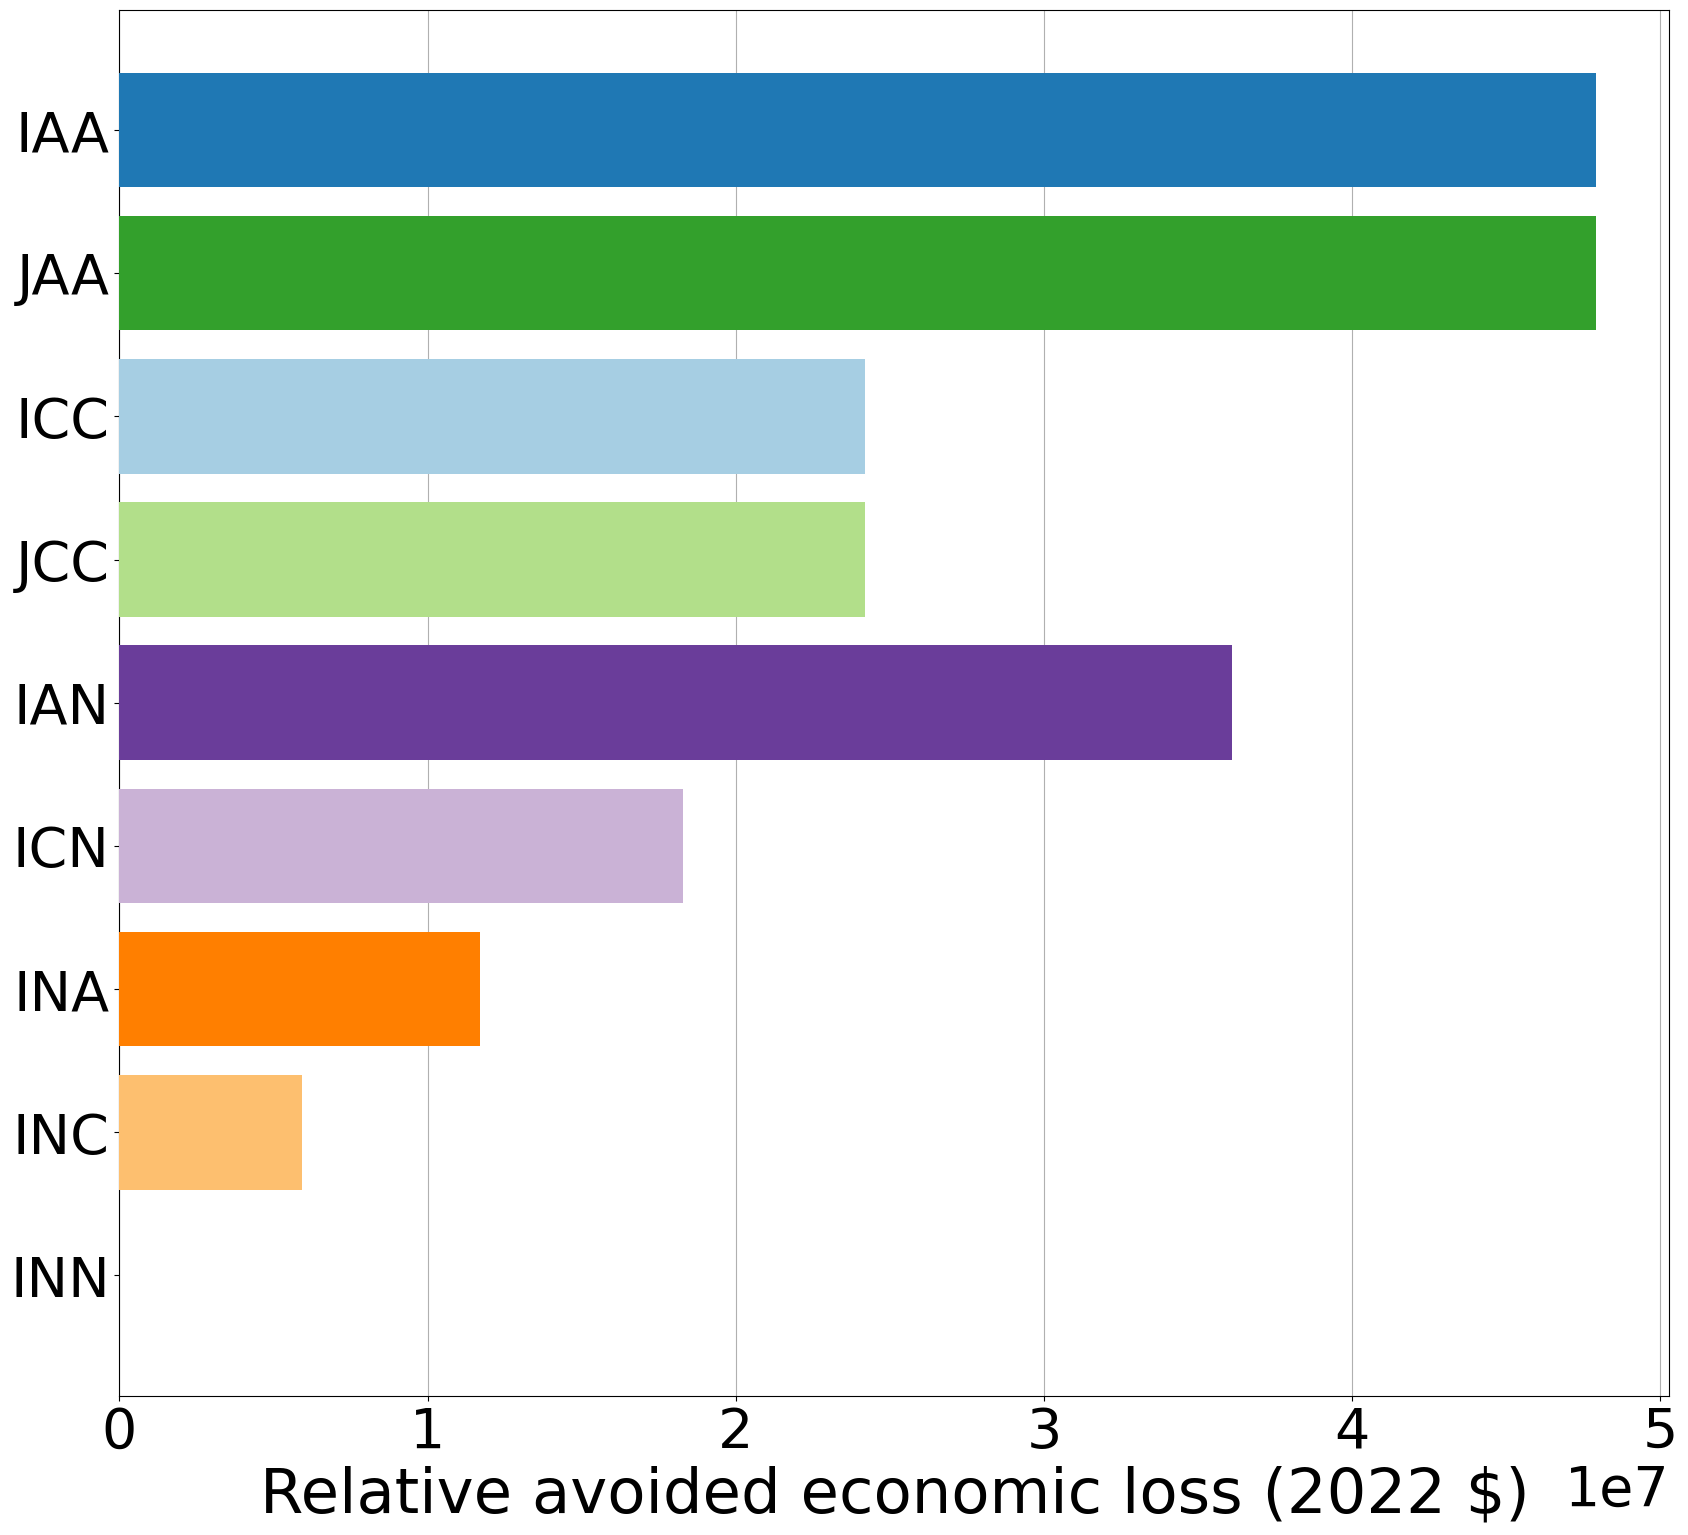

In [335]:
# Using plt to provide horizontal bar plots for net present values using color codes
#fig.set_size_inches(10,15)
fig, ax = plt.subplots(figsize=(20,18))

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss_relative.loc[i,"avoided_economic_losses"],color=row, zorder=3)
plt.xlabel ('Relative avoided economic loss (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [336]:
# plotting loss results integerated for broadband and electric
#ax=df_npv_loss_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.yticks(fontsize=18)
#plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

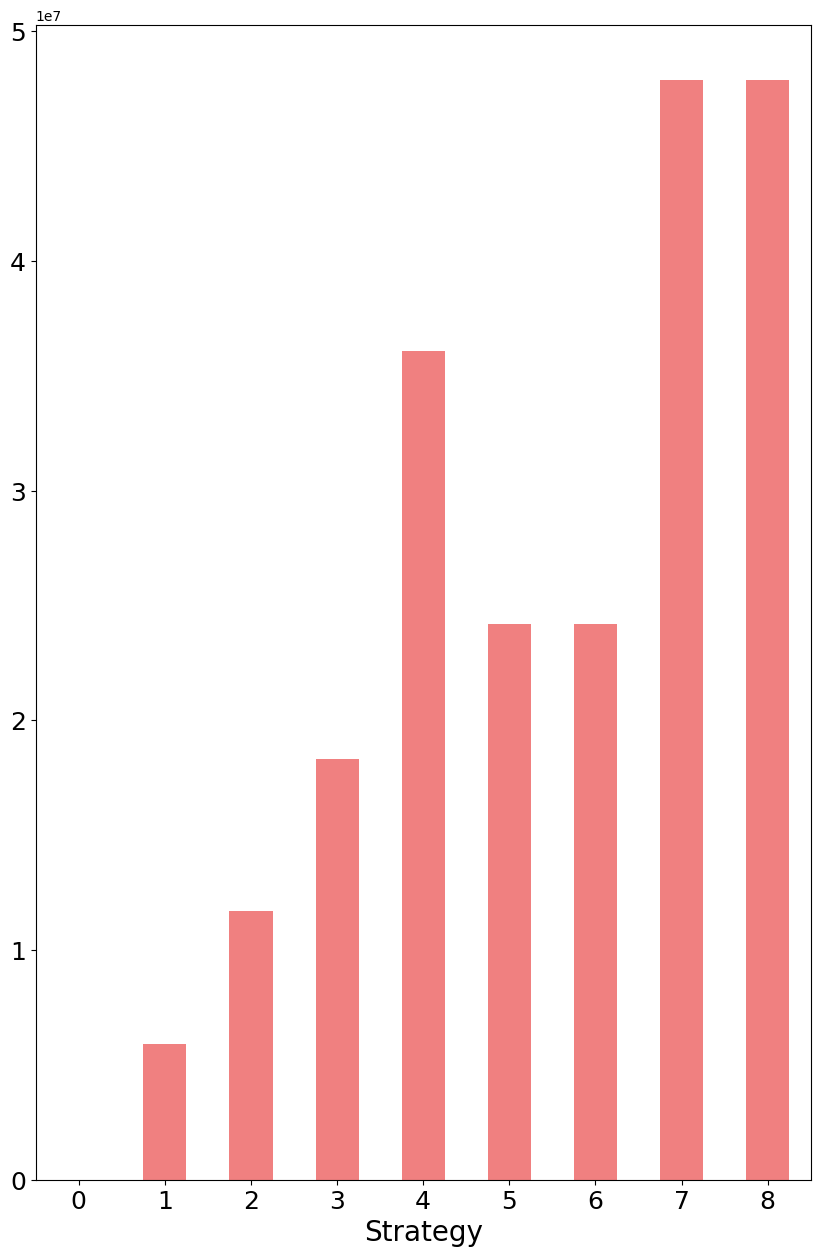

In [337]:
# plotting loss results integerated for broadband and electric
df_npv_loss_relative.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

In [338]:
df_npv_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'avoided_economic_losses'], axis=1)

In [339]:
#df_npv_benefit_relative=df_npv_benefit_relative.reset_index()

In [340]:
df_npv_benefit_relative = df_npv_benefit_relative.reset_index()
df_npv_benefit_relative

,Strategy,aesthetic_benefit,Unnamed: 8
0,INN,0.0,NaN
1,INC,254000.0,NaN
2,INA,718000.0,NaN
3,ICN,254000.0,NaN
4,IAN,718000.0,NaN
5,JCC,509000.0,NaN
6,ICC,509000.0,NaN
7,JAA,1440000.0,NaN
8,IAA,1440000.0,NaN


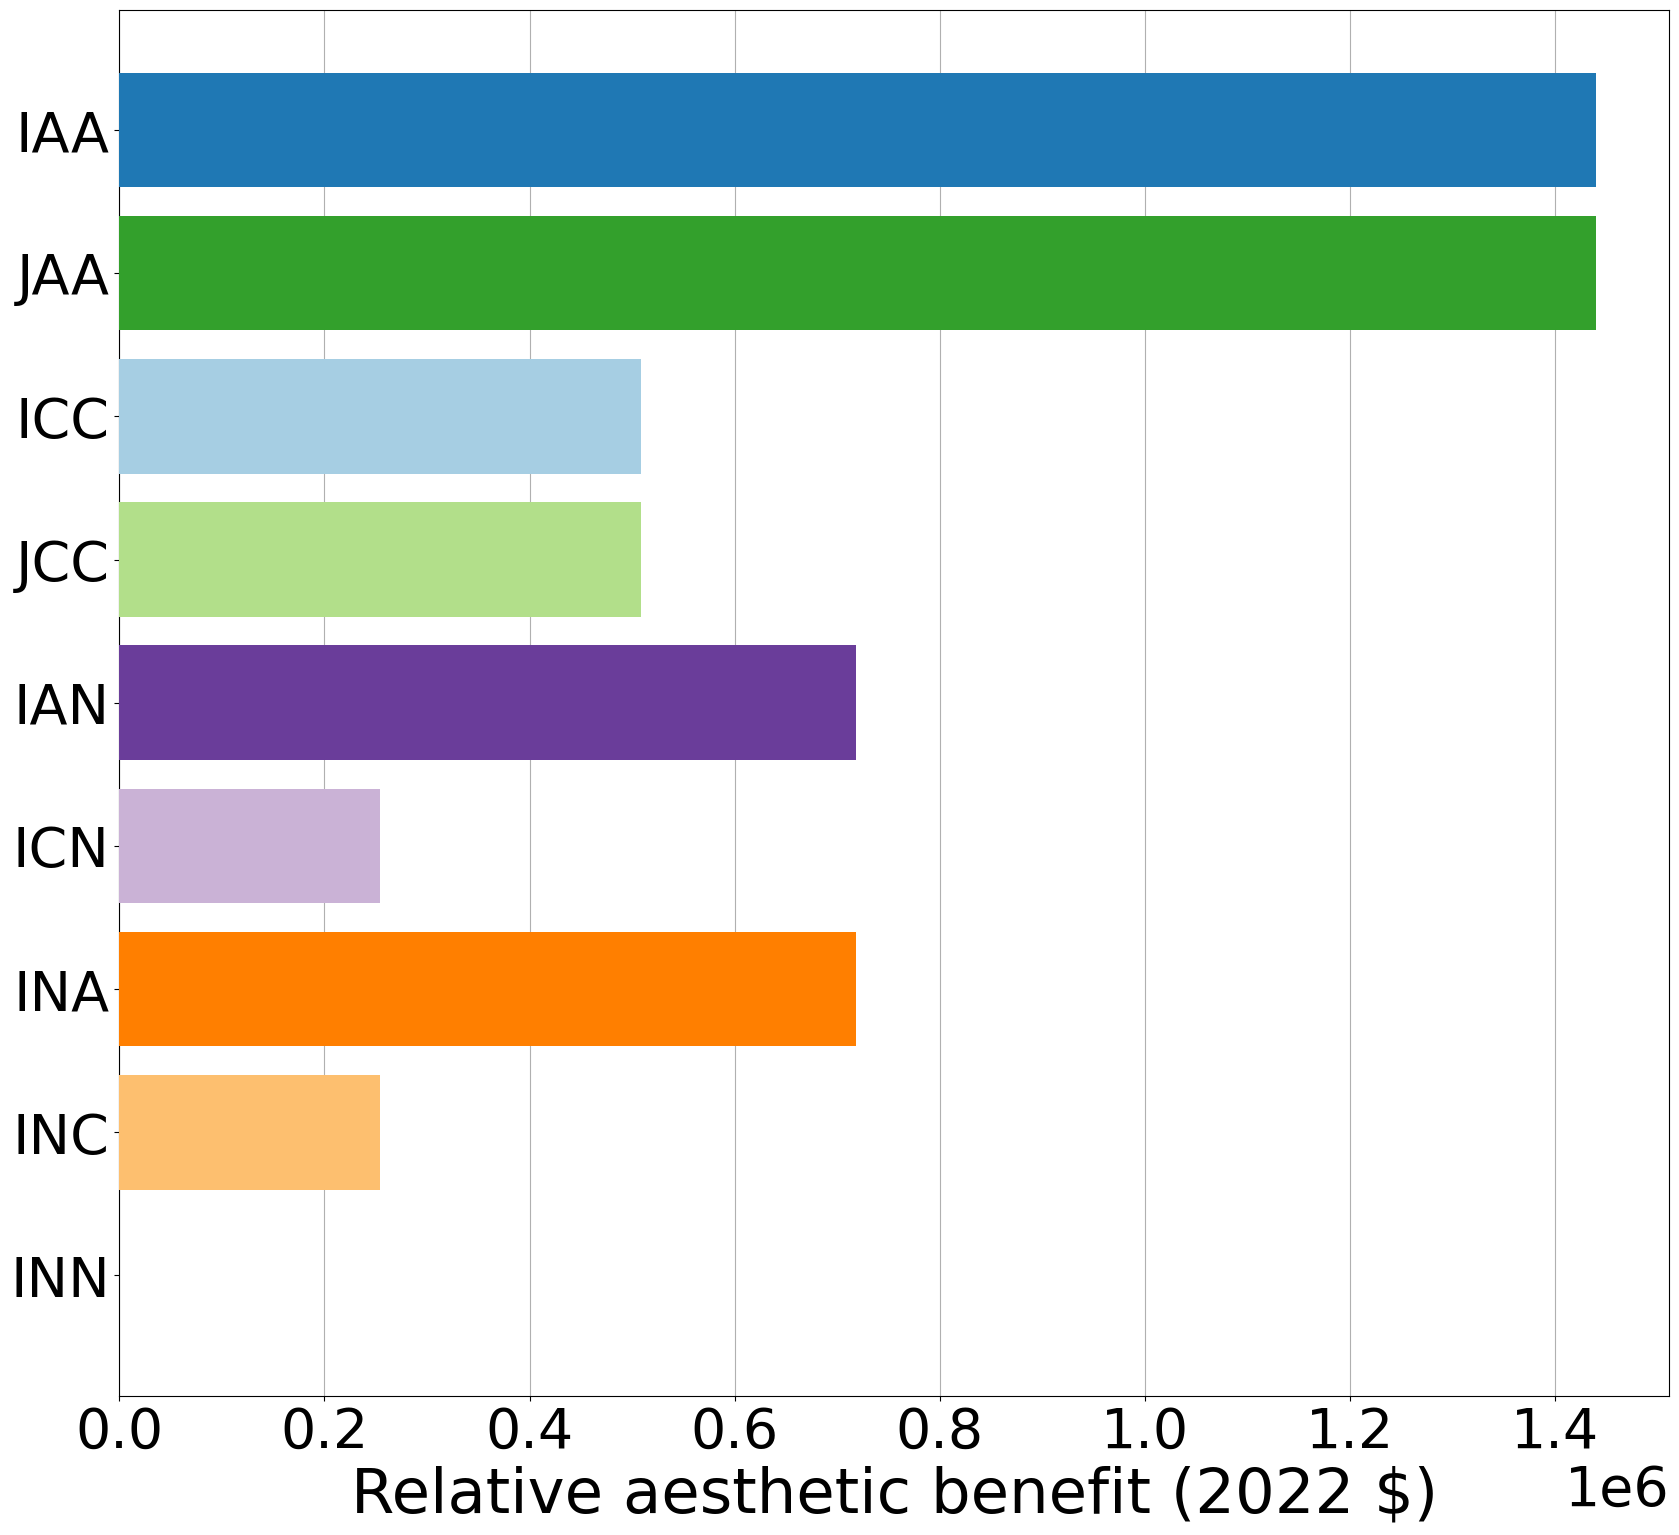

In [341]:
# Using plt to provide horizontal bar plots for net present values using color codes
#fig.set_size_inches(10,15)
fig, ax = plt.subplots(figsize=(20,18))

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit_relative.loc[i,"aesthetic_benefit"],color=row, zorder=3)
plt.xlabel ('Relative aesthetic benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [342]:
# plotting benefit results integerated for broadband and electric
#ax=df_npv_benefit_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
##plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=26)
#plt.yticks(fontsize=26)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

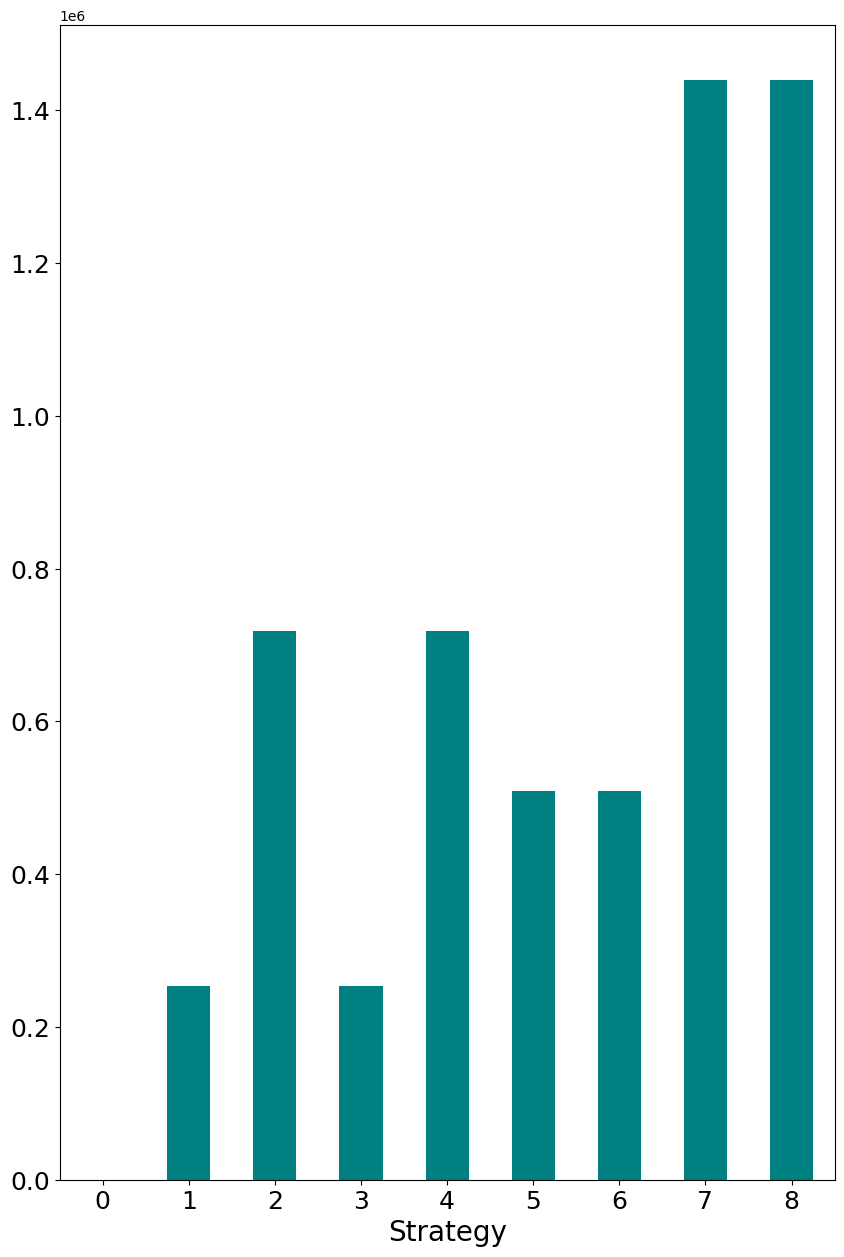

In [343]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit_relative.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)

In [344]:
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,avoided_economic_losses,net_benefit
Strategy,,,,,,,
INN,2390000.0,0.000000e+00,3030000.0,5420000.0,0.000000e+00,0.0,-5420000.0
INC,14500000.0,8.567154e+05,3810000.0,18400000.0,2.543672e+05,5930000.0,-12200000.0
INA,31800000.0,2.539788e+06,5360000.0,37300000.0,7.182719e+05,11700000.0,-24900000.0
ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,2.543672e+05,18300000.0,-368000.0
IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,7.182719e+05,36100000.0,-2550000.0
JCC,17700000.0,1.713431e+06,4590000.0,23200000.0,5.087344e+05,24200000.0,1510000.0
ICC,26400000.0,1.713431e+06,4590000.0,31900000.0,5.087344e+05,24200000.0,-7190000.0
JAA,40200000.0,5.079576e+06,7690000.0,50700000.0,1.436544e+06,47900000.0,-1410000.0
IAA,60900000.0,5.079576e+06,7690000.0,71400000.0,1.436544e+06,47900000.0,-22100000.0


In [345]:
df_npv_cost_loss_benefit['benefit_loss']=df_npv_cost_loss_benefit['aesthetic_benefit']+df_npv_cost_loss_benefit['avoided_economic_losses']
df_npv_cost_loss_benefit['cost_benefit_ratio']=df_npv_cost_loss_benefit['total_cost']/df_npv_cost_loss_benefit['benefit_loss']
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,avoided_economic_losses,net_benefit,benefit_loss,cost_benefit_ratio
Strategy,,,,,,,,,
INN,2390000.0,0.000000e+00,3030000.0,5420000.0,0.000000e+00,0.0,-5420000.0,0.000000e+00,inf
INC,14500000.0,8.567154e+05,3810000.0,18400000.0,2.543672e+05,5930000.0,-12200000.0,6.184367e+06,2.975244
INA,31800000.0,2.539788e+06,5360000.0,37300000.0,7.182719e+05,11700000.0,-24900000.0,1.241827e+07,3.003639
ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,2.543672e+05,18300000.0,-368000.0,1.855437e+07,1.018628
IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,7.182719e+05,36100000.0,-2550000.0,3.681827e+07,1.070121
JCC,17700000.0,1.713431e+06,4590000.0,23200000.0,5.087344e+05,24200000.0,1510000.0,2.470873e+07,0.938939
ICC,26400000.0,1.713431e+06,4590000.0,31900000.0,5.087344e+05,24200000.0,-7190000.0,2.470873e+07,1.291041
JAA,40200000.0,5.079576e+06,7690000.0,50700000.0,1.436544e+06,47900000.0,-1410000.0,4.933654e+07,1.027636
IAA,60900000.0,5.079576e+06,7690000.0,71400000.0,1.436544e+06,47900000.0,-22100000.0,4.933654e+07,1.447203


In [346]:
df_pareto_plots=df_npv_cost_loss_benefit.copy()

In [347]:
df_pareto_plots=df_pareto_plots.loc[df_pareto_plots.index!='INN']
df_pareto_plots

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,avoided_economic_losses,net_benefit,benefit_loss,cost_benefit_ratio
Strategy,,,,,,,,,
INC,14500000.0,8.567154e+05,3810000.0,18400000.0,2.543672e+05,5930000.0,-12200000.0,6.184367e+06,2.975244
INA,31800000.0,2.539788e+06,5360000.0,37300000.0,7.182719e+05,11700000.0,-24900000.0,1.241827e+07,3.003639
ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,2.543672e+05,18300000.0,-368000.0,1.855437e+07,1.018628
IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,7.182719e+05,36100000.0,-2550000.0,3.681827e+07,1.070121
JCC,17700000.0,1.713431e+06,4590000.0,23200000.0,5.087344e+05,24200000.0,1510000.0,2.470873e+07,0.938939
ICC,26400000.0,1.713431e+06,4590000.0,31900000.0,5.087344e+05,24200000.0,-7190000.0,2.470873e+07,1.291041
JAA,40200000.0,5.079576e+06,7690000.0,50700000.0,1.436544e+06,47900000.0,-1410000.0,4.933654e+07,1.027636
IAA,60900000.0,5.079576e+06,7690000.0,71400000.0,1.436544e+06,47900000.0,-22100000.0,4.933654e+07,1.447203


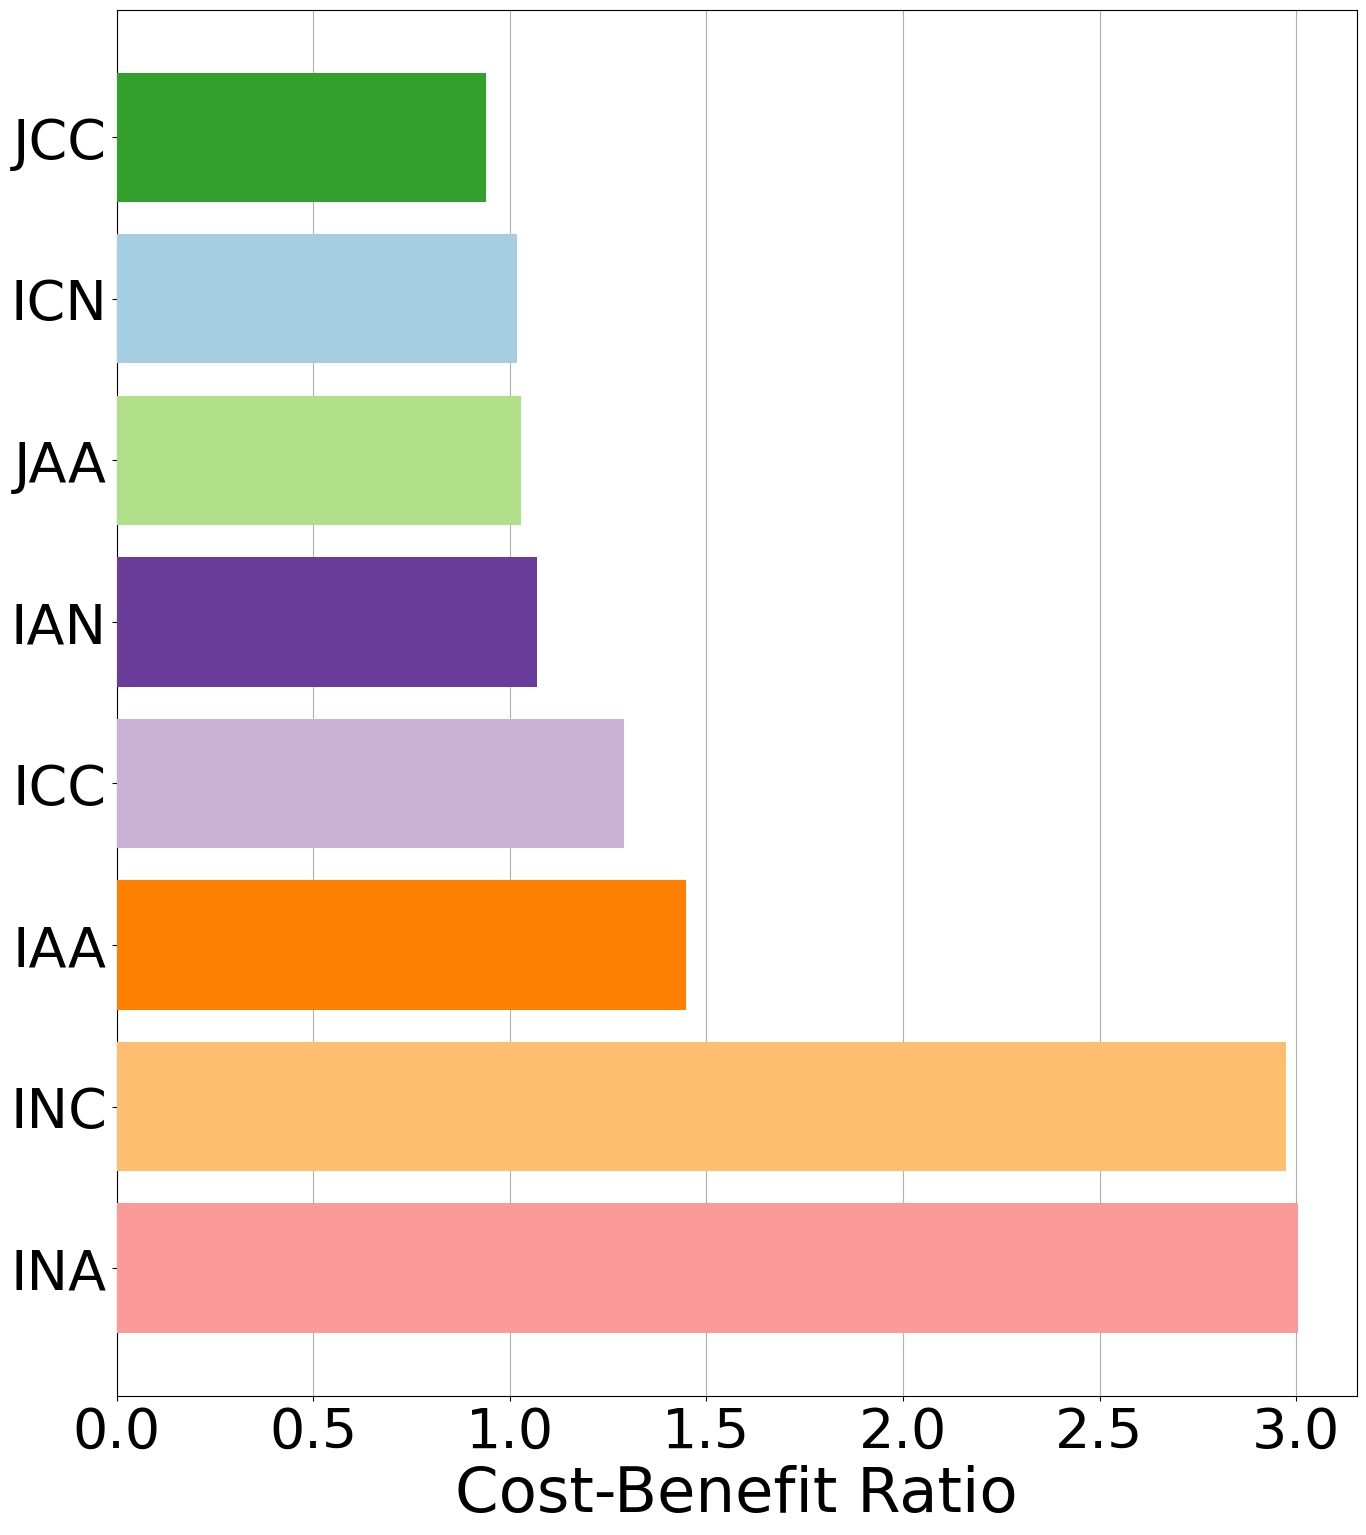

In [443]:
# Sorting the DataFrame based on 'cost_benefit_ratio'
df_pareto_sorted = df_pareto_plots.sort_values(by='cost_benefit_ratio', ascending=False)

# Colors as specified by user
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

# Creating the Pareto plot
fig, ax = plt.subplots(figsize=(16, 18))
bars = ax.barh(df_pareto_sorted.index, df_pareto_sorted['cost_benefit_ratio'], color=my_colors[:len(df_pareto_sorted)], zorder=3)
ax.set_xlabel('Cost-Benefit Ratio', fontsize=45)
#ax.set_xticks(fontsize=40)
#ax.set_yticks(fontsize=40)
ax.tick_params(axis='x', labelsize=40)  
ax.tick_params(axis='y', labelsize=40)  
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.show()

In [349]:
df_pareto_sorted['log_of_cost_benefit_ratio']=np.log(df_pareto_sorted['cost_benefit_ratio'])
df_pareto_sorted

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,avoided_economic_losses,net_benefit,benefit_loss,cost_benefit_ratio,log_of_cost_benefit_ratio
Strategy,,,,,,,,,,
INA,31800000.0,2.539788e+06,5360000.0,37300000.0,7.182719e+05,11700000.0,-24900000.0,1.241827e+07,3.003639,1.099824
INC,14500000.0,8.567154e+05,3810000.0,18400000.0,2.543672e+05,5930000.0,-12200000.0,6.184367e+06,2.975244,1.090326
IAA,60900000.0,5.079576e+06,7690000.0,71400000.0,1.436544e+06,47900000.0,-22100000.0,4.933654e+07,1.447203,0.369633
ICC,26400000.0,1.713431e+06,4590000.0,31900000.0,5.087344e+05,24200000.0,-7190000.0,2.470873e+07,1.291041,0.255449
IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,7.182719e+05,36100000.0,-2550000.0,3.681827e+07,1.070121,0.067772
JAA,40200000.0,5.079576e+06,7690000.0,50700000.0,1.436544e+06,47900000.0,-1410000.0,4.933654e+07,1.027636,0.027261
ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,2.543672e+05,18300000.0,-368000.0,1.855437e+07,1.018628,0.018457
JCC,17700000.0,1.713431e+06,4590000.0,23200000.0,5.087344e+05,24200000.0,1510000.0,2.470873e+07,0.938939,-0.063005


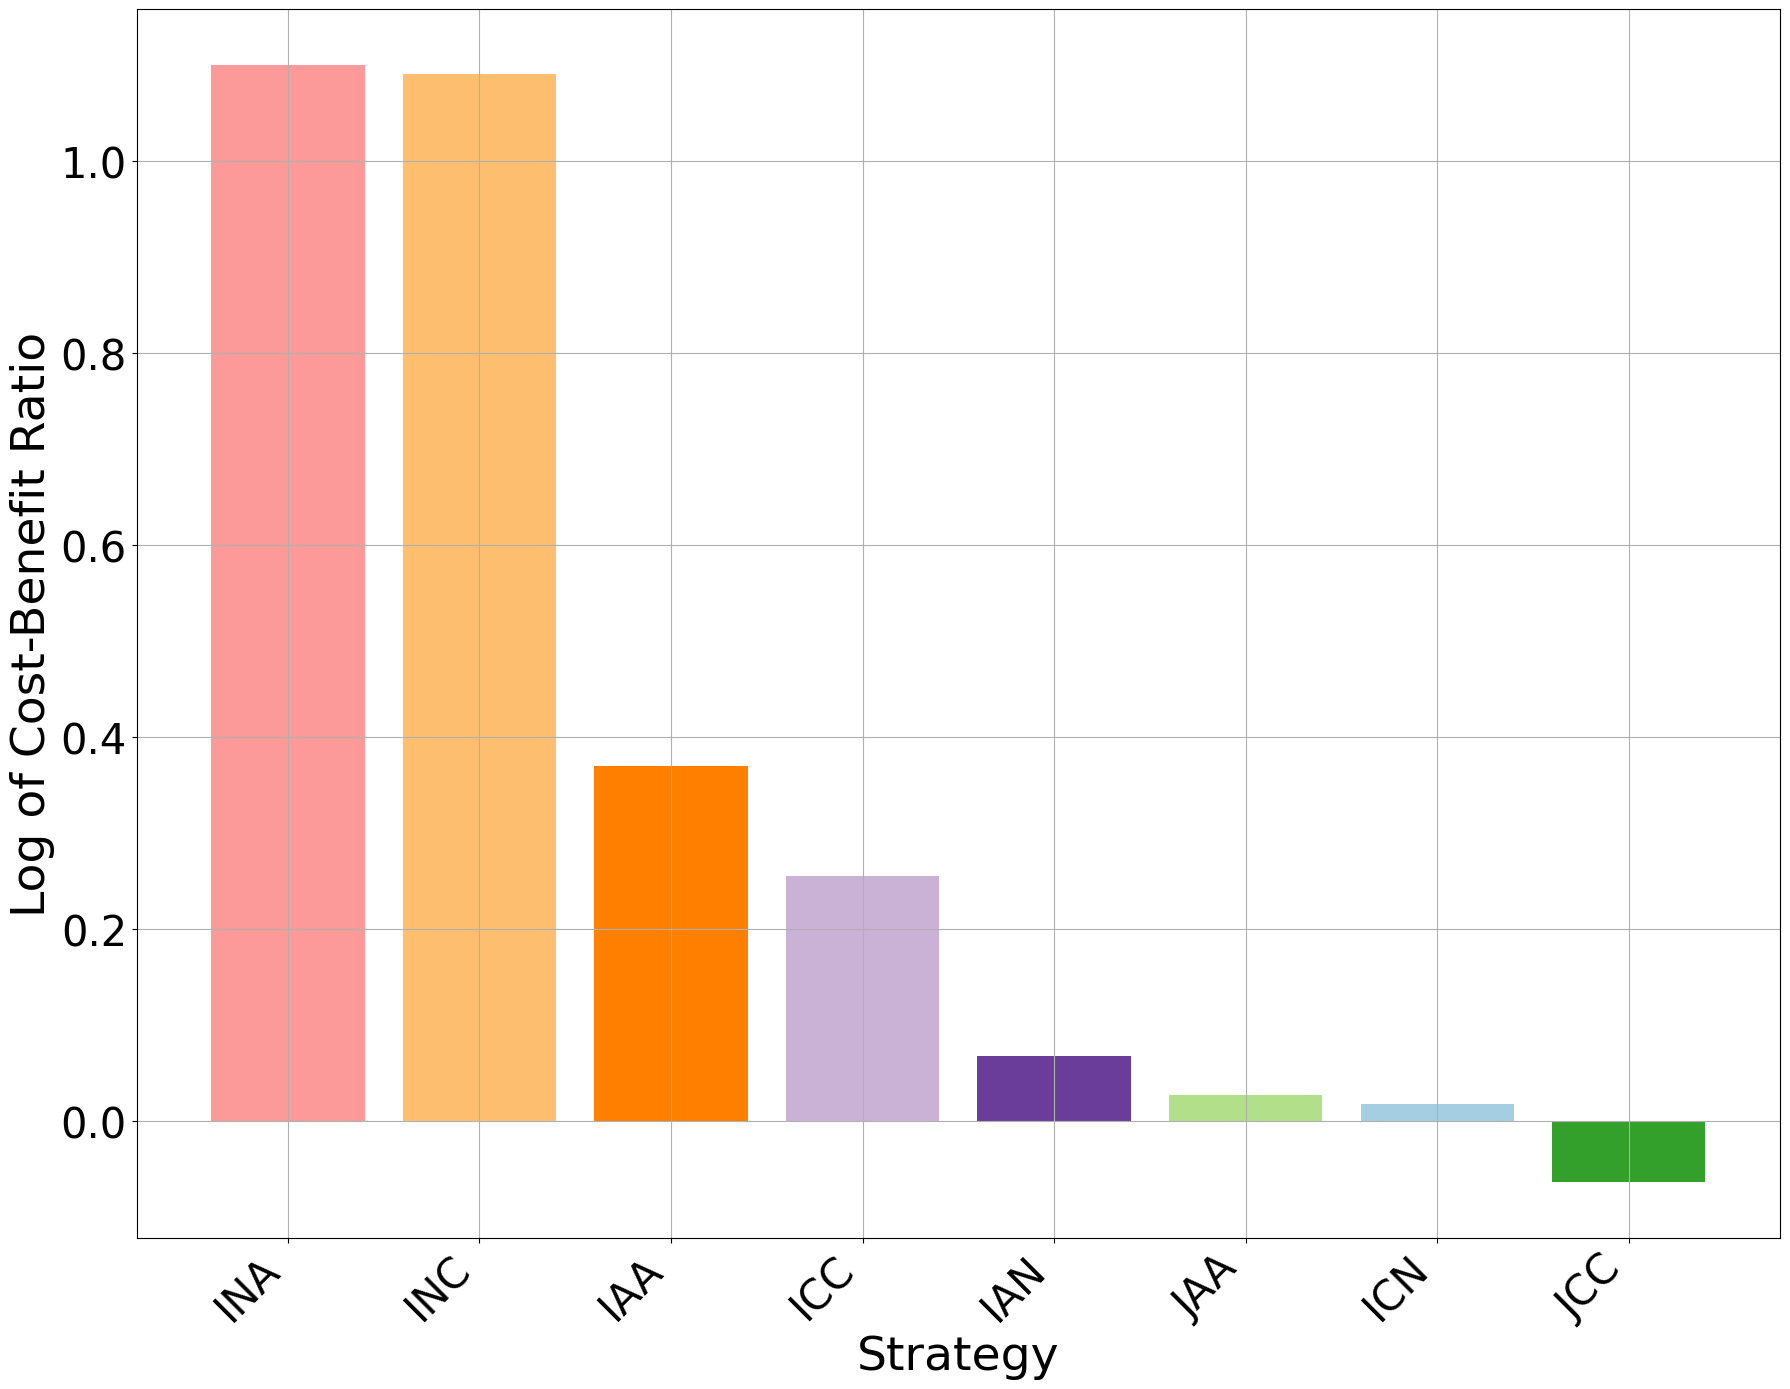

In [350]:
# Calculate cumulative percentage
df_pareto_sorted['cumulative_pct'] = df_pareto_sorted['log_of_cost_benefit_ratio'].cumsum() / df_pareto_sorted['log_of_cost_benefit_ratio'].sum() * 100

# Plotting
fig, ax = plt.subplots(figsize=(18, 14))
bar_positions = range(len(df_pareto_sorted))
bars = ax.bar(bar_positions, df_pareto_sorted['log_of_cost_benefit_ratio'], color=my_colors[:len(df_pareto_sorted)])

# Set strategies as x-ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_pareto_sorted.index, rotation=45, ha="right")

# Plot the cumulative percentage line
# Note: We need to ensure the line starts at the first bar and ends at the last one accurately
#ax2 = ax.twinx()
#ax2.plot(bar_positions, df_pareto_sorted['cumulative_pct'], color='black', marker='o', linestyle='-', linewidth=2, ms=10)

# Labeling
ax.set_xlabel('Strategy', fontsize=34)
ax.set_ylabel('Log of Cost-Benefit Ratio', fontsize=34)
#ax2.set_ylabel('Cumulative Percentage (%)', fontsize=34)
ax.tick_params(axis='x', labelsize=30)  
ax.tick_params(axis='y', labelsize=30)  
#ax2.tick_params(axis='y', labelsize=30)  

plt.grid(True)
plt.tight_layout()
plt.show()


In [351]:
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,avoided_economic_losses,net_benefit,benefit_loss,cost_benefit_ratio
Strategy,,,,,,,,,
INN,2390000.0,0.000000e+00,3030000.0,5420000.0,0.000000e+00,0.0,-5420000.0,0.000000e+00,inf
INC,14500000.0,8.567154e+05,3810000.0,18400000.0,2.543672e+05,5930000.0,-12200000.0,6.184367e+06,2.975244
INA,31800000.0,2.539788e+06,5360000.0,37300000.0,7.182719e+05,11700000.0,-24900000.0,1.241827e+07,3.003639
ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,2.543672e+05,18300000.0,-368000.0,1.855437e+07,1.018628
IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,7.182719e+05,36100000.0,-2550000.0,3.681827e+07,1.070121
JCC,17700000.0,1.713431e+06,4590000.0,23200000.0,5.087344e+05,24200000.0,1510000.0,2.470873e+07,0.938939
ICC,26400000.0,1.713431e+06,4590000.0,31900000.0,5.087344e+05,24200000.0,-7190000.0,2.470873e+07,1.291041
JAA,40200000.0,5.079576e+06,7690000.0,50700000.0,1.436544e+06,47900000.0,-1410000.0,4.933654e+07,1.027636
IAA,60900000.0,5.079576e+06,7690000.0,71400000.0,1.436544e+06,47900000.0,-22100000.0,4.933654e+07,1.447203


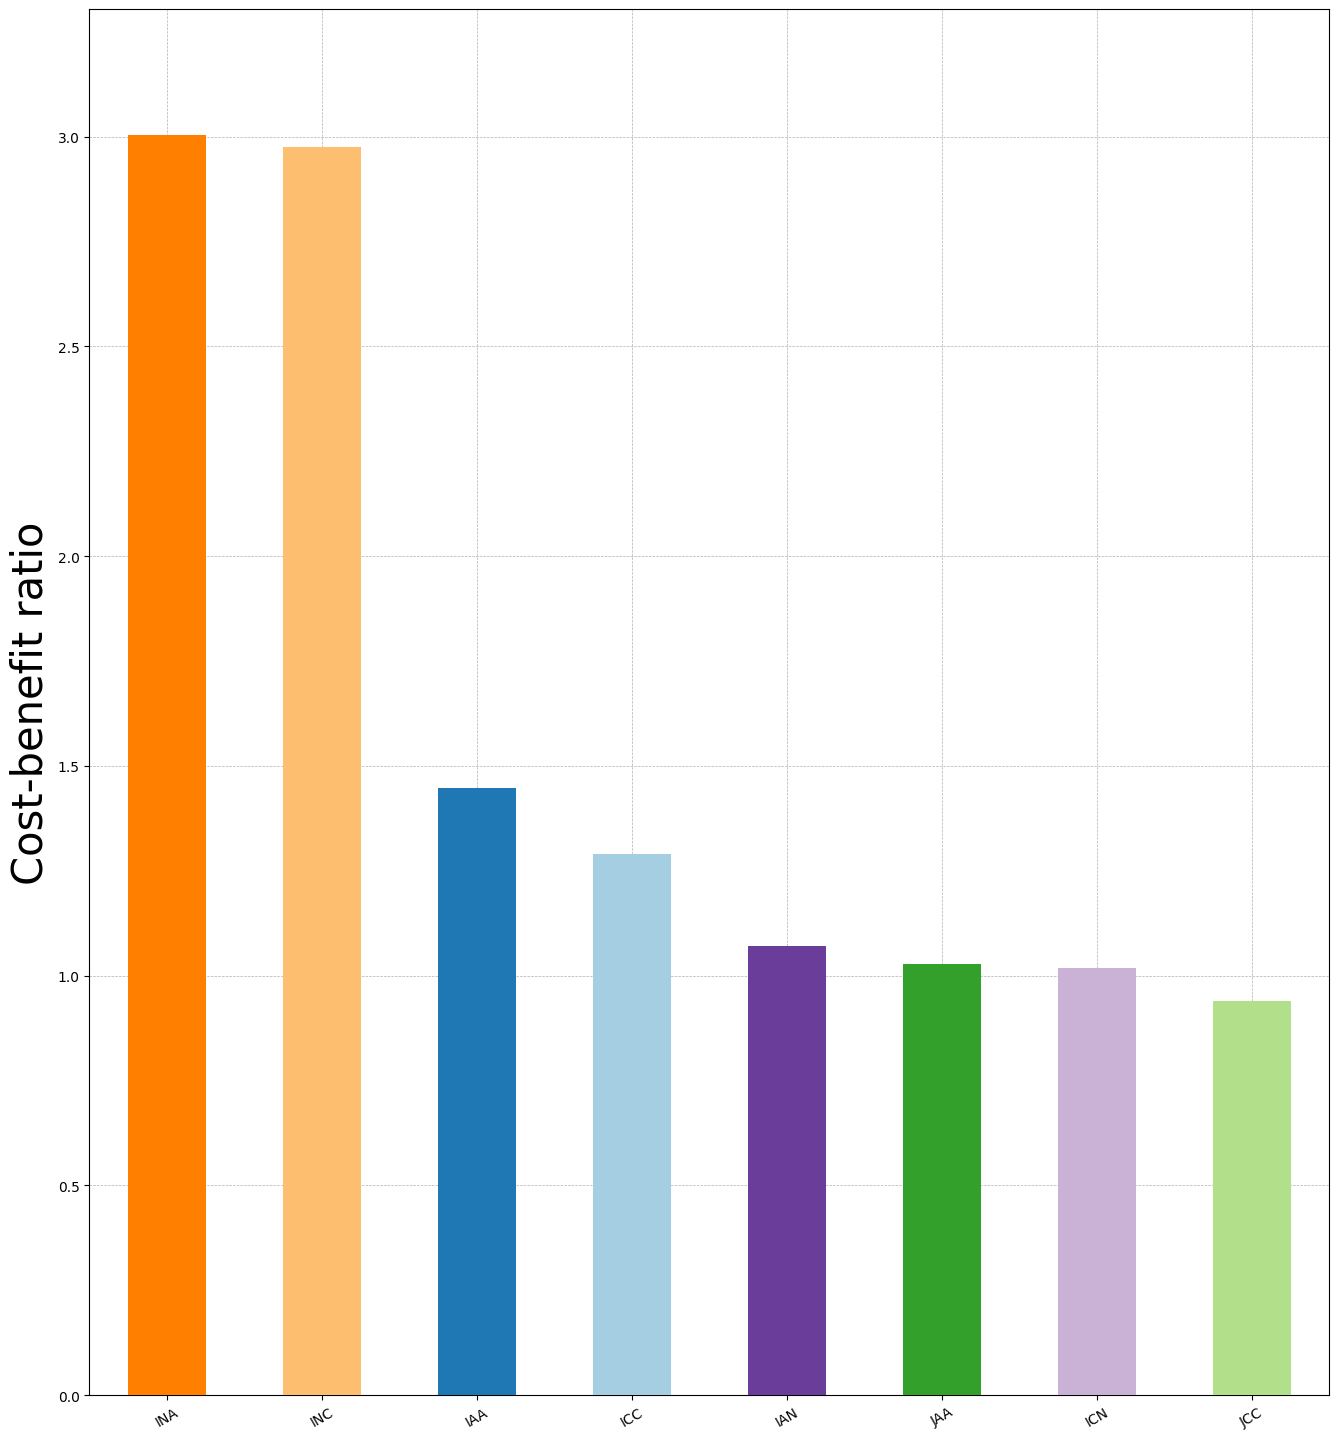

In [352]:
### Plot cost vs benefit

# Dropping rows with infinite cost_benefit_ratio values and updating the DataFrame
df_clean_dropped_inf = df_npv_cost_loss_benefit[df_npv_cost_loss_benefit['cost_benefit_ratio'].notna() & (df_npv_cost_loss_benefit['cost_benefit_ratio'] != float('inf'))]



# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Sort data by cost-benefit ratio
df_sorted = df_clean_dropped_inf.sort_values('cost_benefit_ratio', ascending=False)

# Plot setup
fig, ax = plt.subplots(figsize=(16, 18))
df_sorted['cost_benefit_ratio'].plot(kind='bar', color=[strategy_colors[strategy] for strategy in df_sorted.index], ax=ax, zorder=3)
#ax.set_title('Cost/Benefit Ratio by Strategy', fontsize=14)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Cost-benefit ratio', fontsize=30)
plt.xticks(rotation=30)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Handle infinite values in plot
ax.set_ylim(0, df_sorted['cost_benefit_ratio'].replace(float('inf'), pd.NA).dropna().max() * 1.1)
plt.savefig(r'../../figures/cost-benefit-ratio.png', dpi=400, bbox_inches='tight')

plt.show()

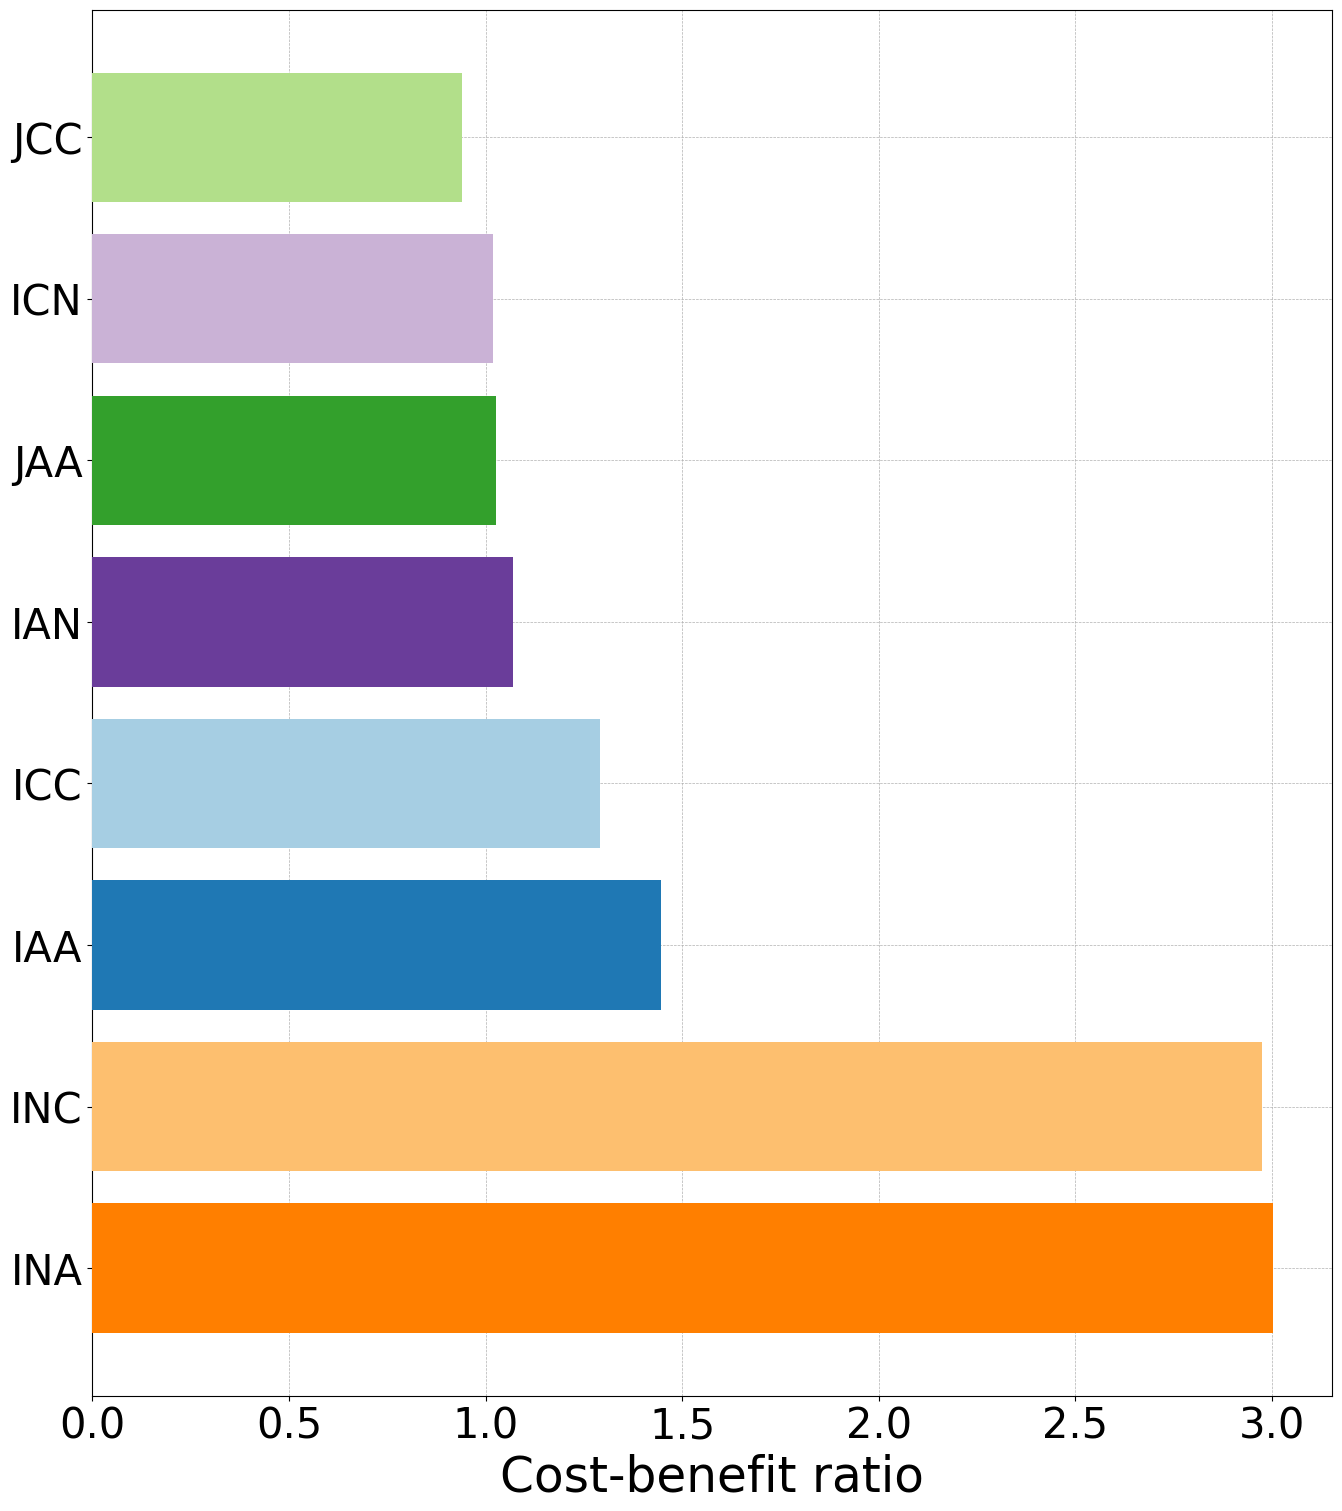

In [353]:
# Switching to a horizontal bar plot to display strategy names on the y-axis
fig, ax = plt.subplots(figsize=(16, 18))
bars = ax.barh(df_sorted.index, df_sorted['cost_benefit_ratio'],
               color=[strategy_colors[strategy] for strategy in df_sorted.index], zorder=3)

#ax.set_title('Cost/Benefit Ratio by Strategy', fontsize=14)
ax.set_xlabel('Cost-benefit ratio', fontsize=35)
ax.set_ylabel('', fontsize=35)
plt.yticks(fontsize=30)  # Larger font for strategy names
plt.xticks(fontsize=30)  # Larger font for ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)  # grid behind bars
#ax.set_xlim(0, max_value_filtered * 1.1)  # Set x-axis limit to slightly above max value for better display
#ax.set_xlim(0, df_sorted['cost_benefit_ratio'].replace(float('inf'), pd.NA).dropna().max() * 1.1)
plt.savefig(r'../../figures/cost-benefit-ratio.png', dpi=400, bbox_inches='tight')

plt.show()


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_73332\3014519003.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(strategy, (df_npv_cost_loss_benefit['total_cost'][i], df_npv_cost_loss_benefit['benefit_loss'][i]),


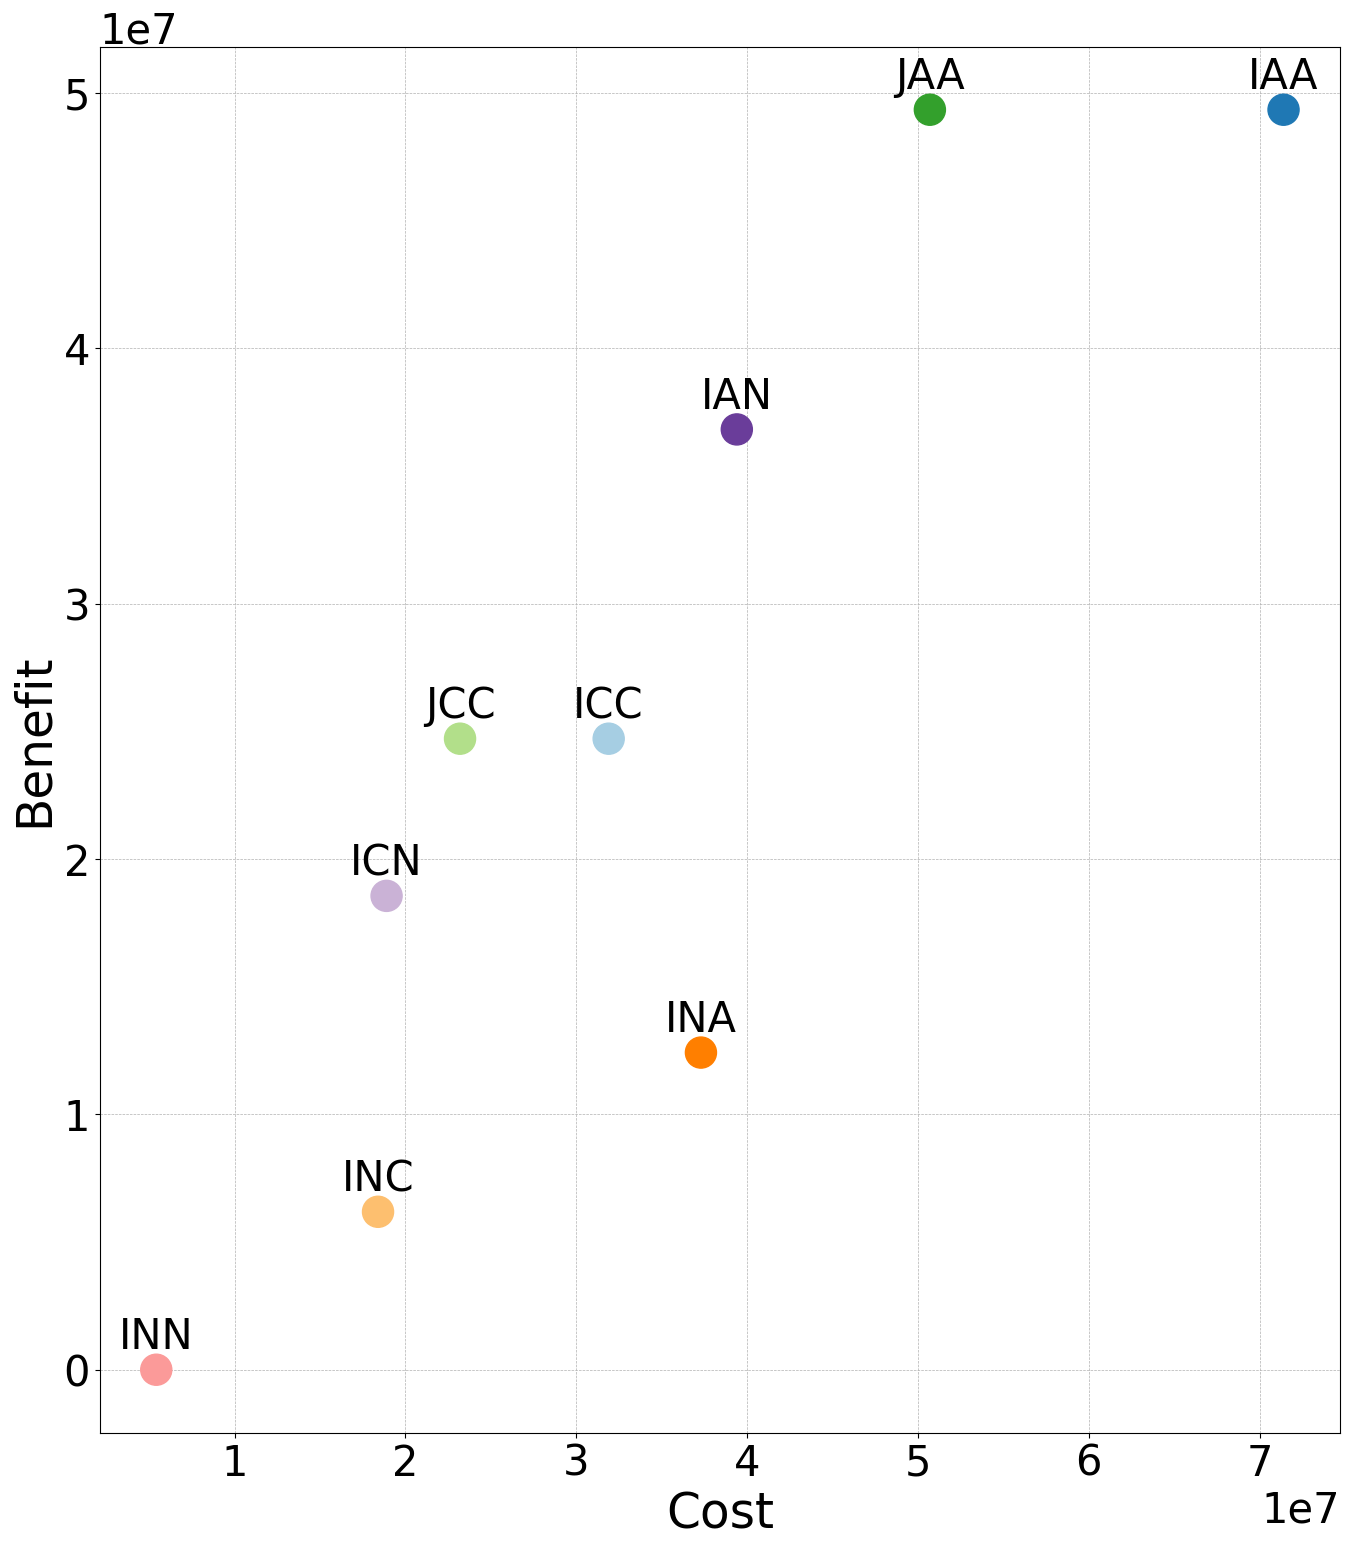

In [354]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 18))
scatter = ax.scatter(df_npv_cost_loss_benefit['total_cost'], df_npv_cost_loss_benefit['benefit_loss'],
                     color=[strategy_colors[strategy] for strategy in df_npv_cost_loss_benefit.index],
                     s=500, marker='o', zorder=3)  # Use circles as markers

# Formatting to match the provided plot style
ax.set_xlabel('Cost', fontsize=35)
ax.set_ylabel('Benefit', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True, linestyle='--', linewidth=0.5)

# Annotate each point with the strategy name
for i, strategy in enumerate(df_npv_cost_loss_benefit.index):
    ax.annotate(strategy, (df_npv_cost_loss_benefit['total_cost'][i], df_npv_cost_loss_benefit['benefit_loss'][i]),
                textcoords="offset points", xytext=(0,15), ha='center', fontsize=30)
ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)

plt.savefig(r'../../figures/cost-vs-benefit.png', dpi=400, bbox_inches='tight')
plt.show()

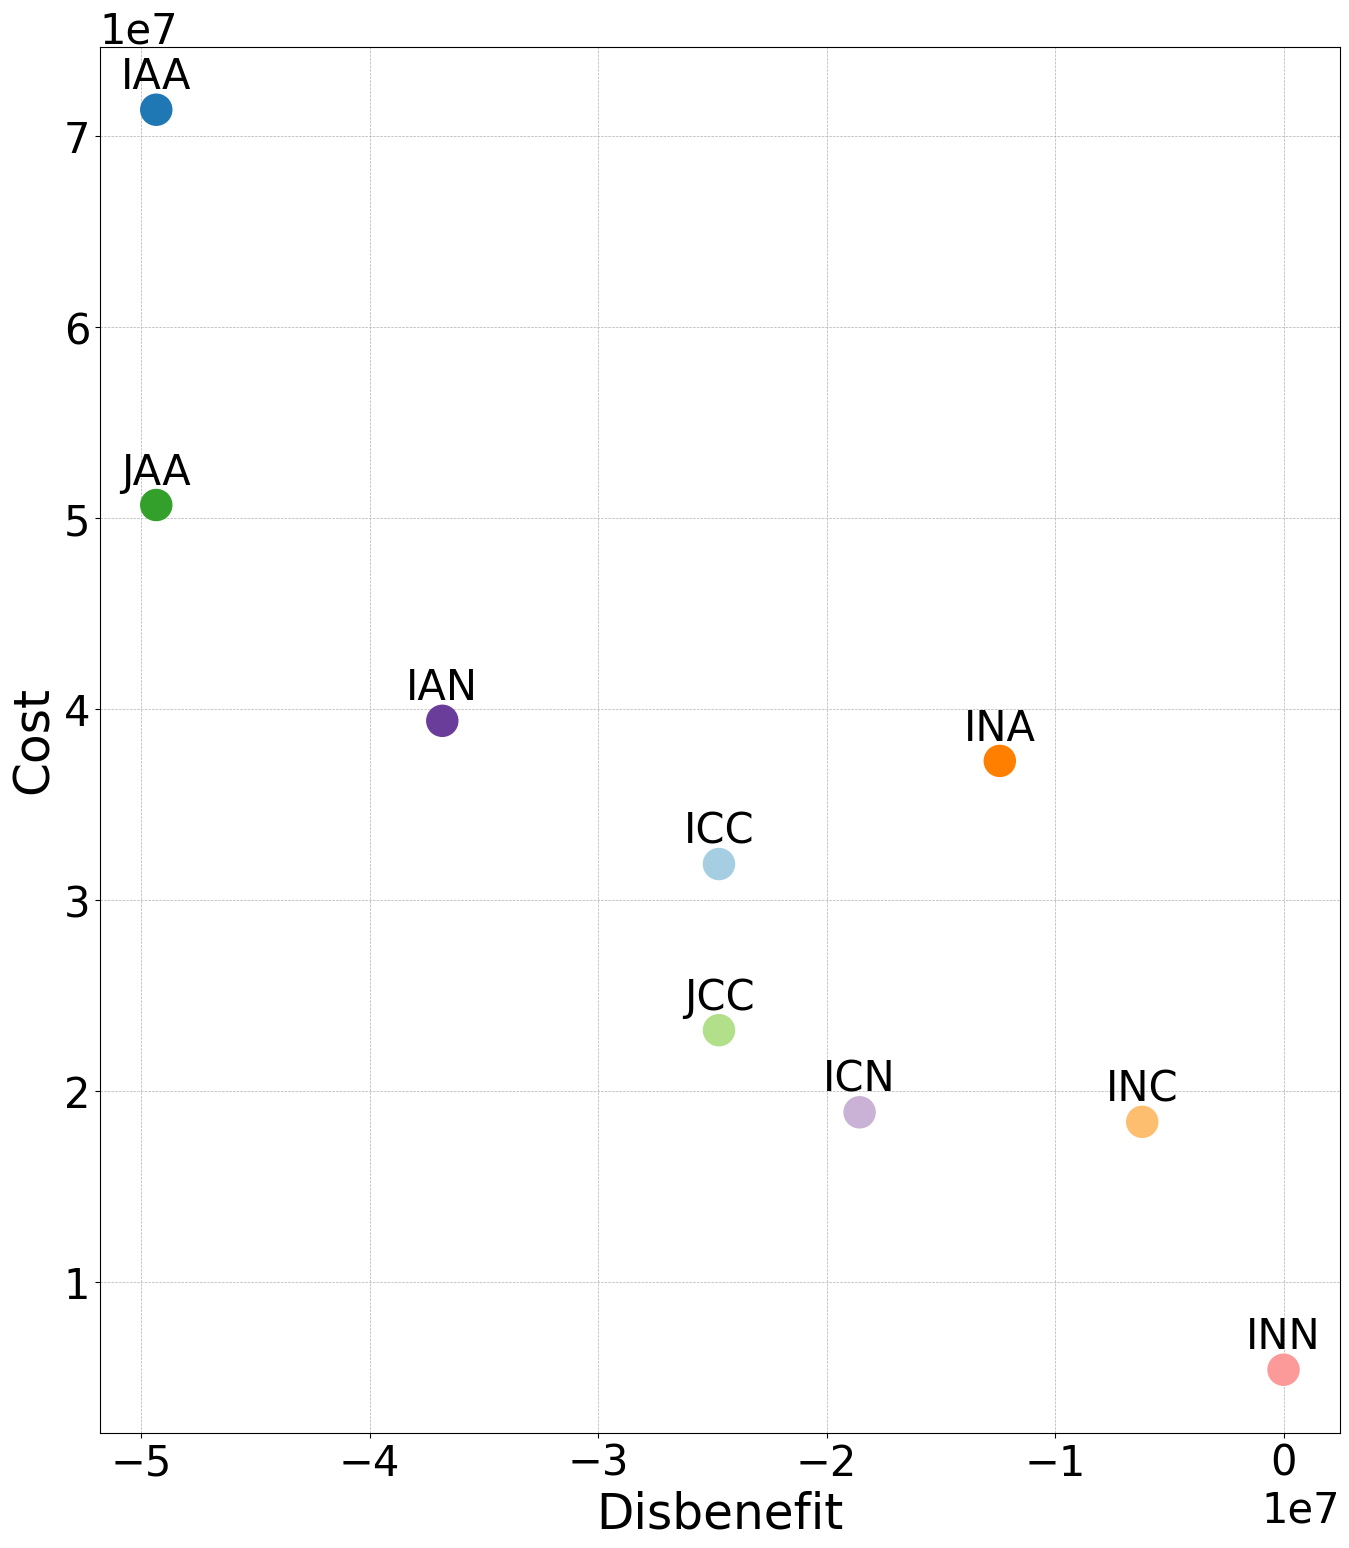

In [355]:
# Correcting the data assignment to create disbenefits from benefits
df_npv_cost_loss_benefit['disbenefit_loss'] = -1 * df_npv_cost_loss_benefit['benefit_loss']

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 18))
scatter = ax.scatter(
    df_npv_cost_loss_benefit['disbenefit_loss'],
    df_npv_cost_loss_benefit['total_cost'],
    color=[strategy_colors[strategy] for strategy in df_npv_cost_loss_benefit.index],
    s=500, marker='o', zorder=3
)

# Proper labeling and formatting
ax.set_xlabel('Disbenefit', fontsize=35)
ax.set_ylabel('Cost', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True, linestyle='--', linewidth=0.5)

# Annotating each point with the strategy name
for i, strategy in enumerate(df_npv_cost_loss_benefit.index):
    ax.annotate(
        strategy,
        (df_npv_cost_loss_benefit['disbenefit_loss'].iloc[i], df_npv_cost_loss_benefit['total_cost'].iloc[i]),
        textcoords="offset points",
        xytext=(0, 15),
        ha='center',
        fontsize=30
    )

# Adjusting text size for axis offset text
ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)

# Save and display the plot
plt.savefig(r'../../figures/cost-vs-disbenefit.png', dpi=400, bbox_inches='tight')
plt.show()